# <CENTER><div class="alert alert-block alert-info"><b> Segmentation des clients d'un site de e-commerce<br> Essais de différentes approches de clustering</b><div><CENTER>   
    

### Problématique:
- Comprendre les différents types d'utilisateurs grâce à leur comportement et à leurs données personnelles.
- Fournir une segmentation des clients utilisable pour une campagne de communication par une entreprise proposant une solution de vente sur les marketplaces en ligne .
 

### Source du jeu de données:
https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce

### Objectifs:
1. Faire une analyse exploratoire
2. Utiliser des méthodes non supervisées pour regrouper des clients de profils similaires (le présent notebook).
3. faire des simulations pour déterminer la fréquence nécessaire des mise à jours du modèle de segmentation (analyse de la stabilité des segments au cours du temps).
    
    
Pour cette deuxième partie, différentes approches de segmentation de clients seront testées:<br>
    - segmentation en utilisant la méthode RFM<br>
    - clustering en utilisant l'algorithme K-Means avec différentes variables<br>
    - clustering en utilisant l'algorithme DBSCAN<br>

### <a name="C0">Sommaire</a>

- <a href="#C1">1. Importation des librairies nécessaires et mise en place du module de vérification du format PEP8</a>
- <a href="#C2">2. Segmentation RFM</a>
    - <a href="#C21">2.1. Préparation</a>
     - <a href="#C211">2.1.1. Préparation du jeu de données</a>
     - <a href="#C212">2.1.2. Définition de fonctions utiles pour la segmentation</a>
    - <a href="#C22">2.2. Première essai en utilisant les quantiles</a>
        - <a href="#C221">2.2.1. Détermination des scores RFM</a>
        - <a href="#C222">2.2.2. Segmentation des clients</a>
        - <a href="#C223">2.2.3. Représentations graphiques</a>
    - <a href="#C23">2.3. Deuxième essai en utilisant les quantiles avec "monetary_value" en échelle logarithmique</a>
        - <a href="#C231">2.3.1. Détermination des scores RFM</a>
        - <a href="#C232">2.3.2. Segmentation des clients</a>
        - <a href="#C233">2.3.3. Représentations graphiques</a>
    - <a href="#C24">2.4. Troisième essai en utilisant un "ranking" des clients</a>
        - <a href="#C241">2.4.1. Classement des clients</a>
        - <a href="#C242">2.4.2. Détermination des scores RFM</a>
        - <a href="#C243">2.4.3. Segmentation des clients</a>
    - <a href="#C25">2.5. Quatrième essai en utilisant la méthode des quintiles </a>
        - <a href="#C251">2.5.1. Détermination des scores RFM</a>
        - <a href="#C252">2.5.2. Segmentation des clients</a>
        - <a href="#C253">2.5.3. Représentations graphiques</a>
    - <a href="#C26">2.6. Cinquième essai en utilisant l'algorithme du K-Means pour déterminer les scores RFM</a>
        - <a href="#C261">2.6.1. Détermination du score RFM par le K-Means de manière indépendante pour chaque variable</a>
        - <a href="#C262">2.6.2. Segmentation des clients</a>
        - <a href="#C263">2.6.3. Représentations graphiques</a>
    - <a href="#C27">2.7. Sixième essai en utilisant l'algorithme du K-Means pour déterminer les scores RFM avec les variables en échelle logarithmique</a>
        - <a href="#C271">2.7.1. Détermination du score RFM par le K-Means de manière indépendante pour chaque variable</a>
        - <a href="#C272">2.7.2. Segmentation des clients</a>
        - <a href="#C273">2.7.3. Représentations graphiques</a>
- <a href="#C3">3. Segmentation des clients en utilisant le k-means</a>
    - <a href="#C31">3.1. Utilisation du K-means de manière globale (sur les 3 variables RFM en même temps)</a>
        - <a href="#C311">3.1.1. Détermination de la valeur de k optimale</a>
        - <a href="#C312">3.1.2. Détermination du coefficient de silhouette et du score de Davies Bouldin avec le module 'metrics' de scikit-learn</a>
        - <a href="#C313">3.1.3. Coefficient de silhouette et distances interclusters</a>
        - <a href="#C314">3.1.4. Représentation graphique des différents clusters</a>
    - <a href="#C32">3.2. Utilisation du K-means de manière globale (sur les 3 variables RFM en même temps en échelle logarithmique)</a>
        - <a href="#C321">3.2.1. Détermination de la valeur de k optimale</a>
        - <a href="#C322">3.2.2. Détermination du coefficient de silhouette avec le module 'metrics' de scikit-learn</a>
        - <a href="#C323">3.2.3. Coefficient de silhouette et distances interclusters</a>
        - <a href="#C324">3.2.4. Représentation graphique des différents clusters</a>
    - <a href="#C33">3.3. Avec les variables de la RFM et mean_review_score</a>
        - <a href="#C331">3.3.1. Préparation du jeu de données</a>
        - <a href="#C332">3.3.2. Détermination de la valeur de k optimale</a>
        - <a href="#C333">3.3.3. Détermination du coéfficient de silhouette avec le module 'metrics' de Scikit-learn</a>
        - <a href="#C334">3.3.4. Coefficient de silhouette et distances interclusters</a>
        - <a href="#C335">3.3.5. Représentation graphique des clusters</a>
    - <a href="#C34">3.4. Avec les variables de la RFM et autres variables</a>
        - <a href="#C341">3.4.1. Préparation du jeu de données</a>
        - <a href="#C342">3.4.2. Détermination de la valeur de k optimale</a>
        - <a href="#C343">3.4.3. Détermination du coefficient de silhouette avec le module 'metrics' de Scikit-learn</a>
        - <a href="#C344">3.4.4. Coefficient de silhouette et distances interclusters</a>
        - <a href="#C345">3.4.5. Rerpésentation graphique des différents clusters</a>
    - <a href="#C35">3.5. Avec les variables de la RFM et autres variables (Valeurs monétaires en échelle logarithmique)</a>
        - <a href="#C351">3.5.1. Préparation du jeu de données</a>
        - <a href="#C352">3.5.2. Détermination de la valeur de k optimale</a>
        - <a href="#C353">3.5.3. Détermination du coefficient de silhouette avec le module 'metrics' de Scikit-learn</a>
        - <a href="#C354">3.5.4. Coefficient de silhouette et distances interclusters</a>
        - <a href="#C355">3.5.5. Rerpésentation graphique des différents clusters</a>
    - <a href="#C36">3.6. Avec les variables de la RFM et autres variables après réduction dimensionnelle</a>
        - <a href="#C361">3.6.1. Préparation du jeu de données</a>
        - <a href="#C362">3.6.2. Détermination de la valeur de k optimale</a>
        - <a href="#C363">3.6.3. Détermination du coefficient de silhouette avec le module 'metrics' de Scikit-learn</a>
        - <a href="#C364">3.6.4. Coefficient de silhouette et distances interclusters</a>
        - <a href="#C365">3.6.5. Rerpésentation graphique des différents clusters</a>
    - <a href="#C37">3.7. Description du meilleur clustering en utilisant l'algorithme K-Means</a>
        - <a href="#C371">3.7.1. Préparation du jeu de données</a>
        - <a href="#C372">3.7.2. Clustering avec k = 4</a>
        - <a href="#C373">3.7.3. Représentations graphiques des variables en fonction des clusters</a>
        - <a href="#C374">3.7.4. Stabilité de l'initialisation</a>
    - <a href="#C4">4. Segmentation des clients en utilisant le DBSCAN</a>
        - <a href="#C41">4.1. Echantillonage du jeu de données</a>
        - <a href="#C42">4.2. DBSCAN avec les variables RFM</a>
        - <a href="#C43">4.3. DBSCAN avec toutes les variables</a>

# <div class="alert alert-block alert-info"><a name="C1">1. Importation des librairies nécessaires et mise en place du module de vérification du format PEP8</a></div>

Pour tester différentes approches de clustering, nous aurons besoin des librairies : Pandas, Matplotlib, Seaborn, numpy, scikit-learn et yellowbrick.

In [1]:
# Mise en place du module de vérification du format PEP8
%load_ext pycodestyle_magic
%pycodestyle_on

In [2]:
# Importation des librairies nécessaires
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import squarify
import time

# Importation des librairies de Scikit-learn nécessaire
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import (homogeneity_score,
                             completeness_score,
                             v_measure_score,
                             adjusted_rand_score,
                             adjusted_mutual_info_score,
                             davies_bouldin_score,
                             silhouette_score)
from sklearn.neighbors import NearestNeighbors

# Importation des librairies de yellowbrick nécessaire
from yellowbrick.cluster import (KElbowVisualizer,
                                 SilhouetteVisualizer,
                                 InterclusterDistance)

In [3]:
# Propriétés communes des figures 
sns.set_theme(style="ticks", context="notebook")
plt.rcParams['figure.dpi'] = 100
plt.rc('font', size=12)          # taille de la police de l'échelle des axes
plt.rc('axes', titlesize=18)     # taille de la police du titre
plt.rc('axes', labelsize=16)     # taille de la police du titre des axes
plt.rc('xtick', labelsize=12)    # taille de la police de l'échelle de l'axe x
plt.rc('ytick', labelsize=12)    # taille de la police de l'échelle de l'axe y
plt.rc('legend', fontsize=12)    # taille de la légende
plt.rc('figure', titlesize=18)   # taille du titre

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


# <div class="alert alert-block alert-info"><a name="C2">2. Segmentation RFM</a></div>

La segmentation de client peut être effectué avec la méthode RFM. Celle-ci a été introduite par Bult et Wansbeek en 1995 et analyse le comportement des clients en utilisant 3 paramètres:
- la récence (recency, R) qui correspond au nombre de jours depuis la dernière commande,
- la fréquence (frequency, F) qui correspond au nombre de commandes effectuées sur une période de temps donnée,
- les dépenses (monetary, M) qui correspond au montant des commandes.

A partir de ces paramètres, je vais tester plusieurs méthodes pour déterminer les différentes typologies de clients.


## <div class="alert alert-block alert-info"><a name="C21">2.1. Préparation</a></div>

### <div class="alert alert-block alert-info"><a name="C211">2.1.1. Préparation du jeu de données</a></div>

In [4]:
data = pd.read_csv("data_per_customer.csv")
data.head()

Unnamed: 0                customer_unique_id  number_of_order  \
0           0  0000366f3b9a7992bf8c76cfdf3221e2                1   
1           1  0000b849f77a49e4a4ce2b2a4ca5be3f                1   
2           2  0000f46a3911fa3c0805444483337064                1   
3           3  0000f6ccb0745a6a4b88665a16c9f078                1   
4           4  0004aac84e0df4da2b147fca70cf8255                1   

  customer_city customer_state   latitude  longitude  \
0       cajamar             SP -23.334163 -46.830014   
1        osasco             SP -23.557876 -46.788754   
2      sao jose             SC -27.543787 -48.631973   
3         belem             PA  -1.307764 -48.482884   
4      sorocaba             SP -23.506140 -47.470475   

   number_of_days_since_last_order  mean_delivery_delay  number_of_items  ...  \
0                              116                 10.0                1  ...   
1                              119                  7.0                1  ...   
2                              542                 27.0                1  ...   
3                              326                 31.0                1  ...   
4                              293                 20.0                1  ...   

   mean_payment_log  mean_freight_ratio  number_of_payment_sequantial  \
0          4.962145            8.456660                           1.0   
1          3.338967           30.489150                           1.0   
2          4.468434           19.972164                           1.0   
3          3.798182           40.417240                           1.0   
4          5.287711            8.578394                           1.0   

   mean_payment_installments  payment_type  number_of_payment_type  \
0                        8.0   credit_card                       1   
1                        1.0   credit_card                       1   
2                        8.0   credit_card                       1   
3                        4.0   credit_card                       1   
4                        6.0   credit_card                       1   

   most_frequent_product_category  number_of_category  number_of_review  \
0                  bed_bath_table                 1.0               1.0   
1                   health_beauty                 1.0               1.0   
2                      stationery                 1.0               1.0   
3                       telephony                 1.0               1.0   
4                       telephony                 1.0               1.0   

   mean_review_score  
0                5.0  
1                4.0  
2                3.0  
3                4.0  
4                5.0  

[5 rows x 28 columns]

In [5]:
# En échelle normal
data_RFM = data[["customer_unique_id",
                 "number_of_order",
                 "number_of_days_since_last_order",
                 "price"]]
data_RFM.columns = ["customer",
                    "frequency",
                    "recency",
                    "monetary"]

In [6]:
# Avec Monetary en échelle logarithmique
data_RFM_log = data[["customer_unique_id",
                     "number_of_order",
                     "number_of_days_since_last_order",
                     "price_log"]]
data_RFM_log.columns = ["customer",
                        "frequency",
                        "recency",
                        "monetary"]

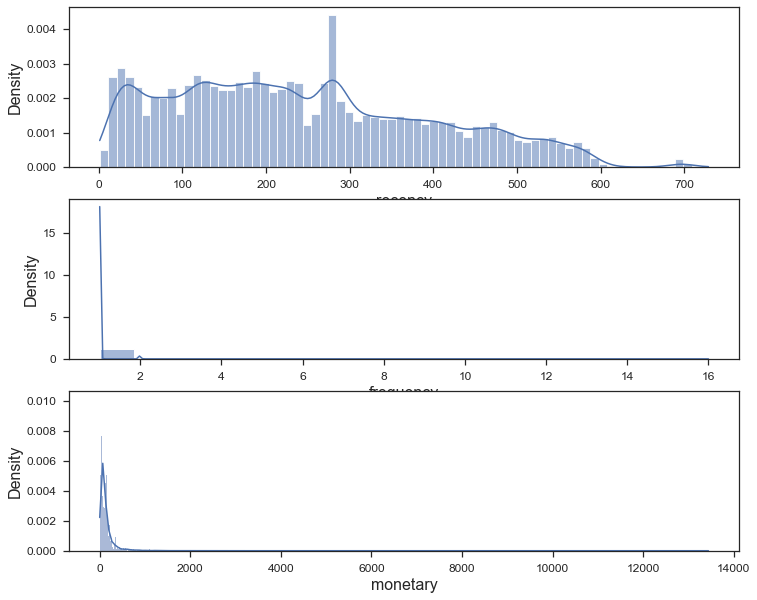

In [7]:
# Représentation graphique des distributions RFM
plt.figure(figsize=(12, 10))

# Pour la récence
ax1 = plt.subplot(3, 1, 1)
ax1 = sns.histplot(data_RFM['recency'], kde=True, stat="density")
# Pour la fréquency
ax2 = plt.subplot(3, 1, 2)
ax2 = sns.histplot(data_RFM['frequency'], kde=True, stat="density")
# Pour la valeur monétaire
ax3 = plt.subplot(3, 1, 3)
ax3 = sns.histplot(data_RFM['monetary'], kde=True, stat="density")
plt.show()

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

### <div class="alert alert-block alert-info"><a name="C212">2.1.2. Définition de fonctions utiles pour la segmentation</a></div>

**Définition d'une fonction attribuant une typologie à chaque client en fonction de son score RFM global (avec un maximum à 12)**

In [8]:
# Définition d'une fonction attribuant une typologie à chaque client
def RFM_segmentation12(df):
    if df["RFM_global"] >= 9:
        return "Can't loose them"
    elif ((df["RFM_global"] >= 8) and (df["RFM_global"] < 9)):
        return "Champions"
    elif ((df["RFM_global"] >= 7) and (df["RFM_global"] < 8)):
        return 'Loyal/Commited'
    elif ((df["RFM_global"] >= 6) and (df["RFM_global"] < 7)):
        return "Promising"
    elif ((df["RFM_global"] >= 5) and (df["RFM_global"] < 6)):
        return "Potential"
    elif ((df["RFM_global"] >= 4) and (df["RFM_global"] < 5)):
        return "Requires attention"
    else:
        return "Demands activation"

**Définition d'une fonction attribuant une typologie à chaque client en fonction de son score RFM global (avec un maximum à 15)**

In [9]:
# Définition d'une fonction attribuant une typologie à chaque client
def RFM_segmentation15(df):
    if df["RFM_global"] >= 13:
        return "Can't loose them"
    elif ((df["RFM_global"] >= 9) and (df["RFM_global"] < 13)):
        return "Champions"
    elif ((df["RFM_global"] >= 7) and (df["RFM_global"] < 9)):
        return 'Loyal/Commited'
    elif ((df["RFM_global"] >= 6) and (df["RFM_global"] < 7)):
        return "Promising"
    elif ((df["RFM_global"] >= 5) and (df["RFM_global"] < 6)):
        return "Potential"
    elif ((df["RFM_global"] >= 4) and (df["RFM_global"] < 5)):
        return "Requires attention"
    else:
        return "Demands activation"

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

## <div class="alert alert-block alert-info"><a name="C22">2.2. Première essai en utilisant les quantiles</a></div>

### <div class="alert alert-block alert-info"><a name="C221">2.2.1. Détermination des scores RFM</a></div>

In [10]:
RFM_segment1 = data_RFM.copy()
RFM_segment1.head()

customer  frequency  recency  monetary
0  0000366f3b9a7992bf8c76cfdf3221e2          1      116    129.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f          1      119     18.90
2  0000f46a3911fa3c0805444483337064          1      542     69.00
3  0000f6ccb0745a6a4b88665a16c9f078          1      326     25.99
4  0004aac84e0df4da2b147fca70cf8255          1      293    180.00

In [11]:
quantiles = data_RFM.quantile(q=[0.25, 0.5, 0.75])
quantiles

frequency  recency  monetary
0.25        1.0    119.0      47.9
0.50        1.0    224.0      89.9
0.75        1.0    353.0     155.0

In [12]:
quantiles = quantiles.to_dict()

In [13]:
# Fonction déterminant les classes pour "recency"
# Arguments (x = value, p = recency)
def R_Class(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1


# Fonction déterminant les classes pour "frequency" et "monetary"
def FM_Class(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4


RFM_segment1['R_quartile'] = RFM_segment1['recency'].apply(R_Class,
                                                           args=('recency', quantiles))
RFM_segment1['F_quartile'] = RFM_segment1['frequency'].apply(FM_Class,
                                                             args=('frequency', quantiles))
RFM_segment1['M_quartile'] = RFM_segment1['monetary'].apply(FM_Class,
                                                            args=('monetary', quantiles))

# Concatenetation pour avoir les différents segments
RFM_segment1['RFM_score'] = (RFM_segment1.R_quartile.map(str)
                             + RFM_segment1.F_quartile.map(str)
                             + RFM_segment1.M_quartile.map(str))

In [14]:
RFM_segment1.head()

customer  frequency  recency  monetary  R_quartile  \
0  0000366f3b9a7992bf8c76cfdf3221e2          1      116    129.90           4   
1  0000b849f77a49e4a4ce2b2a4ca5be3f          1      119     18.90           4   
2  0000f46a3911fa3c0805444483337064          1      542     69.00           1   
3  0000f6ccb0745a6a4b88665a16c9f078          1      326     25.99           2   
4  0004aac84e0df4da2b147fca70cf8255          1      293    180.00           2   

   F_quartile  M_quartile RFM_score  
0           1           3       413  
1           1           1       411  
2           1           2       112  
3           1           1       211  
4           1           4       214

In [15]:
# Déterminer le nombre de scores uniques possibles
rfm_segment_unique = RFM_segment1.groupby('RFM_score')['RFM_score'].nunique()
print("Nombre de score RFM possible:",
      rfm_segment_unique.sum())

Nombre de score RFM possible: 32


In [16]:
# Déterminer le score RFM global pour chaque client
RFM_segment1['RFM_global'] = RFM_segment1[['R_quartile',
                                           'F_quartile',
                                           'M_quartile']].sum(axis=1)
print("Score RFM gobal possible:",
      RFM_segment1['RFM_global'].unique())

Score RFM gobal possible: [ 8  6  4  7  5  3  9 10 11 12]


<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

### <div class="alert alert-block alert-info"><a name="C222">2.2.2. Segmentation des clients</a></div>

Les clients vont être répartis en différentes typologies:
- "Can't lose them": score RFM supérieur à 9
- "Champions": score RFM compris entre 8 et 9
- "Loyal/Committed": score RFM compris entre 7 et 8
- "Promising": score RFM compris entre 6 et 7
- "Potential": score RFM compris entre 5 et 6
- "Requires attention": score RFM compris entre 4 et 5
- "Demands activation": score RFM inférieur à 4

In [17]:
# Création d'une nouvelle variable contenant la typologie
RFM_segment1['RFM_segment'] = RFM_segment1.apply(RFM_segmentation12, axis=1)
RFM_segment1.head()

customer  frequency  recency  monetary  R_quartile  \
0  0000366f3b9a7992bf8c76cfdf3221e2          1      116    129.90           4   
1  0000b849f77a49e4a4ce2b2a4ca5be3f          1      119     18.90           4   
2  0000f46a3911fa3c0805444483337064          1      542     69.00           1   
3  0000f6ccb0745a6a4b88665a16c9f078          1      326     25.99           2   
4  0004aac84e0df4da2b147fca70cf8255          1      293    180.00           2   

   F_quartile  M_quartile RFM_score  RFM_global         RFM_segment  
0           1           3       413           8           Champions  
1           1           1       411           6           Promising  
2           1           2       112           4  Requires attention  
3           1           1       211           4  Requires attention  
4           1           4       214           7      Loyal/Commited

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

### <div class="alert alert-block alert-info"><a name="C223">2.2.3. Représentations graphiques</a></div>

**Quels sont les effectifs de chaque segment?**

In [18]:
# Création d'un jeu de données groupé sur les segments RFM
df_segment = RFM_segment1.groupby("RFM_segment").agg({"customer": "count",
                                                      "frequency": "mean",
                                                      "recency": "mean",
                                                      "monetary": "mean"})\
                                                .reset_index()

df_segment.columns = ["RFM_segment",
                      "Count",
                      "Frequency",
                      "Recency",
                      "Monetary_value"]

nb_customer = df_segment["Count"].sum()

df_segment.insert(2,
                  "Customer_proportion",
                  ((df_segment["Count"] * 100) / nb_customer))

# Mettre les segments dans l'ordre
df2 = df_segment.loc[pd.Series(
                     pd.Categorical(df_segment["RFM_segment"],
                                    categories=["Can't loose them",
                                                "Champions",
                                                "Loyal/Commited",
                                                "Promising",
                                                "Potential",
                                                "Requires attention",
                                                "Demands activation"],
                                    ordered=True))
                     .sort_values()
                     .index]

# Appliquer un code couleur du bleu au rouge
df2.style.background_gradient(cmap="coolwarm")

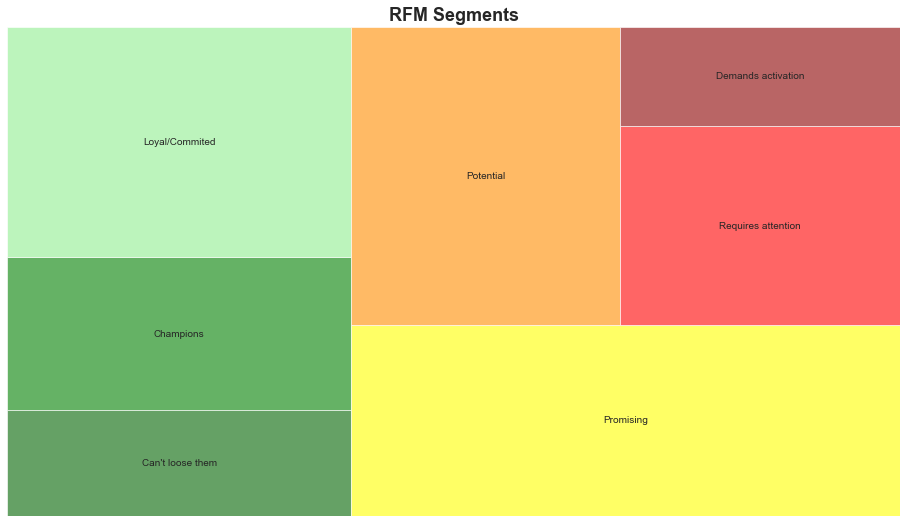

In [19]:
# Création d'un graphique représentant les différents segment.
fig = plt.gcf()
ax = fig.add_subplot()
colors = ["darkgreen",
          "green",
          "lightgreen",
          "yellow",
          "darkorange",
          "red",
          "darkred"]
fig.set_size_inches(16, 9)
squarify.plot(sizes=df2["Count"],
              label=["Can't loose them",
                     "Champions",
                     "Loyal/Commited",
                     "Promising",
                     "Potential",
                     "Requires attention",
                     "Demands activation"],
              color=colors,
              alpha=.6)
plt.title("RFM Segments", fontsize=18, fontweight="bold")
plt.axis('off')
plt.show()

**Distribution des variables en fonction des segments**

In [20]:
variables = ["frequency", "recency", "monetary"]

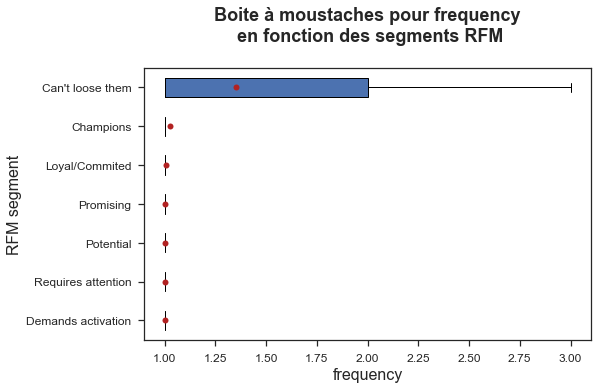

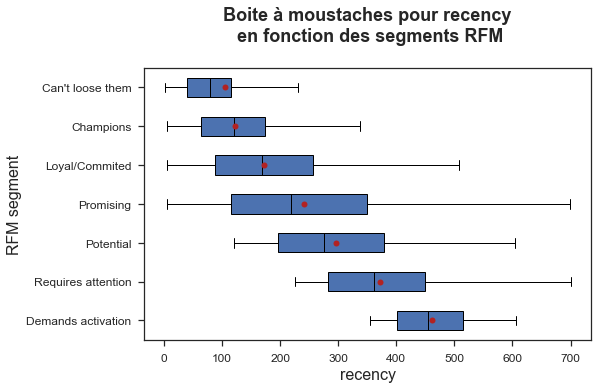

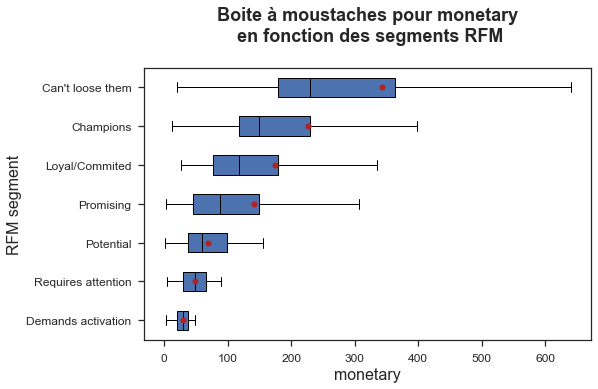

In [21]:
for i, variable in enumerate(variables):
    fig = plt.figure(figsize=(8, 5))

    # Pour faire les boites à moustaches en fonction des segments RFM
    modalites = ["Demands activation",
                 "Requires attention",
                 "Potential",
                 "Promising",
                 "Loyal/Commited",
                 "Champions",
                 "Can't loose them"]

    groupes = []
    for m in modalites:
        groupes.append(RFM_segment1[RFM_segment1["RFM_segment"] == m]
                       [variable])

    ax2 = fig.add_subplot(1, 1, 1)
    ax2.set_title("Boite à moustaches pour {variable}""\n"
                  " en fonction des segments RFM""\n"
                  .format(variable=variable),
                  fontweight='bold')
    ax2.set(xlabel="{variable}".format(variable=variable),
            ylabel="RFM segment")

    # Propriétés graphiques
    medianprops = {'color':"black"}
    meanprops = {'marker':'o',
                 'markeredgecolor':'black',
                 'markerfacecolor':'firebrick'}
    plt.boxplot(groupes,
                labels=modalites,
                showfliers=False,
                medianprops=medianprops,
                vert=False,
                patch_artist=True,
                showmeans=True,
                meanprops=meanprops)

Cette segmentation n'est pas convaincante car beaucoup de clients sont dans les deux premières catégories alors qu'on peut s'attendre à avoir moins de clients dans ces catégories du au fait que seulement 3% des clients ont effectué plusieurs commandes. Est-ce que l'utilisation de la variable price en échelle logarithmique améliore cette segmentation?

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

## <div class="alert alert-block alert-info"><a name="C23">2.3. Deuxième essai en utilisant les quantiles avec "monetary_value" en échelle logarithmique</a></div>

### <div class="alert alert-block alert-info"><a name="C231">2.3.1. Détermination des scores RFM</a></div>

In [22]:
RFM_segment1 = data_RFM_log.copy()
RFM_segment1.head()

customer  frequency  recency  monetary
0  0000366f3b9a7992bf8c76cfdf3221e2          1      116  4.874434
1  0000b849f77a49e4a4ce2b2a4ca5be3f          1      119  2.990720
2  0000f46a3911fa3c0805444483337064          1      542  4.248495
3  0000f6ccb0745a6a4b88665a16c9f078          1      326  3.295466
4  0004aac84e0df4da2b147fca70cf8255          1      293  5.198497

In [23]:
quantiles = data_RFM.quantile(q=[0.25, 0.5, 0.75])
quantiles

frequency  recency  monetary
0.25        1.0    119.0      47.9
0.50        1.0    224.0      89.9
0.75        1.0    353.0     155.0

In [24]:
quantiles = quantiles.to_dict()

In [25]:
# Fonction déterminant les classes pour "recency"
# Arguments (x = value, p = recency)
def R_Class(x, p, d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]:
        return 2
    else:
        return 1


# Fonction déterminant les classes pour "frequency" et "monetary"
def FM_Class(x, p, d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]:
        return 3
    else:
        return 4


RFM_segment1['R_quartile'] = RFM_segment1['recency'].apply(R_Class,
                                                           args=('recency', quantiles))
RFM_segment1['F_quartile'] = RFM_segment1['frequency'].apply(FM_Class,
                                                             args=('frequency', quantiles))
RFM_segment1['M_quartile'] = RFM_segment1['monetary'].apply(FM_Class,
                                                            args=('monetary', quantiles))

# Concatenetation pour avoir les différents segments
RFM_segment1['RFM_score'] = (RFM_segment1.R_quartile.map(str)
                             + RFM_segment1.F_quartile.map(str)
                             + RFM_segment1.M_quartile.map(str))

In [26]:
RFM_segment1.head()

customer  frequency  recency  monetary  R_quartile  \
0  0000366f3b9a7992bf8c76cfdf3221e2          1      116  4.874434           4   
1  0000b849f77a49e4a4ce2b2a4ca5be3f          1      119  2.990720           4   
2  0000f46a3911fa3c0805444483337064          1      542  4.248495           1   
3  0000f6ccb0745a6a4b88665a16c9f078          1      326  3.295466           2   
4  0004aac84e0df4da2b147fca70cf8255          1      293  5.198497           2   

   F_quartile  M_quartile RFM_score  
0           1           1       411  
1           1           1       411  
2           1           1       111  
3           1           1       211  
4           1           1       211

In [27]:
# Déterminer le nombre de scores uniques possibles
rfm_segment_unique = RFM_segment1.groupby('RFM_score')['RFM_score'].nunique()
print("Nombre de score RFM possible:",
      rfm_segment_unique.sum())

Nombre de score RFM possible: 9


In [28]:
# Déterminer le score RFM global pour chaque client
RFM_segment1['RFM_global'] = RFM_segment1[['R_quartile',
                                           'F_quartile',
                                           'M_quartile']].sum(axis=1)
print("Score RFM gobal possible:",
      RFM_segment1['RFM_global'].unique())

Score RFM gobal possible: [ 6  3  4  5  7  9  8 10]


<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

### <div class="alert alert-block alert-info"><a name="C232">2.3.2. Segmentation des clients</a></div>

Les clients vont être répartis en différentes typologies:
- "Can't lose them": score RFM supérieur à 9
- "Champions": score RFM compris entre 8 et 9
- "Loyal/Committed": score RFM compris entre 7 et 8
- "Promising": score RFM compris entre 6 et 7
- "Potential": score RFM compris entre 5 et 6
- "Requires attention": score RFM compris entre 4 et 5
- "Demands activation": score RFM inférieur à 4

In [29]:
# Création d'une nouvelle variable contenant la typologie
RFM_segment1['RFM_segment'] = RFM_segment1.apply(RFM_segmentation12, axis=1)
RFM_segment1.head()

customer  frequency  recency  monetary  R_quartile  \
0  0000366f3b9a7992bf8c76cfdf3221e2          1      116  4.874434           4   
1  0000b849f77a49e4a4ce2b2a4ca5be3f          1      119  2.990720           4   
2  0000f46a3911fa3c0805444483337064          1      542  4.248495           1   
3  0000f6ccb0745a6a4b88665a16c9f078          1      326  3.295466           2   
4  0004aac84e0df4da2b147fca70cf8255          1      293  5.198497           2   

   F_quartile  M_quartile RFM_score  RFM_global         RFM_segment  
0           1           1       411           6           Promising  
1           1           1       411           6           Promising  
2           1           1       111           3  Demands activation  
3           1           1       211           4  Requires attention  
4           1           1       211           4  Requires attention

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

### <div class="alert alert-block alert-info"><a name="C233">2.3.3. Représentations graphiques</a></div>

**Quels sont les effectifs de chaque segment?**

In [30]:
# Création d'un jeu de données groupé sur les segments RFM
df_segment = RFM_segment1.groupby("RFM_segment").agg({"customer": "count",
                                                      "frequency": "mean",
                                                      "recency": "mean",
                                                      "monetary": "mean"})\
                                                .reset_index()

df_segment.columns = ["RFM_segment",
                      "Count",
                      "Frequency",
                      "Recency",
                      "Monetary_value"]

nb_customer = df_segment["Count"].sum()

df_segment.insert(2,
                  "Customer_proportion",
                  ((df_segment["Count"] * 100) / nb_customer))

# Mettre les segments dans l'ordre
df2 = df_segment.loc[pd.Series(
                     pd.Categorical(df_segment["RFM_segment"],
                                    categories=["Can't loose them",
                                                "Champions",
                                                "Loyal/Commited",
                                                "Promising",
                                                "Potential",
                                                "Requires attention",
                                                "Demands activation"],
                                    ordered=True))
                     .sort_values()
                     .index]

# Appliquer un code couleur du bleu au rouge
df2.style.background_gradient(cmap="coolwarm")

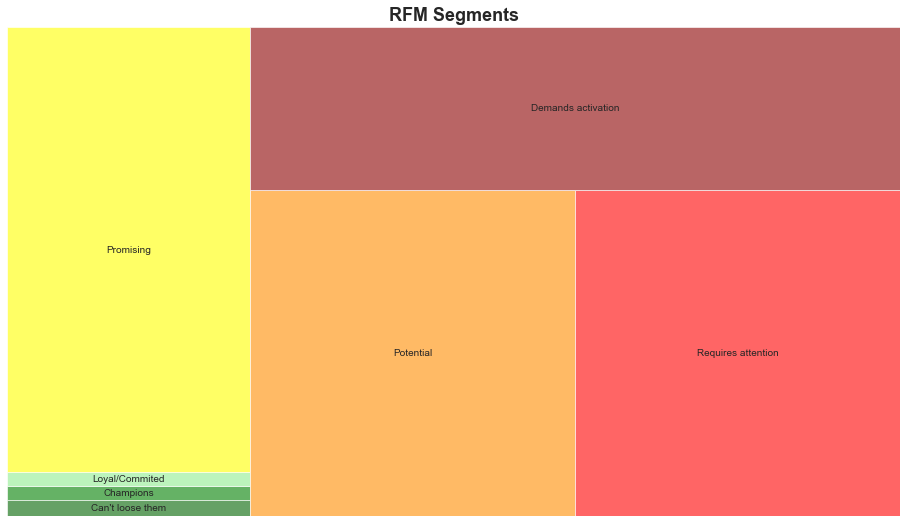

In [31]:
# Création d'un graphique représentant les différents segment.
fig = plt.gcf()
ax = fig.add_subplot()
colors = ["darkgreen",
          "green",
          "lightgreen",
          "yellow",
          "darkorange",
          "red",
          "darkred"]
fig.set_size_inches(16, 9)
squarify.plot(sizes=df2["Count"],
              label=["Can't loose them",
                     "Champions",
                     "Loyal/Commited",
                     "Promising",
                     "Potential",
                     "Requires attention",
                     "Demands activation"],
              color=colors,
              alpha=.6)
plt.title("RFM Segments", fontsize=18, fontweight="bold")
plt.axis('off')
plt.show()

**Distribution des variables en fonction des segments**

In [32]:
variables = ["frequency", "recency", "monetary"]

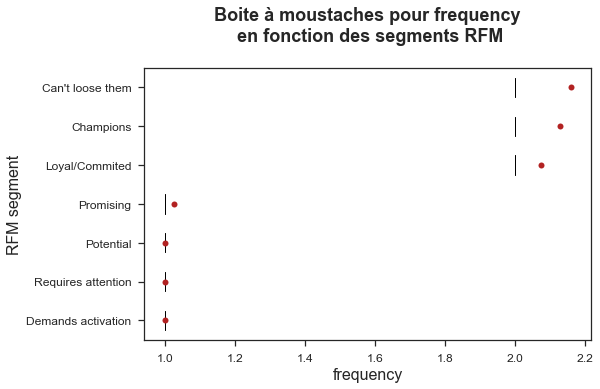

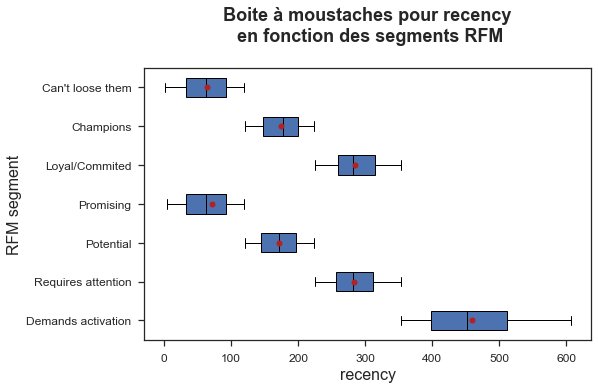

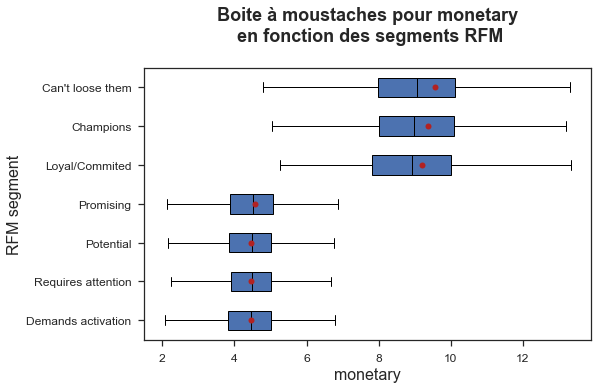

In [33]:
for i, variable in enumerate(variables):
    fig = plt.figure(figsize=(8, 5))

    # Pour faire les boites à moustaches en fonction des segments RFM
    modalites = ["Demands activation",
                 "Requires attention",
                 "Potential",
                 "Promising",
                 "Loyal/Commited",
                 "Champions",
                 "Can't loose them"]

    groupes = []
    for m in modalites:
        groupes.append(RFM_segment1[RFM_segment1["RFM_segment"] == m]
                       [variable])

    ax2 = fig.add_subplot(1, 1, 1)
    ax2.set_title("Boite à moustaches pour {variable}""\n"
                  " en fonction des segments RFM""\n"
                  .format(variable=variable),
                  fontweight='bold')
    ax2.set(xlabel="{variable}".format(variable=variable),
            ylabel="RFM segment")

    # Propriétés graphiques
    medianprops = {'color':"black"}
    meanprops = {'marker':'o',
                 'markeredgecolor':'black',
                 'markerfacecolor':'firebrick'}
    plt.boxplot(groupes,
                labels=modalites,
                showfliers=False,
                medianprops=medianprops,
                vert=False,
                patch_artist=True,
                showmeans=True,
                meanprops=meanprops)

Cette fois-ci la segmentation semble plus pertinente. Les clients ayant effectué plusieurs commandes sont majoritairement dans les 3 premières catégories. La récence et la valeur monétaire sont également bien différenciées entre chaque cluster.<br>
Est-il possible de faire mieux avec d'autres approches?

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

## <div class="alert alert-block alert-info"><a name="C24">2.4. Troisième essai en utilisant un "ranking" des clients</a></div>

In [34]:
RFM_segment2 = data_RFM_log.copy()

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

### <div class="alert alert-block alert-info"><a name="C241">2.4.1. Classement des clients</a></div>

In [35]:
RFM_segment2['R_rank'] = RFM_segment2['recency'].rank(ascending=False)
RFM_segment2['F_rank'] = RFM_segment2['frequency'].rank(ascending=True)
RFM_segment2['M_rank'] = RFM_segment2['monetary'].rank(ascending=True)

# Normalisation du rang des clients
RFM_segment2['R_rank_norm'] = (RFM_segment2['R_rank']
                               / RFM_segment2['R_rank'].max())*100
RFM_segment2['F_rank_norm'] = (RFM_segment2['F_rank']
                               / RFM_segment2['F_rank'].max())*100
RFM_segment2['M_rank_norm'] = (RFM_segment2['F_rank']
                               / RFM_segment2['M_rank'].max())*100

RFM_segment2.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

RFM_segment2.head()

customer  frequency  recency  monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2          1      116  4.874434   
1  0000b849f77a49e4a4ce2b2a4ca5be3f          1      119  2.990720   
2  0000f46a3911fa3c0805444483337064          1      542  4.248495   
3  0000f6ccb0745a6a4b88665a16c9f078          1      326  3.295466   
4  0004aac84e0df4da2b147fca70cf8255          1      293  5.198497   

   R_rank_norm  F_rank_norm  M_rank_norm  
0    76.213058    48.474114    48.474114  
1    75.183924    48.474114    48.474114  
2     3.600398    48.474114    48.474114  
3    28.808950    48.474114    48.474114  
4    33.820478    48.474114    48.474114

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

### <div class="alert alert-block alert-info"><a name="C242">2.4.2. Détermination des scores RFM</a></div>

Le score RFM est calculé en fonction des valeurs de récence, fréquence et monaitaire normalisées par le classement. Cette fois, les scores RFM sont compris entre 0 et 5 et la formule pour les calculer est: <br>
<CENTER> (0.15 $*$ Recency score) + (0.28 $*$ Frequency score) + (0.57 $*$ Monetary score)<CENTER> 

In [36]:
RFM_segment2['RFM_Score'] = ((0.15 * RFM_segment2['R_rank_norm'])
                             + (0.28 * RFM_segment2['F_rank_norm'])
                             + (0.57 * RFM_segment2['M_rank_norm']))

RFM_segment2['RFM_Score'] *= 0.05
RFM_segment2 = RFM_segment2.round(2)
RFM_segment2.head(7)

customer  frequency  recency  monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2          1      116      4.87   
1  0000b849f77a49e4a4ce2b2a4ca5be3f          1      119      2.99   
2  0000f46a3911fa3c0805444483337064          1      542      4.25   
3  0000f6ccb0745a6a4b88665a16c9f078          1      326      3.30   
4  0004aac84e0df4da2b147fca70cf8255          1      293      5.20   
5  0004bd2a26a76fe21f786e4fbd80607f          1      151      5.04   
6  00050ab1314c0e55a6ca13cf7181fecf          1      136      3.37   

   R_rank_norm  F_rank_norm  M_rank_norm  RFM_Score  
0        76.21        48.47        48.47       2.63  
1        75.18        48.47        48.47       2.62  
2         3.60        48.47        48.47       2.09  
3        28.81        48.47        48.47       2.28  
4        33.82        48.47        48.47       2.31  
5        67.48        48.47        48.47       2.57  
6        70.98        48.47        48.47       2.59

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

### <div class="alert alert-block alert-info"><a name="C243">2.4.3. Segmentation des clients</a></div>

Pour cette segmentation, les clients sont segmentés en 5 typologies:
- Top customer: score RFM supérieur à 4.5
- High value customer: score RFM compris entre 4 et 4.5
- Medium value customer: score RFM compris entre 3 et 4
- Low value customer: score RFM compris entre 1 et 3
- Lost customer: score RFM inférieur à 1

In [37]:
RFM_segment2["RFM_segment"] = np.where(RFM_segment2['RFM_Score'] > 4.5,
                                       "Top customer",
                                       (np.where(RFM_segment2['RFM_Score'] > 4,
                                                 "High value customer",
                                                 (np.where(RFM_segment2['RFM_Score'] > 3,
                                                           "Medium value customer",
                                                           np.where(RFM_segment2['RFM_Score'] > 1,
                                                                    'Low value customer',
                                                                    'Lost customer'))))))


RFM_segment2.head(5)

customer  frequency  recency  monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2          1      116      4.87   
1  0000b849f77a49e4a4ce2b2a4ca5be3f          1      119      2.99   
2  0000f46a3911fa3c0805444483337064          1      542      4.25   
3  0000f6ccb0745a6a4b88665a16c9f078          1      326      3.30   
4  0004aac84e0df4da2b147fca70cf8255          1      293      5.20   

   R_rank_norm  F_rank_norm  M_rank_norm  RFM_Score         RFM_segment  
0        76.21        48.47        48.47       2.63  Low value customer  
1        75.18        48.47        48.47       2.62  Low value customer  
2         3.60        48.47        48.47       2.09  Low value customer  
3        28.81        48.47        48.47       2.28  Low value customer  
4        33.82        48.47        48.47       2.31  Low value customer

In [38]:
# Création d'un jeu de données groupé sur les segments RFM
df_segment = RFM_segment2.groupby("RFM_segment").agg({"customer": "count",
                                                      "frequency": "mean",
                                                      "recency": "mean",
                                                      "monetary": "mean"})\
                                                .reset_index()

df_segment.columns = ["RFM_segment",
                      "Count",
                      "Frequency",
                      "Recency",
                      "Monetary_value"]

nb_customer = df_segment["Count"].sum()

df_segment.insert(2,
                  "Customer_proportion",
                  ((df_segment["Count"] * 100) / nb_customer))

# Mettre les segments dans l'ordre
df2 = df_segment.loc[pd.Series(
                     pd.Categorical(df_segment["RFM_segment"],
                                    categories=["Top customer",
                                                "High value customer",
                                                "Low value customer"],
                                    ordered=True))
                     .sort_values()
                     .index]

# Appliquer un code couleur du bleu au rouge
df2.style.background_gradient(cmap="coolwarm")

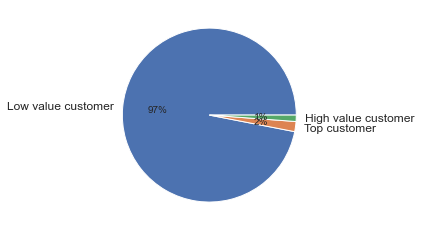

In [39]:
plt.pie(RFM_segment2.RFM_segment.value_counts(),
        labels=RFM_segment2.RFM_segment.value_counts().index,
        autopct='%.0f%%')
plt.show()

Cette segmentation aboutit à 3 catégories de clients et sépare surtout les clients ayant fait plusieurs commandes des clients n'en ayant fait qu'une seule. Une autre approche permettrait-elle d'obtenir une segmentation plus informative?

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

## <div class="alert alert-block alert-info"><a name="C25">2.5. Quatrième essai en utilisant la méthode des quintiles </a></div>

Cette fois, je vais déterminer un score entre 1 et 5 pour chacune des 3 variables. Plus ce score est élevé, mieux c'est. Pour déterminer ce score on peut utiliser la méthodes des quintiles décrites par:
https://practicaldatascience.co.uk/data-science/how-to-assign-rfm-scores-with-quantile-based-discretization

### <div class="alert alert-block alert-info"><a name="C251">2.5.1. Détermination des scores RFM</a></div>

In [40]:
RFM_segment3 = data[["customer_unique_id",
                     "number_of_order",
                     "number_of_days_since_last_order",
                     "price_log"]]

RFM_segment3.columns = ["customer",
                        "frequency",
                        "recency",
                        "monetary"]

In [41]:
# Création de 5 segments pour la variable "recency"
RFM_segment3 = RFM_segment3.assign(r=(pd.qcut(RFM_segment3["recency"],
                                              q=5,
                                              labels=[5, 4, 3, 2, 1])))

In [42]:
# Observation des segments créés
RFM_segment3.groupby("r").agg(count=("customer", "count"),
                              min_recency=("recency", min),
                              max_recency=("recency", max),
                              std_recency=("recency", "std"),
                              mean_recency=("recency", "mean")
                              ).sort_values(by="mean_recency")

count  min_recency  max_recency  std_recency  mean_recency
r                                                            
5  19206            1           98    25.772009     50.634021
4  18980           99          182    23.587663    141.074025
3  19119          183          273    26.563365    225.507035
2  19153          274          389    35.360672    322.385893
1  18962          390          729    62.921312    480.337517

In [43]:
# Création de 5 segments pour la variable "monetary"
RFM_segment3 = RFM_segment3.assign(m=(pd.qcut(RFM_segment3["monetary"],
                                              q=5,
                                              labels=[1, 2, 3, 4, 5])))

In [44]:
# Observation des segments créés
RFM_segment3.groupby("m").agg(count=("customer", "count"),
                              min_monetary=("monetary", min),
                              max_monetary=("monetary", max),
                              std_monetary=("monetary", "std"),
                              mean_monetary=("monetary", "mean")
                              ).sort_values(by="mean_monetary")

count  min_monetary  max_monetary  std_monetary  mean_monetary
m                                                                
1  19661      0.615186      3.711130      0.364292       3.239219
2  19592      3.711375      4.261270      0.155032       4.015750
3  18110      4.261834      4.712409      0.128254       4.512895
4  19010      4.713127      5.252221      0.148741       4.971158
5  19047      5.252273     57.456322      1.689726       6.382053

In [45]:
# Création de 5 segments pour la variable "frequency"
RFM_segment3 = RFM_segment3.assign(f=(pd.qcut(RFM_segment3["frequency"].
                                              rank(method="first"),
                                              q=5,
                                              labels=[5, 4, 3, 2, 1])))

In [46]:
# Observation des segments créés
RFM_segment3.groupby("f").agg(count=("customer", "count"),
                              min_frequency=("frequency", min),
                              max_frequency=("frequency", max),
                              std_frequency=("frequency", "std"),
                              mean_frequency=("frequency", "mean")
                              ).sort_values(by="mean_frequency")

count  min_frequency  max_frequency  std_frequency  mean_frequency
f                                                                    
5  19084              1              1       0.000000         1.00000
4  19084              1              1       0.000000         1.00000
3  19084              1              1       0.000000         1.00000
2  19084              1              1       0.000000         1.00000
1  19084              1             16       0.447172         1.17009

In [47]:
# Création du score RFM
RFM_segment3 = RFM_segment3.assign(RFM=(RFM_segment3["r"].astype(str)
                                        + RFM_segment3["f"].astype(str)
                                        + RFM_segment3["m"].astype(str)))

In [48]:
# Déterminer le nombre de scores uniques possibles
rfm_segment_unique = RFM_segment3.groupby("RFM")["RFM"].nunique()
print("Nombre de score RFM possible:",
      rfm_segment_unique.sum())

Nombre de score RFM possible: 125


In [48]:
# Création du score RFM global
RFM_segment3 = RFM_segment3.assign(RFM_global=(RFM_segment3["r"].astype(int)
                                               + RFM_segment3["f"].astype(int)
                                               + RFM_segment3["m"].astype(int)))
print("Score RFM gobal possible:",
      RFM_segment3['RFM_global'].unique())

Score RFM gobal possible: [13 10  8 11 12  7  9 15 14  6  5  4  3]


<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

### <div class="alert alert-block alert-info"><a name="C252">2.5.2. Segmentation des clients</a></div>

Les clients vont être répartis en différentes typologie:
- "Can't lose them": score RFM supérieur à 13
- "Champions": score RFM compris entre 9 et 13
- "Loyal/Committed": score RFM compris entre 7 et 9
- "Promising": score RFM compris entre 6 et 7
- "Potential": score RFM compris entre 5 et 6
- "Requires attention": score RFM compris entre 4 et 5
- "Demands activation": score RFM inférieur à 4

In [49]:
# Création d'une nouvelle variable contenant la typologie
RFM_segment3['RFM_segment'] = RFM_segment3.apply(RFM_segmentation15, axis=1)
RFM_segment3.head()

customer  frequency  recency  monetary  r  m  f  \
0  0000366f3b9a7992bf8c76cfdf3221e2          1      116  4.874434  4  4  5   
1  0000b849f77a49e4a4ce2b2a4ca5be3f          1      119  2.990720  4  1  5   
2  0000f46a3911fa3c0805444483337064          1      542  4.248495  1  2  5   
3  0000f6ccb0745a6a4b88665a16c9f078          1      326  3.295466  2  1  5   
4  0004aac84e0df4da2b147fca70cf8255          1      293  5.198497  2  4  5   

   RFM  RFM_global       RFM_segment  
0  454          13  Can't loose them  
1  451          10         Champions  
2  152           8    Loyal/Commited  
3  251           8    Loyal/Commited  
4  254          11         Champions

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

### <div class="alert alert-block alert-info"><a name="C253">2.5.3. Représentations graphiques</a></div>

**Quels sont les effectifs de chaque segment?**

In [50]:
# Création d'un jeu de données groupé sur les segments RFM
df_segment = RFM_segment3.groupby("RFM_segment").agg({"customer": "count",
                                                      "frequency": "mean",
                                                      "recency": "mean",
                                                      "monetary": "mean"})\
                                                .reset_index()

df_segment.columns = ["RFM_segment",
                      "Count",
                      "Frequency",
                      "Recency",
                      "Monetary_value"]

nb_customer = df_segment["Count"].sum()

df_segment.insert(2,
                  "Customer_proportion",
                  ((df_segment["Count"] * 100) / nb_customer))

# Mettre les segments dans l'ordre
df2 = df_segment.loc[pd.Series(
                     pd.Categorical(df_segment["RFM_segment"],
                                    categories=["Can't loose them",
                                                "Champions",
                                                "Loyal/Commited",
                                                "Promising",
                                                "Potential",
                                                "Requires attention",
                                                "Demands activation"],
                                    ordered=True))
                     .sort_values()
                     .index]

# Appliquer un code couleur du bleu au rouge
print(df2.style.background_gradient(cmap="coolwarm"))

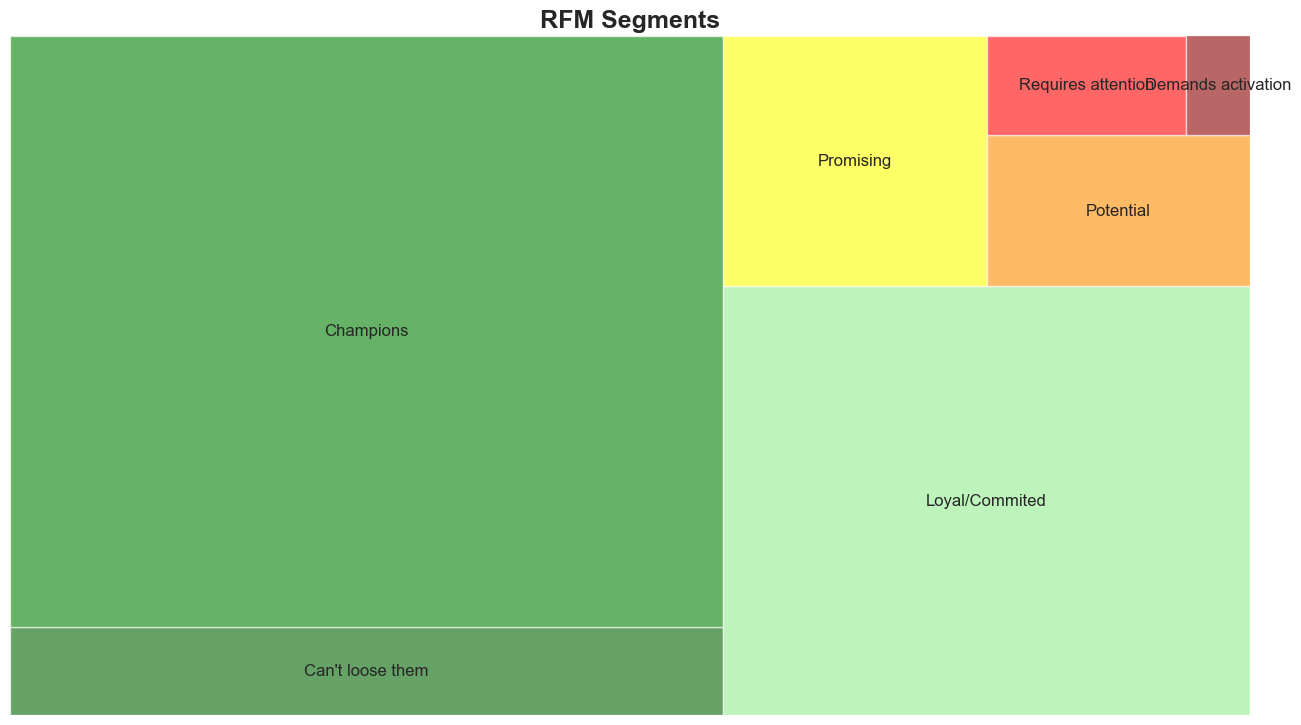

In [52]:
# Création d'un graphique représentant les différents segment.
fig = plt.gcf()
ax = fig.add_subplot()
colors = ["darkgreen",
          "green",
          "lightgreen",
          "yellow",
          "darkorange",
          "red",
          "darkred"]
fig.set_size_inches(16, 9)
squarify.plot(sizes=df2["Count"],
              label=["Can't loose them",
                     "Champions",
                     "Loyal/Commited",
                     "Promising",
                     "Potential",
                     "Requires attention",
                     "Demands activation"],
              color=colors,
              alpha=.6)
plt.title("RFM Segments", fontsize=18, fontweight="bold")
plt.axis('off')
plt.show()

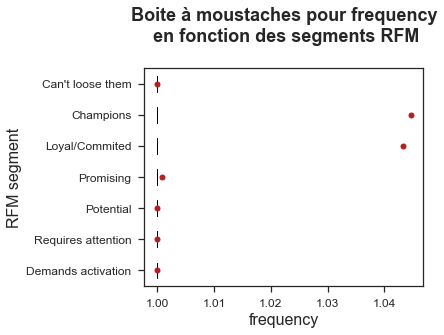

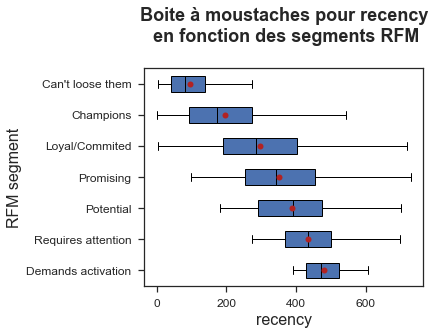

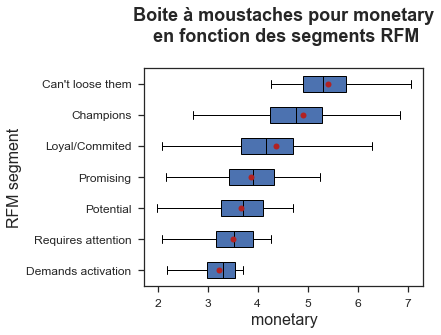

In [51]:
for i, variable in enumerate(variables):
    fig = plt.figure(figsize=(5, 4))

    # Pour faire les boites à moustaches en fonction des segments RFM
    modalites = ["Demands activation",
                 "Requires attention",
                 "Potential",
                 "Promising",
                 "Loyal/Commited",
                 "Champions",
                 "Can't loose them"]

    groupes = []
    for m in modalites:
        groupes.append(RFM_segment3[RFM_segment3["RFM_segment"] == m]
                       [variable])

    ax2 = fig.add_subplot(1, 1, 1)
    ax2.set_title("Boite à moustaches pour {variable}""\n"
                  " en fonction des segments RFM""\n"
                  .format(variable=variable),
                  fontweight='bold')
    ax2.set(xlabel="{variable}".format(variable=variable),
            ylabel="RFM segment")

    # Propriétés graphiques
    medianprops = {'color':"black"}
    meanprops = {'marker':'o',
                 'markeredgecolor':'black',
                 'markerfacecolor':'firebrick'}
    plt.boxplot(groupes,
                labels=modalites,
                showfliers=False,
                medianprops=medianprops,
                vert=False,
                patch_artist=True,
                showmeans=True,
                meanprops=meanprops)

Avec cette méthode, la segmentation s'appuie surtout sur la valeur monétaire et la récence. Cette segmentation n'est pas non plus satisfaisante.  

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


## <div class="alert alert-block alert-info"><a name="C26">2.6. Cinquième essai en utilisant l'algorithme du K-Means pour déterminer les scores RFM</a></div>

### <div class="alert alert-block alert-info"><a name="C261">2.6.1. Détermination du score RFM par le K-Means de manière indépendante pour chaque variable</a></div>

In [52]:
# Création du jeu de données
data_kmeans0 = data[["customer_unique_id",
                     "number_of_order",
                     "number_of_days_since_last_order",
                     "price"]]

data_kmeans0.columns = ["customer",
                        "frequency",
                        "recency",
                        "monetary"]

In [53]:
# Fonction pour déterminer les scores R, F et M entre 1 et 5 avec le K-Means
def sorted_kmeans(df, metric_column, cluster_name, ascending=True, log=False):
    """Runs a K-means clustering algorithm on a specific metric column
    in a Pandas dataframe; sorts the data in a specified direction; and
    reassigns cluster numbers to match the data distribution, so they
    are appropriate for RFM segmentation. Includes a log+1 transformation
    for heavily skewed datasets.

    :param df: Pandas dataframe containing RFM data
    :param metric_column: Column name of metric to cluster, i.e. 'recency'
    :param cluster_name: Name to assign to clustered metric, i.e. 'R'
    :param ascending: Sort ascending (M and F), or descending (R)
    :return
        Original Pandas dataframe with additional column
    """

    if log:
        df[metric_column] = np.log(df[metric_column]+1)

    # Fit the model
    kmeans = KMeans(n_clusters=5)
    kmeans.fit(df[[metric_column]])

    # Assign the initial unsorted cluster
    initial_cluster = 'unsorted_'+cluster_name
    df[initial_cluster] = kmeans.predict(df[[metric_column]])+1
    df[cluster_name] = df[initial_cluster]

    # Group the clusters and re-rank to determine the correct order
    df_sorted = df.groupby(initial_cluster)[metric_column]\
                  .mean().round(2).reset_index()
    df_sorted = df_sorted.sort_values(by=metric_column, ascending=ascending)\
                         .reset_index(drop=True)
    df_sorted[cluster_name] = df_sorted[metric_column].rank(method='max',
                                                            ascending=ascending)\
                                                      .astype(int)

    # Merge data and drop redundant columns
    df = df.merge(df_sorted[[cluster_name, initial_cluster]],
                  on=[initial_cluster])
    df = df.drop(initial_cluster, axis=1)
    df = df.drop(cluster_name+'_x', axis=1)
    df = df.rename(columns={cluster_name+'_y':cluster_name})

    return df

In [54]:
# Utilisation de la fonction précédente
data_kmeans0 = sorted_kmeans(data_kmeans0, "recency", "R", ascending=False)
data_kmeans0 = sorted_kmeans(data_kmeans0, "frequency", "F", ascending=True)
data_kmeans0 = sorted_kmeans(data_kmeans0, "monetary", "M", ascending=True)

C:\Users\virgi\AppData\Local\Temp\ipykernel_7748\579818684.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[initial_cluster] = kmeans.predict(df[[metric_column]])+1
C:\Users\virgi\AppData\Local\Temp\ipykernel_7748\579818684.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cluster_name] = df[initial_cluster]


In [55]:
data_kmeans0.head()

customer  frequency  recency  monetary  R  F  M
0  0000366f3b9a7992bf8c76cfdf3221e2          1      116    129.90  4  1  1
1  0000b849f77a49e4a4ce2b2a4ca5be3f          1      119     18.90  4  1  1
2  0004bd2a26a76fe21f786e4fbd80607f          1      151    154.00  4  1  1
3  00050ab1314c0e55a6ca13cf7181fecf          1      136     27.99  4  1  1
4  0005ef4cd20d2893f0d9fbd94d3c0d97          1      175    104.90  4  1  1

In [56]:
# Création du score RFM global
data_kmeans0 = data_kmeans0.assign(RFM_global=(data_kmeans0["R"].astype(int)
                                               + data_kmeans0["F"].astype(int)
                                               + data_kmeans0["M"].astype(int)))

print("Score RFM gobal possible:",
      data_kmeans0['RFM_global'].unique())

Score RFM gobal possible: [ 6  3  4  5  7  8  9 10 11 12 13]


<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

### <div class="alert alert-block alert-info"><a name="C262">2.6.2. Segmentation des clients</a></div>

Les clients vont être répartis en différentes typologie:
- "Can't lose them": score RFM supérieur à 13
- "Champions": score RFM compris entre 9 et 13
- "Loyal/Committed": score RFM compris entre 7 et 9
- "Promising": score RFM compris entre 6 et 7
- "Potential": score RFM compris entre 5 et 6
- "Requires attention": score RFM compris entre 4 et 5
- "Demands activation": score RFM inférieur à 4

In [57]:
# Création d'une nouvelle variable contenant la typologie
data_kmeans0['RFM_segment'] = data_kmeans0.apply(RFM_segmentation15, axis=1)
data_kmeans0.head()

customer  frequency  recency  monetary  R  F  M  \
0  0000366f3b9a7992bf8c76cfdf3221e2          1      116    129.90  4  1  1   
1  0000b849f77a49e4a4ce2b2a4ca5be3f          1      119     18.90  4  1  1   
2  0004bd2a26a76fe21f786e4fbd80607f          1      151    154.00  4  1  1   
3  00050ab1314c0e55a6ca13cf7181fecf          1      136     27.99  4  1  1   
4  0005ef4cd20d2893f0d9fbd94d3c0d97          1      175    104.90  4  1  1   

   RFM_global RFM_segment  
0           6   Promising  
1           6   Promising  
2           6   Promising  
3           6   Promising  
4           6   Promising

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

### <div class="alert alert-block alert-info"><a name="C263">2.6.3. Représentations graphiques</a></div>

**Quels sont les effectifs de chaque segment?**

In [58]:
# Création d'un jeu de données groupé sur les segments RFM
df_segment = data_kmeans0.groupby("RFM_segment").agg({"customer": "count",
                                                      "frequency": "mean",
                                                      "recency": "mean",
                                                      "monetary": "mean"})\
                                                .reset_index()

df_segment.columns = ["RFM_segment",
                      "Count",
                      "Frequency",
                      "Recency",
                      "Monetary_value"]

nb_customer = df_segment["Count"].sum()

df_segment.insert(2,
                  "Customer_proportion",
                  ((df_segment["Count"] * 100) / nb_customer))

# Mettre les segments dans l'ordre
df2 = df_segment.loc[pd.Series(
                     pd.Categorical(df_segment["RFM_segment"],
                                    categories=["Can't loose them",
                                                "Champions",
                                                "Loyal/Commited",
                                                "Promising",
                                                "Potential",
                                                "Requires attention",
                                                "Demands activation"],
                                    ordered=True))
                     .sort_values()
                     .index]

# Appliquer un code couleur du bleu au rouge
df2.style.background_gradient(cmap="coolwarm")

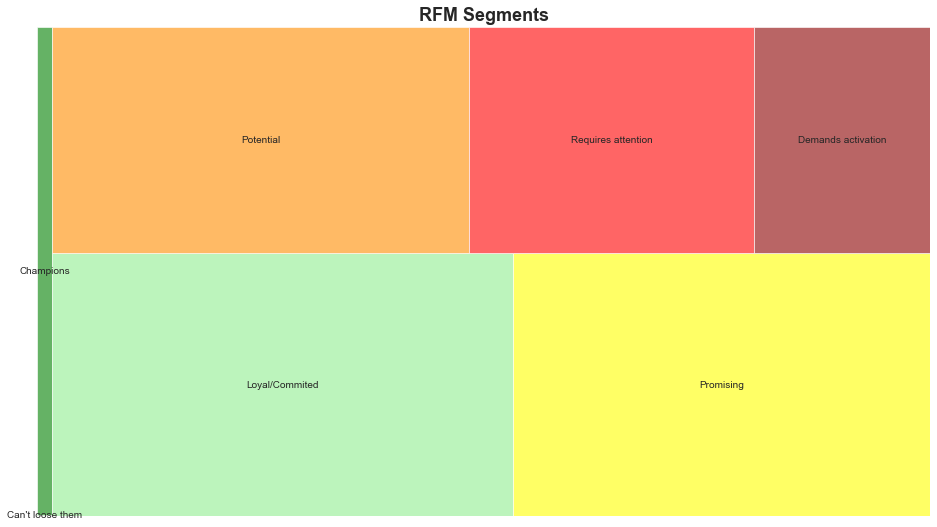

In [59]:
# Création d'un graphique représentant les différents segment.
fig = plt.gcf()
ax = fig.add_subplot()
colors = ["darkgreen",
          "green",
          "lightgreen",
          "yellow",
          "darkorange",
          "red",
          "darkred"]
fig.set_size_inches(16, 9)
squarify.plot(sizes=df2["Count"],
              label=["Can't loose them",
                     "Champions",
                     "Loyal/Commited",
                     "Promising",
                     "Potential",
                     "Requires attention",
                     "Demands activation"],
              color=colors,
              alpha=.6)
plt.title("RFM Segments", fontsize=18, fontweight="bold")
plt.axis('off')
plt.show()

Le graphique ci-dessous correspondent à la variable frequency


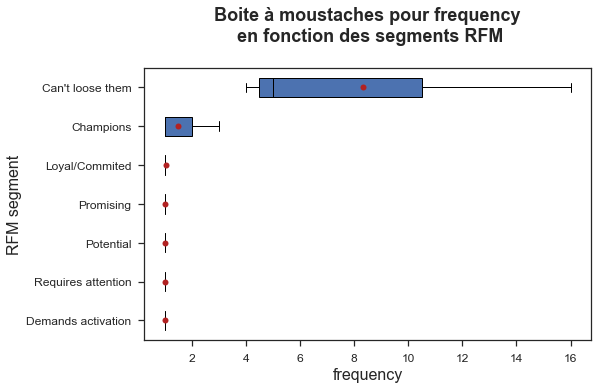

Le graphique ci-dessous correspondent à la variable recency


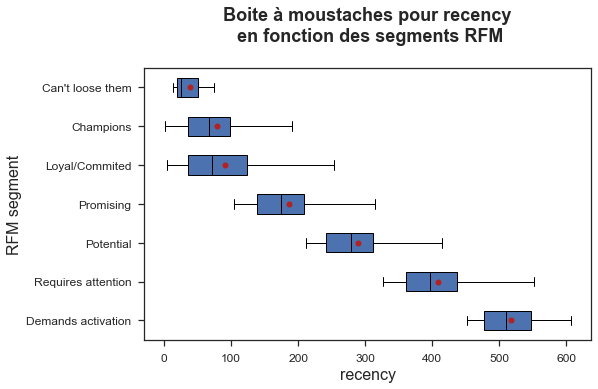

Le graphique ci-dessous correspondent à la variable monetary


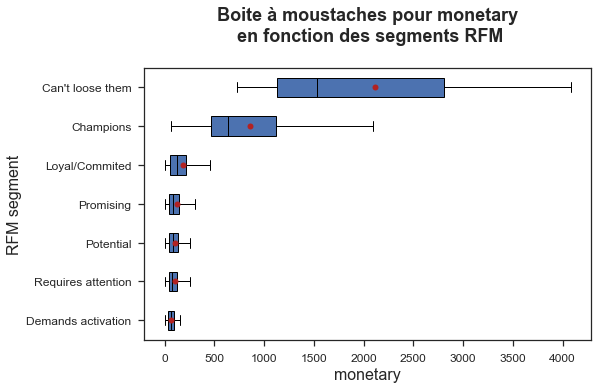

In [60]:
for i, variable in enumerate(variables):
    print("Le graphique ci-dessous correspondent à la variable", variable)
    fig = plt.figure(figsize=(8, 5))

    # Pour faire les boites à moustaches en fonction des segments RFM
    modalites = ["Demands activation",
                 "Requires attention",
                 "Potential",
                 "Promising",
                 "Loyal/Commited",
                 "Champions",
                 "Can't loose them"]

    groupes = []
    for m in modalites:
        groupes.append(data_kmeans0[data_kmeans0["RFM_segment"] == m]
                       [variable])

    ax2 = fig.add_subplot(1, 1, 1)
    ax2.set_title("Boite à moustaches pour {variable}""\n"
                  " en fonction des segments RFM""\n"
                  .format(variable=variable),
                  fontweight='bold')
    ax2.set(xlabel="{variable}".format(variable=variable),
            ylabel="RFM segment")

    # Propriétés graphiques
    medianprops = {'color':"black"}
    meanprops = {'marker':'o',
                 'markeredgecolor':'black',
                 'markerfacecolor':'firebrick'}
    plt.boxplot(groupes,
                labels=modalites,
                showfliers=False,
                medianprops=medianprops,
                vert=False,
                patch_artist=True,
                showmeans=True,
                meanprops=meanprops)
    plt.show()

Cette segmentation ne semble pas pertinente notamment avec le premier segment qui ne comprend que 3 clients. Est-il possible de l'améliorer en utilisant l'échelle logarithmique?

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


## <div class="alert alert-block alert-info"><a name="C27">2.7. Sixième essai en utilisant l'algorithme du K-Means pour déterminer les scores RFM avec les variables en échelle logarithmique</a></div>

### <div class="alert alert-block alert-info"><a name="C271">2.7.1. Détermination du score RFM par le K-Means de manière indépendante pour chaque variable</a></div>

In [61]:
# Création du jeu de données
data_klog = data[["customer_unique_id",
                  "number_of_order",
                  "number_of_days_since_last_order",
                  "price_log"]]

data_klog.columns = ["customer",
                     "frequency",
                     "recency",
                     "monetary"]

In [62]:
# Utilisation de la fonction précédente
data_klog = sorted_kmeans(data_klog, "recency", "R", ascending=False)
data_klog = sorted_kmeans(data_klog, "frequency", "F", ascending=True)
data_klog = sorted_kmeans(data_klog, "monetary", "M", ascending=True)

C:\Users\virgi\AppData\Local\Temp\ipykernel_7748\579818684.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[initial_cluster] = kmeans.predict(df[[metric_column]])+1
C:\Users\virgi\AppData\Local\Temp\ipykernel_7748\579818684.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cluster_name] = df[initial_cluster]


In [63]:
data_klog.head()

customer  frequency  recency  monetary  R  F  M
0  0000366f3b9a7992bf8c76cfdf3221e2          1      116  4.874434  4  1  2
1  0004bd2a26a76fe21f786e4fbd80607f          1      151  5.043425  4  1  2
2  0005ef4cd20d2893f0d9fbd94d3c0d97          1      175  4.662495  4  1  2
3  000949456b182f53c18b68d6babc79c1          1      133  4.187987  4  1  2
4  0019da6aa6bcb27cc32f1249bd12da05          1      205  4.393214  4  1  2

In [64]:
data_klog["RFM_global"] = (data_klog["R"].astype(int)
                           + data_klog["F"].astype(int)
                           + data_klog["M"].astype(int))
print("Score RFM gobal possible:",
      data_klog['RFM_global'].unique())

Score RFM gobal possible: [ 7  4  5  6  8  9  3 10 11 12 13 14 15]


<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

### <div class="alert alert-block alert-info"><a name="C272">2.7.2. Segmentation des clients</a></div>

Les clients vont être répartis en différentes typologie:
- "Can't lose them": score RFM supérieur à 13
- "Champions": score RFM compris entre 9 et 13
- "Loyal/Committed": score RFM compris entre 7 et 9
- "Promising": score RFM compris entre 6 et 7
- "Potential": score RFM compris entre 5 et 6
- "Requires attention": score RFM compris entre 4 et 5
- "Demands activation": score RFM inférieur à 4

In [65]:
# Création d'une nouvelle variable contenant la typologie
data_klog['RFM_segment'] = data_klog.apply(RFM_segmentation15, axis=1)
data_klog.head()

customer  frequency  recency  monetary  R  F  M  \
0  0000366f3b9a7992bf8c76cfdf3221e2          1      116  4.874434  4  1  2   
1  0004bd2a26a76fe21f786e4fbd80607f          1      151  5.043425  4  1  2   
2  0005ef4cd20d2893f0d9fbd94d3c0d97          1      175  4.662495  4  1  2   
3  000949456b182f53c18b68d6babc79c1          1      133  4.187987  4  1  2   
4  0019da6aa6bcb27cc32f1249bd12da05          1      205  4.393214  4  1  2   

   RFM_global     RFM_segment  
0           7  Loyal/Commited  
1           7  Loyal/Commited  
2           7  Loyal/Commited  
3           7  Loyal/Commited  
4           7  Loyal/Commited

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

### <div class="alert alert-block alert-info"><a name="C273">2.7.3. Représentations graphiques</a></div>

**Quels sont les effectifs de chaque segment?**

In [66]:
# Création d'un jeu de données groupé sur les segments RFM
df_segment = data_klog.groupby("RFM_segment").agg({"customer": "count",
                                                   "frequency": "mean",
                                                   "recency": "mean",
                                                   "monetary": "mean"})\
                                             .reset_index()

df_segment.columns = ["RFM_segment",
                      "Count",
                      "Frequency",
                      "Recency",
                      "Monetary_value"]

nb_customer = df_segment["Count"].sum()

df_segment.insert(2,
                  "Customer_proportion",
                  ((df_segment["Count"] * 100) / nb_customer))

# Mettre les segments dans l'ordre
df2 = df_segment.loc[pd.Series(
                     pd.Categorical(df_segment["RFM_segment"],
                                    categories=["Can't loose them",
                                                "Champions",
                                                "Loyal/Commited",
                                                "Promising",
                                                "Potential",
                                                "Requires attention",
                                                "Demands activation"],
                                    ordered=True))
                     .sort_values()
                     .index]

# Appliquer un code couleur du bleu au rouge
df2.style.background_gradient(cmap="coolwarm")

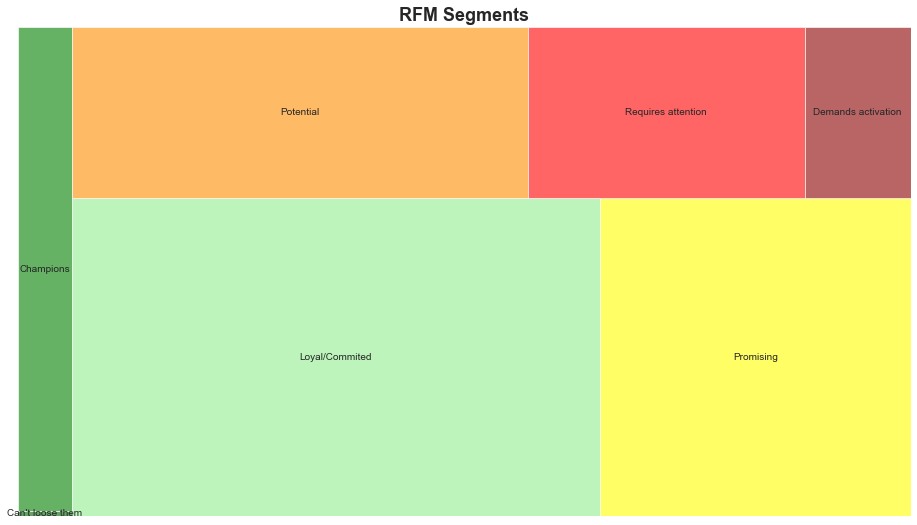

In [67]:
# Création d'un graphique représentant les différents segment.
fig = plt.gcf()
ax = fig.add_subplot()
colors = ["darkgreen",
          "green",
          "lightgreen",
          "yellow",
          "darkorange",
          "red",
          "darkred"]
fig.set_size_inches(16, 9)
squarify.plot(sizes=df2["Count"],
              label=["Can't loose them",
                     "Champions",
                     "Loyal/Commited",
                     "Promising",
                     "Potential",
                     "Requires attention",
                     "Demands activation"],
              color=colors,
              alpha=.6)
plt.title("RFM Segments", fontsize=18, fontweight="bold")
plt.axis('off')
plt.show()

Les graphiques ci-dessous correspondent à la variable frequency
Les graphiques ci-dessous correspondent à la variable recency
Les graphiques ci-dessous correspondent à la variable monetary


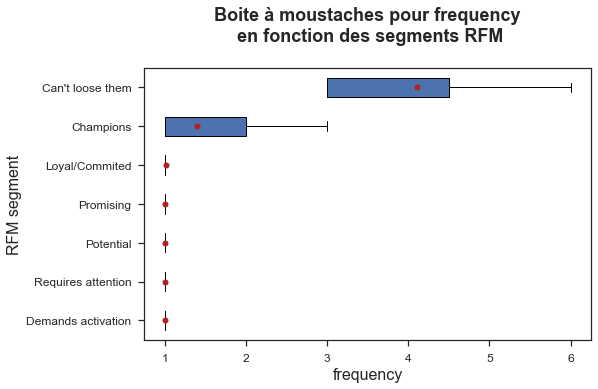

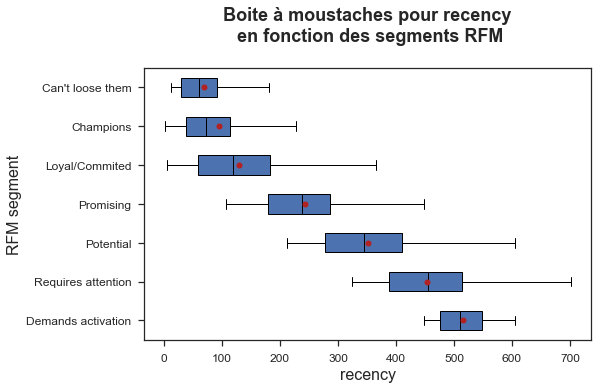

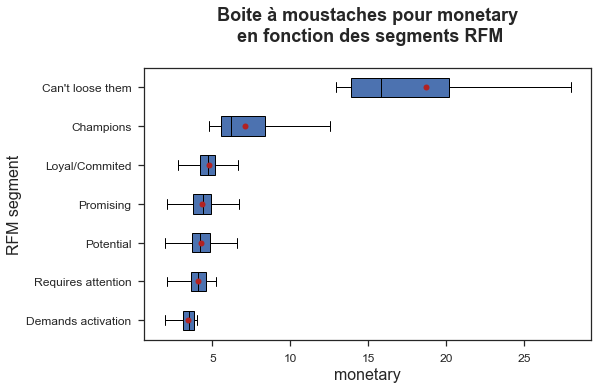

In [68]:
for i, variable in enumerate(variables):
    print("Les graphiques ci-dessous correspondent à la variable", variable)
    fig = plt.figure(figsize=(8, 5))

    # Pour faire les boites à moustaches en fonction des segments RFM
    modalites = ["Demands activation",
                 "Requires attention",
                 "Potential",
                 "Promising",
                 "Loyal/Commited",
                 "Champions",
                 "Can't loose them"]

    groupes = []
    for m in modalites:
        groupes.append(data_klog[data_klog["RFM_segment"] == m]
                       [variable])

    ax2 = fig.add_subplot(1, 1, 1)
    ax2.set_title("Boite à moustaches pour {variable}""\n"
                  " en fonction des segments RFM""\n"
                  .format(variable=variable),
                  fontweight='bold')
    ax2.set(xlabel="{variable}".format(variable=variable),
            ylabel="RFM segment")

    # Propriétés graphiques
    medianprops = {'color':"black"}
    meanprops = {'marker':'o',
                 'markeredgecolor':'black',
                 'markerfacecolor':'firebrick'}
    plt.boxplot(groupes,
                labels=modalites,
                showfliers=False,
                medianprops=medianprops,
                vert=False,
                patch_artist=True,
                showmeans=True,
                meanprops=meanprops)

L'utilisation de l'échelle logarithmique n'améliore pas énormément la segmentation.
Jusqu'à présent, la meilleur segmentation en utilisant les variables récence, fréquence et valeur monétaire a été obtenu avec la méthode des quantiles en utilisant la valeur monétaire en échelle logarithmique.

Est-ce qu'un algorithme de clustering peut améliorer la segmentation? L'utilisation d'autres informations concernant les clients sont-elles pertinentes pour améliorer la segmentation?<br>
Pour répondre à ces questions, je vais à présent essayer de segmenter les clients en utilisant les algorithmes du K-means et du DBSCAN sur les 3 variables RFM puis en incluant les autres variables.

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

# <div class="alert alert-block alert-info"><a name="C3">3. Segmentation des clients en utilisant le k-means</a></div>

## <div class="alert alert-block alert-info"><a name="C31">3.1. Utilisation du K-means de manière globale (sur les 3 variables RFM en même temps)</a></div>

In [8]:
# préparation du jeu de données
data_kmeans1 = data_RFM.copy()

In [9]:
# Standardisation des données
col_to_norm1 = list(data_kmeans1.dtypes[data_kmeans1.dtypes != object].index)
preprocessor1 = ColumnTransformer([("scaler", StandardScaler(), col_to_norm1)])

data_kmeans1_norm = preprocessor1.fit_transform(data_kmeans1)

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


### <div class="alert alert-block alert-info"><a name="C311">3.1.1. Détermination de la valeur de k optimale</a></div>


In [10]:
# Liste des hyperparamètres à tester
initialisation = ["k-means++", "random"]
nb_init = [1, 10, 20]
random_state = [0, 42]

Avec init = k-means++ , n_init = 1 and random_state = 0


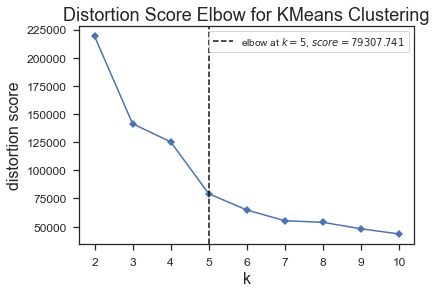

Avec init = k-means++ , n_init = 10 and random_state = 0


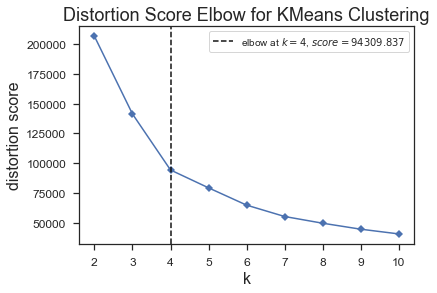

Avec init = k-means++ , n_init = 20 and random_state = 0


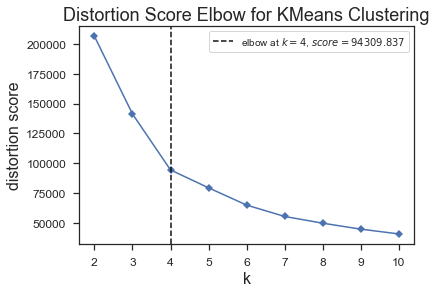

Avec init = k-means++ , n_init = 1 and random_state = 42


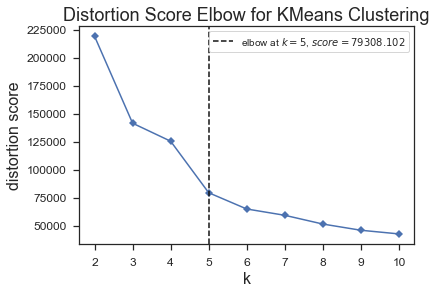

Avec init = k-means++ , n_init = 10 and random_state = 42


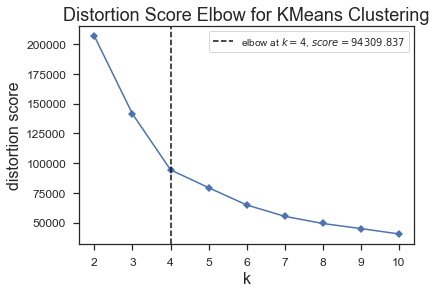

Avec init = k-means++ , n_init = 20 and random_state = 42


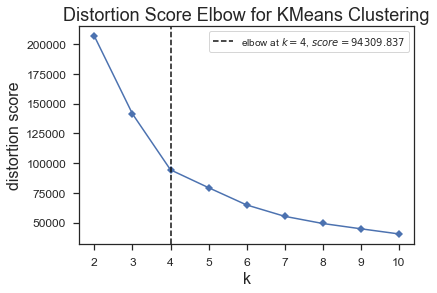

Avec init = random , n_init = 1 and random_state = 0


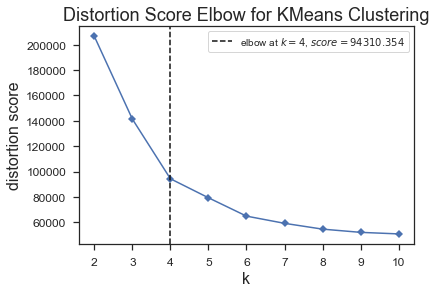

Avec init = random , n_init = 10 and random_state = 0


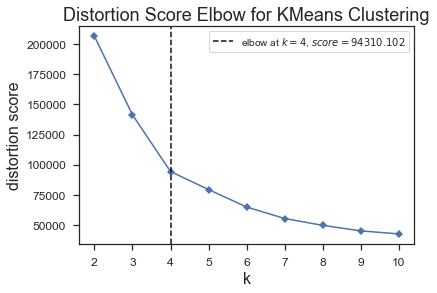

Avec init = random , n_init = 20 and random_state = 0


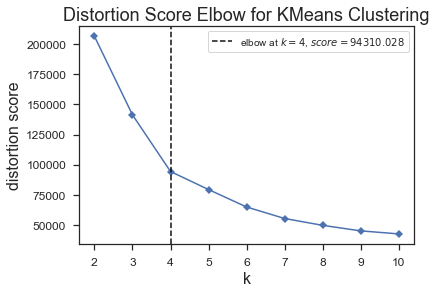

Avec init = random , n_init = 1 and random_state = 42


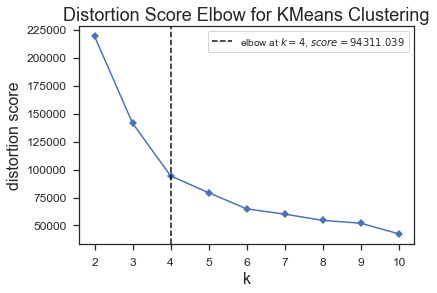

Avec init = random , n_init = 10 and random_state = 42


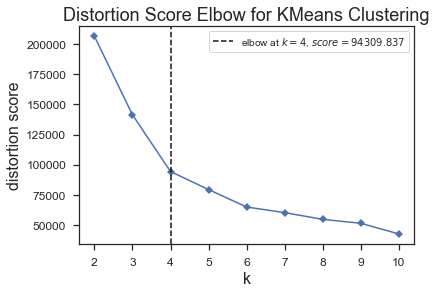

Avec init = random , n_init = 20 and random_state = 42


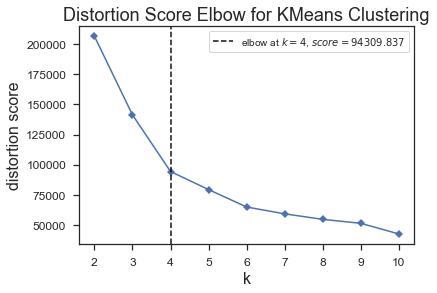

In [11]:
K_list1 = []

# Calcul du K-means pour déterminer les différentes métriques
for i in initialisation:
    for r in random_state:
        for n in nb_init:
            # Définition de l'algorithme utilisé
            model = KMeans(init=i, n_init=n, random_state=r)
            print("Avec init =", i,
                  ", n_init =", n,
                  "and random_state =", r)
            
            KMeans_visualizer = KElbowVisualizer(model,
                                                 K=(2, 15),
                                                 metric="distortion",
                                                 timings=False)
            KMeans_visualizer.fit(data_kmeans1_norm)
            KMeans_visualizer.show()
            K = KMeans_visualizer.elbow_value_
            K_list1.append(K)

In [12]:
# Pour avoir une liste de valeur k contenant que des valeurs uniques
K_list1 = np.unique(K_list1)
print("Nombre de cluster optimal trouvé:", K_list1)

Nombre de cluster optimal trouvé: [4 5]


<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


### <div class="alert alert-block alert-info"><a name="C312">3.1.2. Détermination de certains paramètres de scoring avec le module 'metrics' de scikit-learn</a></div>

Un coefficient de silhouette plus élevé est lié à un modèle avec des clusters mieux définis tandis qu'un score de Davies Bouldin plus proche de 0 indiquent une meilleure partition.

In [20]:
# Jeu de données pour rassembler les résultats
results = pd.DataFrame(columns=["Init",
                                "n_init",
                                "Random_state",
                                "Number of cluster",
                                "Inertie",
                                "Silhouette score",
                                "Davies Bouldin score",
                                "Cluster max sizes",
                                "Cluster min sizes"])                                

In [21]:
for i in initialisation:
    for r in random_state:
        for n in nb_init:
            for k in K_list1:
                model = KMeans(n_clusters=k, init=i, n_init=n, random_state=r)
                model.fit(data_kmeans1_norm)
                clusters = model.labels_
                labels, counts = np.unique(clusters, return_counts=True)
                inertia = model.inertia_

                silh = silhouette_score(data_kmeans1_norm, model.labels_)
                DB = davies_bouldin_score(data_kmeans1_norm, model.labels_)

                result_model = pd.DataFrame({"Init": [i],
                                             "n_init": [n],
                                             "Random_state": [r],
                                             "Number of cluster": [k],
                                             "Inertie": [inertia],
                                             "Silhouette score": [silh],
                                             "Davies Bouldin score": [DB],
                                             "Cluster max sizes": [counts.max()],
                                             "Cluster min sizes": [counts.min()]})
                results = pd.concat([results, result_model])

In [22]:
results.reset_index(drop=True, inplace=True)

# Filtre pour garder que les clustering 
# avec des clusters comprenant plus de 500 clients
mask = results["Cluster min sizes"] > 500
df_mask = results[mask]

# Quel est le score de silhouette le plus proche de 1?
df_mask.loc[df_mask["Silhouette score"] == df_mask["Silhouette score"].max()]

Init n_init Random_state Number of cluster       Inertie  \
12  random      1            0                 4  94310.530235   

    Silhouette score  Davies Bouldin score Cluster max sizes Cluster min sizes  
12          0.490877              0.677661             52036              2278

En prenant en compte les différents indicateurs, les hyperparamètres optimums sont:
- init = random
- n_init = 1
- random_state = 0
- number of cluster = 4

In [23]:
model1 = KMeans(n_clusters=4, init="random", n_init=1, random_state=0)

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


### <div class="alert alert-block alert-info"><a name="C313">3.1.3. Coefficient de silhouette et distances interclusters</a></div>

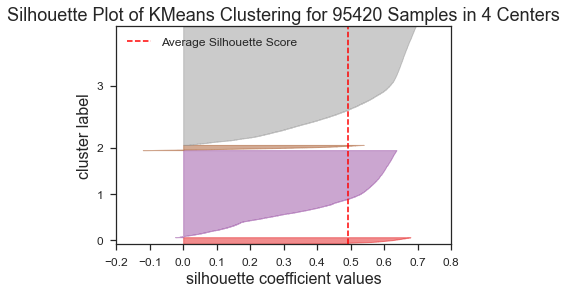

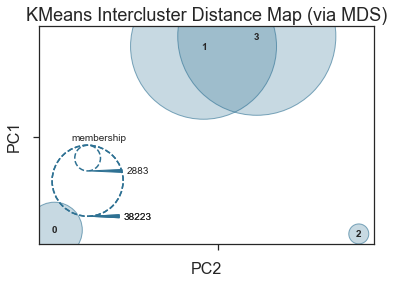

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [24]:
silhouette_visualizer = SilhouetteVisualizer(model1)
silhouette_visualizer.fit(data_kmeans1_norm)
silhouette_visualizer.show()

intercluster_distance_visualizer = InterclusterDistance(model1)
intercluster_distance_visualizer.fit(data_kmeans1_norm)
intercluster_distance_visualizer.show()

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


### <div class="alert alert-block alert-info"><a name="C314">3.1.4. Représentations graphiques des différents clusters</a></div>

In [25]:
# Calcul de l'ACP
pca = PCA(n_components=2)
pca.fit(data_kmeans1_norm)
print(pca.explained_variance_ratio_.cumsum())
X_trans = pca.transform(data_kmeans1_norm)

# Calcul du T-SNE
tsne = TSNE(n_components=2, init="random", learning_rate=200)
T = tsne.fit_transform(data_kmeans1_norm)

[0.36938074 0.70282884]


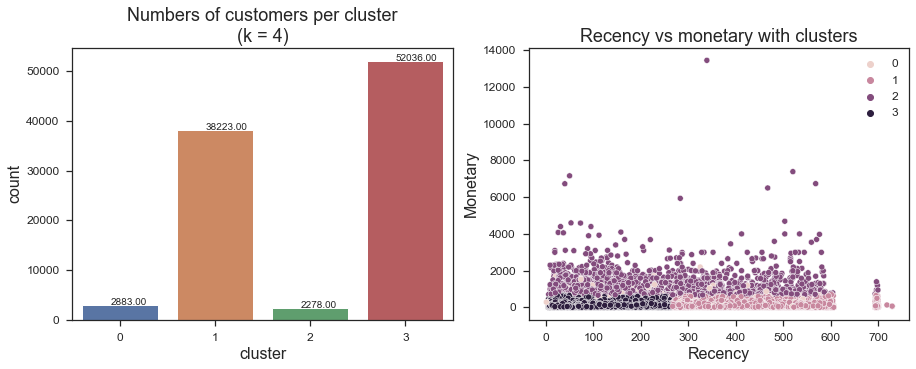

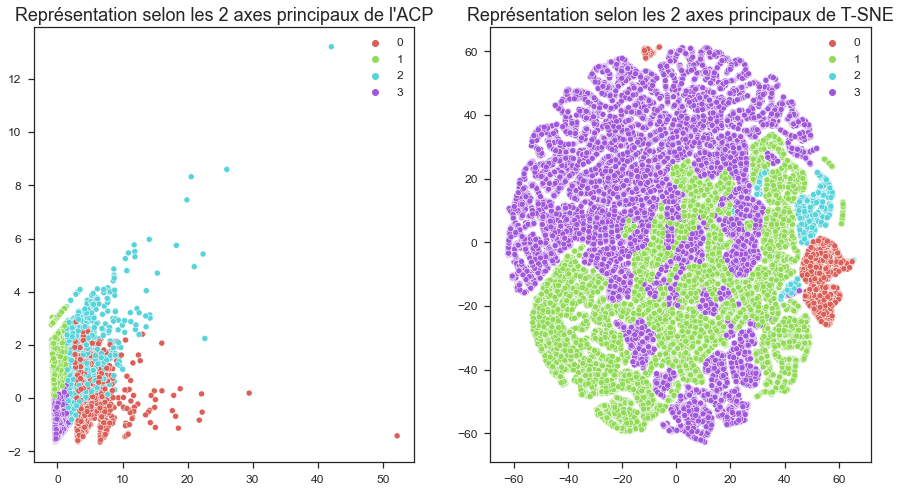

In [27]:
data_graph = data_kmeans1.copy()
k = 4

model1.fit(data_kmeans1_norm)
kmeans_cat = model1.predict(data_kmeans1_norm)
data_graph["cluster"] = kmeans_cat

# Représentation du nombre de clients par cluster
fig = plt.figure(figsize=(15, 5))
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.countplot(data=data_graph, x='cluster')
for p in ax1.patches:
    ax1.annotate("{:.2f}".format(p.get_height()),
                 (p.get_x() + 0.3,
                 p.get_height() + 1))
ax1.set_title("Numbers of customers per cluster""\n"
              "(k = {k})".format(k=k))

# Représentation de recency et monetary par cluster
ax2 = plt.subplot(1, 2, 2)
ax2 = sns.scatterplot(data=data_kmeans1,
                      x="recency",
                      y="monetary",
                      hue=kmeans_cat)
ax2.set_title("Recency vs monetary with clusters")
ax2.set_xlabel("Recency")
ax2.set_ylabel("Monetary")
plt.show()

# Représentation selon ACP
figb = plt.figure(figsize=(15, 8))
ax1b = plt.subplot(1, 2, 1)
ax1b = sns.scatterplot(x=X_trans[:, 0],
                       y=X_trans[:, 1],
                       hue=kmeans_cat,
                       legend='full',
                       palette=sns.color_palette("hls", k))
ax1b.set_title("Représentation selon les 2 axes principaux de l'ACP")

# Représentation selon T-SNE
ax2b = plt.subplot(1, 2, 2)
ax2b = sns.scatterplot(x=T[:, 0],
                       y=T[:, 1],
                       hue=kmeans_cat,
                       legend='full',
                       palette=sns.color_palette("hls", k))
ax2b.set_title("Représentation selon les 2 axes principaux de T-SNE")
plt.show()

## <div class="alert alert-block alert-info"><a name="C32">3.2. Utilisation du K-means de manière globale (sur les 3 variables RFM en même temps en échelle logarithmique)</a></div>

In [8]:
data_kmeans1_log = data_RFM_log.copy()

In [9]:
# Standardisation des données
col_to_norm = list(data_kmeans1_log.dtypes[data_kmeans1_log.dtypes
                                           != object].index)
preprocessor = ColumnTransformer([("scaler", StandardScaler(), col_to_norm)])

data_kmeans1_l_norm = preprocessor.fit_transform(data_kmeans1_log)

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


### <div class="alert alert-block alert-info"><a name="C321">3.2.1. Détermination de la valeur de k optimale</a></div>


In [10]:
# Liste des hyperparamètres à tester
initialisation = ["k-means++", "random"]
nb_init = [1, 10, 20]
random_state = [0, 42]

Avec init = k-means++ , n_init = 1 and random_state = 0


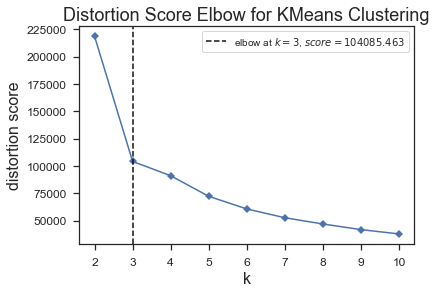

Avec init = k-means++ , n_init = 10 and random_state = 0


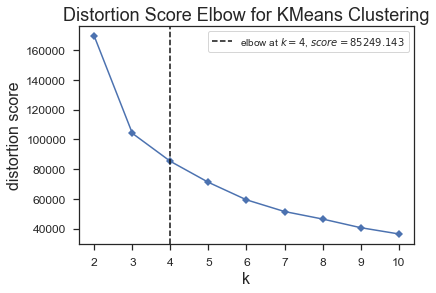

Avec init = k-means++ , n_init = 20 and random_state = 0


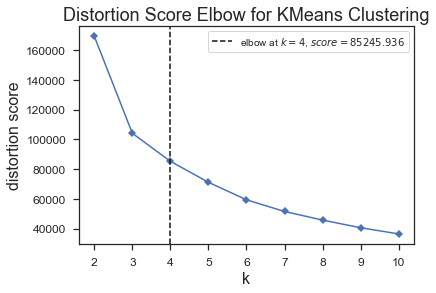

Avec init = k-means++ , n_init = 1 and random_state = 42


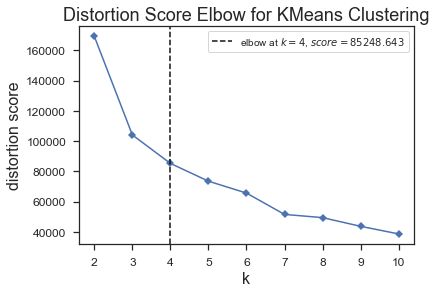

Avec init = k-means++ , n_init = 10 and random_state = 42


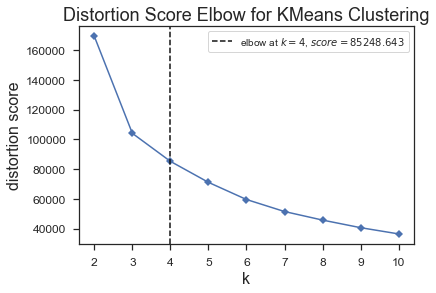

Avec init = k-means++ , n_init = 20 and random_state = 42


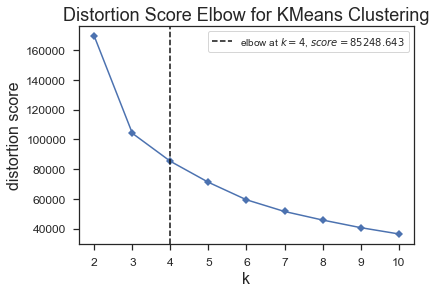

Avec init = random , n_init = 1 and random_state = 0


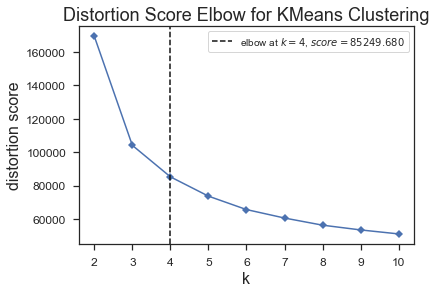

Avec init = random , n_init = 10 and random_state = 0


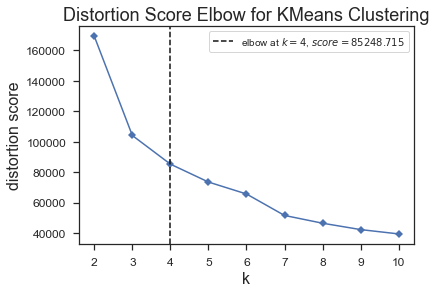

Avec init = random , n_init = 20 and random_state = 0


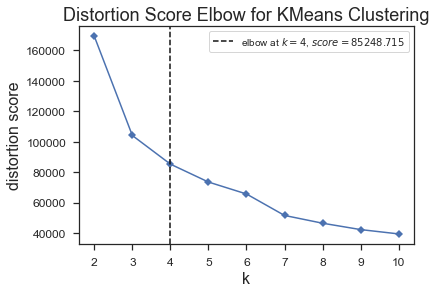

Avec init = random , n_init = 1 and random_state = 42


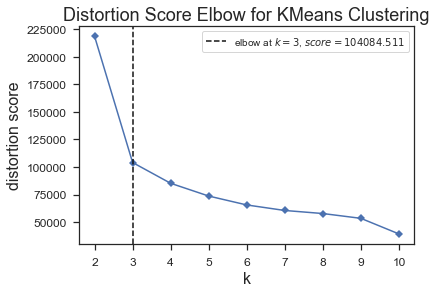

Avec init = random , n_init = 10 and random_state = 42


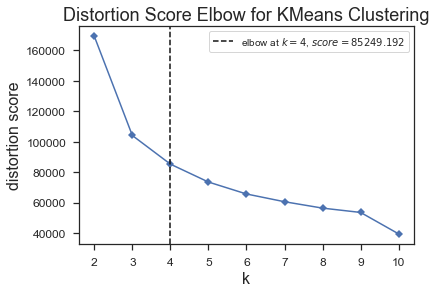

Avec init = random , n_init = 20 and random_state = 42


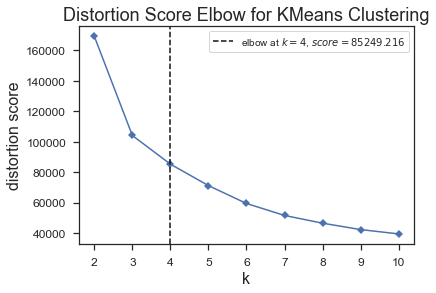

In [11]:
K_list1log = []

# Calcul du K-means pour déterminer les différentes métriques
for i in initialisation:
    for r in random_state:
        for n in nb_init:
            # Définition de l'algorithme utilisé
            model = KMeans(init=i, n_init=n, random_state=r)
            print("Avec init =", i,
                  ", n_init =", n,
                  "and random_state =", r)
            
            KMeans_visualizer = KElbowVisualizer(model,
                                                 K=(2, 15),
                                                 metric="distortion",
                                                 timings=False)
            KMeans_visualizer.fit(data_kmeans1_l_norm)
            KMeans_visualizer.show()
            K = KMeans_visualizer.elbow_value_
            K_list1log.append(K)

In [12]:
# Pour avoir une liste de valeur k contenant que des valeurs uniques
K_list1log = np.unique(K_list1log)
print("Nombre de cluster optimal trouvé:", K_list1log)

Nombre de cluster optimal trouvé: [3 4]


<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


### <div class="alert alert-block alert-info"><a name="C322">3.2.2. Détermination de certains paramètres de scoring avec le module 'metrics' de scikit-learn</a></div>

In [13]:
# Jeu de données pour rassembler les résultats des modèles
resultslog = pd.DataFrame(columns=["Init",
                                   "n_init",
                                   "Random_state",
                                   "Number of cluster",
                                   "Inertie",
                                   "Silhouette score",
                                   "Davies Bouldin score",
                                   "Cluster max sizes",
                                   "Cluster min sizes"])

In [14]:
for i in initialisation:
    for r in random_state:
        for n in nb_init:
            for k in K_list1log:
                model = KMeans(n_clusters=k, init=i, n_init=n, random_state=r)
                model.fit(data_kmeans1_l_norm)
                clusters = model.labels_
                labels, counts = np.unique(clusters, return_counts=True)
                inertia = model.inertia_

                silh = silhouette_score(data_kmeans1_l_norm, model.labels_)
                DB = davies_bouldin_score(data_kmeans1_l_norm, model.labels_)

                result_model = pd.DataFrame({"Init": [i],
                                             "n_init": [n],
                                             "Random_state": [r],
                                             "Number of cluster": [k],
                                             "Inertie": [inertia],
                                             "Silhouette score": [silh],
                                             "Davies Bouldin score": [DB],
                                             "Cluster max sizes": [counts.max()],
                                             "Cluster min sizes": [counts.min()]})
                resultslog = pd.concat([resultslog, result_model])

In [15]:
resultslog.reset_index(drop=True, inplace=True)

# Filtre pour garder que les clustering 
# avec des clusters comprenant plus de 500 clients
mask = resultslog["Cluster min sizes"] > 500
df_mask = resultslog[mask]

# Quel est le score de silhouette le plus proche de 1?
df_mask.loc[df_mask["Silhouette score"] == df_mask["Silhouette score"].max()]

Init n_init Random_state Number of cluster        Inertie  \
12  random      1            0                 3  104087.338614   

    Silhouette score  Davies Bouldin score Cluster max sizes Cluster min sizes  
12          0.418895              0.769889             53442              2913

Le score de silhouette le plus élevé a été obtenue pour un nombre de cluster est de 3. Pour la suite de l'exploration de ce clustering, je vais utiliser:
- init = random
- n_init = 1
- random_state = 0
- number of cluster = 3

In [16]:
model1log = KMeans(n_clusters=3, init="random", n_init=1, random_state=0)

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


### <div class="alert alert-block alert-info"><a name="C323">3.2.3. Coefficient de silhouette et distances interclusters</a></div>

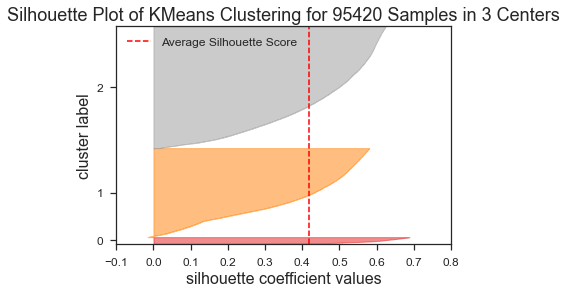

c:\Users\virgi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_mds.py:506: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


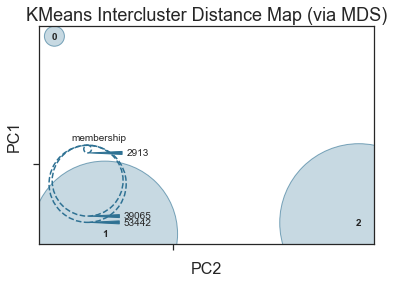

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [17]:
silhouette_visualizer = SilhouetteVisualizer(model1log)
silhouette_visualizer.fit(data_kmeans1_l_norm)
silhouette_visualizer.show()

intercluster_distance_visualizer = InterclusterDistance(model1log)
intercluster_distance_visualizer.fit(data_kmeans1_l_norm)
intercluster_distance_visualizer.show()

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


### <div class="alert alert-block alert-info"><a name="C324">3.2.4. Représentation graphique des différents clusters</a></div>

In [18]:
# Calcul de l'ACP
pca = PCA(n_components=2)
pca.fit(data_kmeans1_l_norm)
print(pca.explained_variance_ratio_.cumsum())
X_trans = pca.transform(data_kmeans1_l_norm)

# Calcul du T-SNE
tsne = TSNE(n_components=2, init="random", learning_rate=200)
T = tsne.fit_transform(data_kmeans1_l_norm)

[0.56436255 0.89725994]


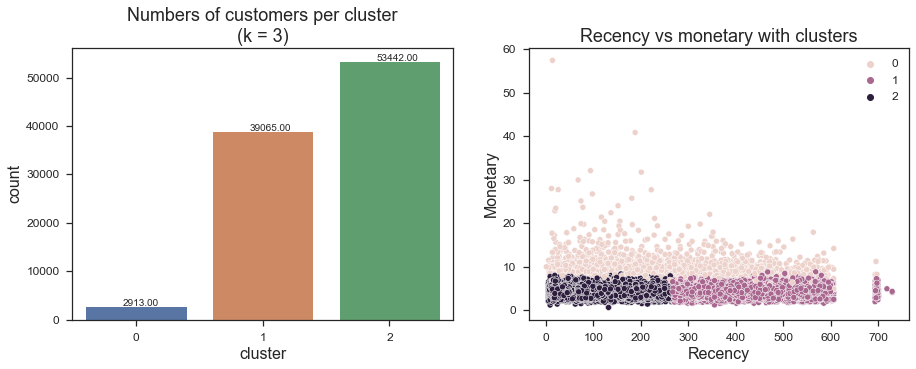

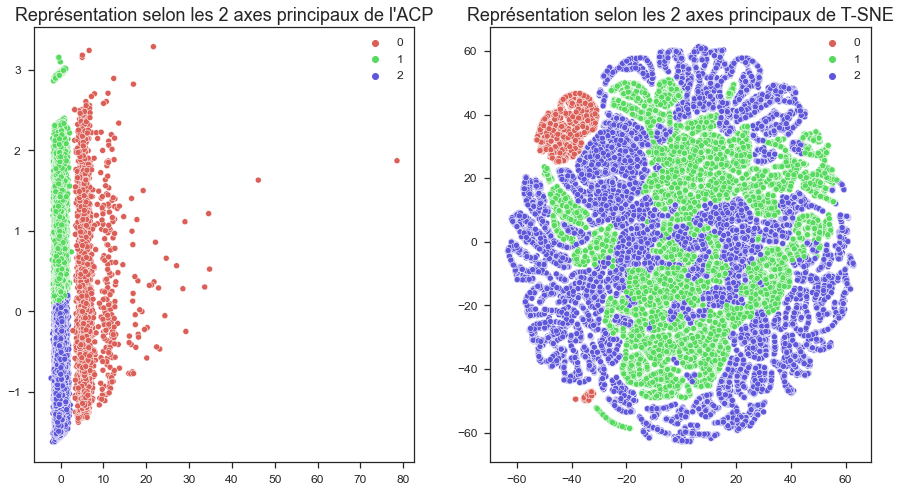

In [19]:
data_graph = data_kmeans1_log.copy()
k = 3

model1log.fit(data_kmeans1_l_norm)
kmeans_cat = model1log.predict(data_kmeans1_l_norm)
data_graph["cluster"] = kmeans_cat

# Représentation du nombre de clients par cluster
fig = plt.figure(figsize=(15, 5))
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.countplot(data=data_graph, x='cluster')
for p in ax1.patches:
    ax1.annotate("{:.2f}".format(p.get_height()),
                 (p.get_x() + 0.3,
                 p.get_height() + 1))
ax1.set_title("Numbers of customers per cluster""\n"
              "(k = {k})".format(k=k))

# Représentation de recency et monetary par cluster
ax2 = plt.subplot(1, 2, 2)
ax2 = sns.scatterplot(data=data_kmeans1_log,
                      x="recency",
                      y="monetary",
                      hue=kmeans_cat)
ax2.set_title("Recency vs monetary with clusters")
ax2.set_xlabel("Recency")
ax2.set_ylabel("Monetary")
plt.show()

# Représentation selon ACP
figb = plt.figure(figsize=(15, 8))
ax1b = plt.subplot(1, 2, 1)
ax1b = sns.scatterplot(x=X_trans[:, 0],
                       y=X_trans[:, 1],
                       hue=kmeans_cat,
                       legend='full',
                       palette=sns.color_palette("hls", k))
ax1b.set_title("Représentation selon les 2 axes principaux de l'ACP")

# Représentation selon T-SNE
ax2b = plt.subplot(1, 2, 2)
ax2b = sns.scatterplot(x=T[:, 0],
                       y=T[:, 1],
                       hue=kmeans_cat,
                       legend='full',
                       palette=sns.color_palette("hls", k))
ax2b.set_title("Représentation selon les 2 axes principaux de T-SNE")
plt.show()

Est-il possible d'affiner le clustering (obtenir plus de clusters) en ajoutant de nouvelles variables?

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

## <div class="alert alert-block alert-info"><a name="C33">3.3. Avec les variables de la RFM et mean_review_score</a></div>

### <div class="alert alert-block alert-info"><a name="C331">3.3.1. Préparation du jeu de données</a></div>

In [20]:
data_kmeans2 = data[["number_of_order",
                     "number_of_days_since_last_order",
                     "price",
                     "mean_review_score"]]
data_kmeans2.columns = ["frequency",
                        "recency",
                        "monetary",
                        "mean_review_score"]

# Suppression des valeurs manquantes
data_kmeans2 = data_kmeans2.dropna()
data_kmeans2.shape

(94721, 4)

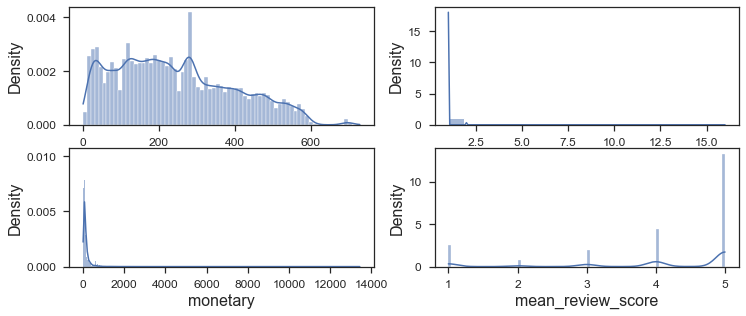

In [21]:
# Représentation graphique des distributions RFM
plt.figure(figsize=(12, 10))

# Pour la récence
ax1 = plt.subplot(4, 2, 1)
ax1 = sns.histplot(data_kmeans2["recency"], kde=True, stat="density")
# Pour la fréquency
ax2 = plt.subplot(4, 2, 2)
ax2 = sns.histplot(data_kmeans2["frequency"], kde=True, stat="density")
# Pour la valeur monétaire
ax3 = plt.subplot(4, 2, 3)
ax3 = sns.histplot(data_kmeans2["monetary"], kde=True, stat="density")
# Pour la valeur  mean review
ax4 = plt.subplot(4, 2, 4)
ax4 = sns.histplot(data_kmeans2["mean_review_score"], kde=True, stat="density")

plt.show()

In [22]:
colonne_standardisation = list(data_kmeans2.dtypes
                               [data_kmeans2.dtypes != object].index)
preprocessor = ColumnTransformer([("scaler", StandardScaler(),
                                   colonne_standardisation)])

data_kmeans2_norm = preprocessor.fit_transform(data_kmeans2)

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

### <div class="alert alert-block alert-info"><a name="C332">3.3.2. Détermination de la valeur de k optimale</a></div>

In [23]:
# Liste des hyperparamètres à tester
initialisation = ["k-means++", "random"]
nb_init = [1, 10, 20]
random_state = [0, 42]

Avec init = k-means++ , n_init = 1 and random_state = 0


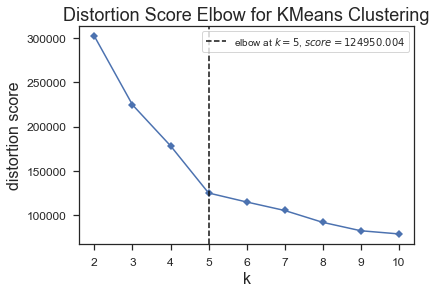

Avec init = k-means++ , n_init = 10 and random_state = 0


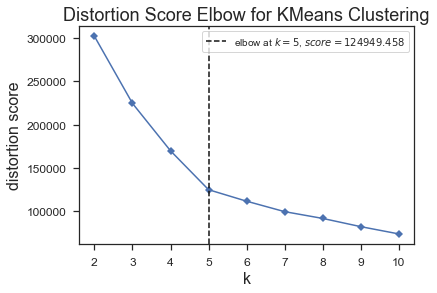

Avec init = k-means++ , n_init = 20 and random_state = 0


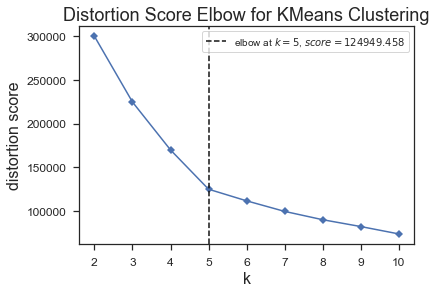

Avec init = k-means++ , n_init = 1 and random_state = 42


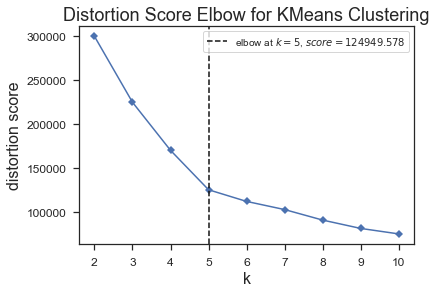

Avec init = k-means++ , n_init = 10 and random_state = 42


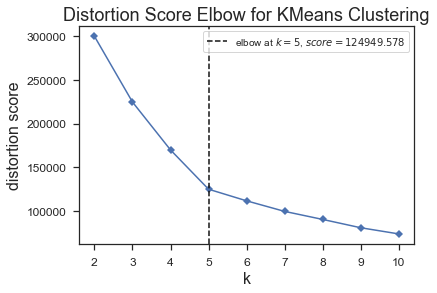

Avec init = k-means++ , n_init = 20 and random_state = 42


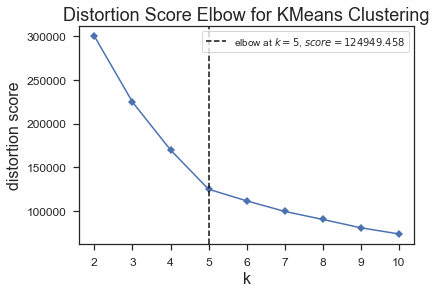

Avec init = random , n_init = 1 and random_state = 0


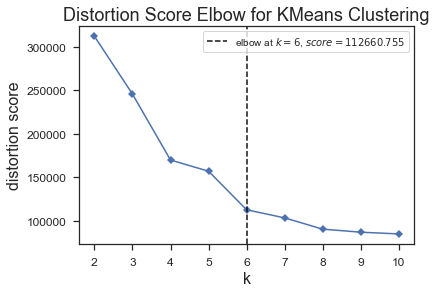

Avec init = random , n_init = 10 and random_state = 0


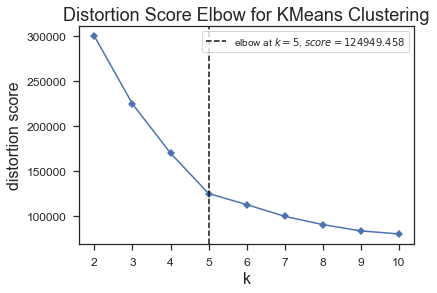

Avec init = random , n_init = 20 and random_state = 0


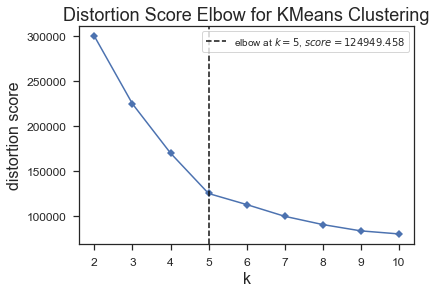

Avec init = random , n_init = 1 and random_state = 42


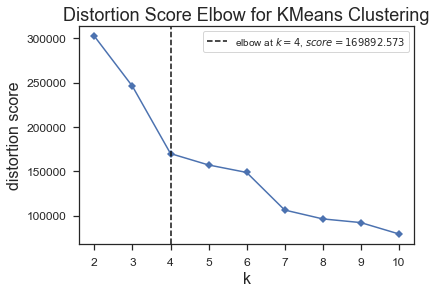

Avec init = random , n_init = 10 and random_state = 42


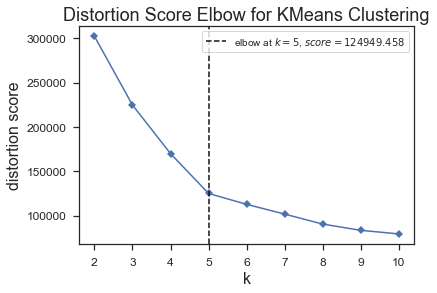

Avec init = random , n_init = 20 and random_state = 42


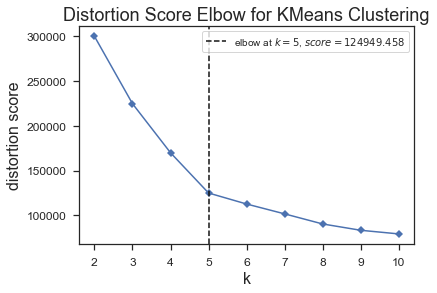

In [24]:
K_list2 = []

# Calcul du K-means
for i in initialisation:
    for r in random_state:
        for n in nb_init:
            # Définition de l'algorithme utilisé
            model = KMeans(init=i, n_init=n, random_state=r)
            print("Avec init =", i,
                  ", n_init =", n,
                  "and random_state =", r)
            
            KMeans_visualizer = KElbowVisualizer(model,
                                                 K=(2, 15),
                                                 metric="distortion",
                                                 timings=False)
            KMeans_visualizer.fit(data_kmeans2_norm)
            KMeans_visualizer.show()
            K = KMeans_visualizer.elbow_value_
            K_list2.append(K)

In [25]:
# Pour avoir une liste de valeur k contenant que des valeurs uniques
K_list2 = np.unique(K_list2)
print("Nombre de cluster optimal trouvé:", K_list2)

Nombre de cluster optimal trouvé: [4 5 6]


<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


### <div class="alert alert-block alert-info"><a name="C333">3.3.3. Détermination de certains paramètres de scoring avec le module 'metrics' de scikit-learn</a></div>

In [26]:
# Jeu de données pour rassembler les résultats des modèles
results2 = pd.DataFrame(columns=["Init",
                                 "n_init",
                                 "Random_state",
                                 "Number of cluster",
                                 "Inertie",
                                 "Silhouette score",
                                 "Davies Bouldin score",
                                 "Cluster max sizes",
                                 "Cluster min sizes"])

In [27]:
for i in initialisation:
    for r in random_state:
        for n in nb_init:
            for k in K_list2:
                model = KMeans(n_clusters=k, init=i, n_init=n, random_state=r)
                model.fit(data_kmeans2_norm)
                clusters = model.labels_
                labels, counts = np.unique(clusters, return_counts=True)
                inertia = model.inertia_

                silh = silhouette_score(data_kmeans2_norm, model.labels_)
                DB = davies_bouldin_score(data_kmeans2_norm, model.labels_)

                result_model = pd.DataFrame({"Init": [i],
                                             "n_init": [n],
                                             "Random_state": [r],
                                             "Number of cluster": [k],
                                             "Inertie": [inertia],
                                             "Silhouette score": [silh],
                                             "Davies Bouldin score": [DB],
                                             "Cluster max sizes": [counts.max()],
                                             "Cluster min sizes": [counts.min()]})
                results2 = pd.concat([results2, result_model])

In [28]:
results2.reset_index(drop=True, inplace=True)

# Filtre pour garder que les clustering 
# avec des clusters comprenant plus de 500 clients
mask = results2["Cluster min sizes"] > 500
df_mask = results2[mask]

# Quel est le score de silhouette le plus proche de 1?
df_mask.loc[df_mask["Silhouette score"] == df_mask["Silhouette score"].max()]

Init n_init Random_state Number of cluster        Inertie  \
0  k-means++      1            0                 4  178332.397908   

   Silhouette score  Davies Bouldin score Cluster max sizes Cluster min sizes  
0           0.43036              0.875036             69456              2211

Le score de silhouette le plus elevé a été obtenue pour un nombre de cluster est de 4. Pour la suite de l'exploration de ce clustering, je vais utiliser:
- init = k-means++
- n_init = 1
- random_state = 0
- number of cluster = 4

In [29]:
model2 = KMeans(n_clusters=4, init="k-means++", n_init=1, random_state=0)

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


### <div class="alert alert-block alert-info"><a name="C334">3.3.4. Coefficient de silhouette et distances interclusters</a></div>

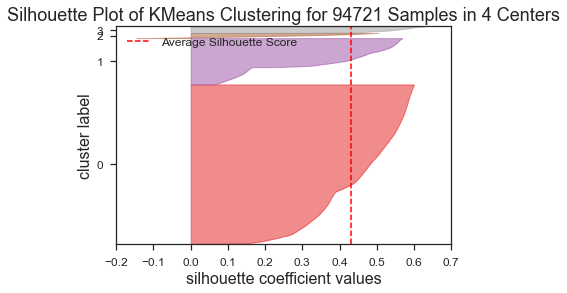

c:\Users\virgi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_mds.py:506: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn(


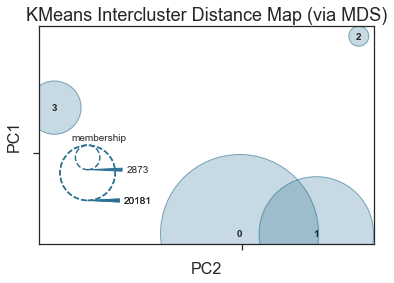

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [30]:
silhouette_visualizer = SilhouetteVisualizer(model2)
silhouette_visualizer.fit(data_kmeans2_norm)
silhouette_visualizer.show()

intercluster_distance_visualizer = InterclusterDistance(model2)
intercluster_distance_visualizer.fit(data_kmeans2_norm)
intercluster_distance_visualizer.show()

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


### <div class="alert alert-block alert-info"><a name="C335">3.3.5. Représentations graphiques des clusters</a></div>

In [31]:
# Calcul de l'ACP
pca = PCA(n_components=2)
pca.fit(data_kmeans2_norm)
print(pca.explained_variance_ratio_.cumsum())
X_trans = pca.transform(data_kmeans2_norm)

# Calcul du T-SNE
tsne = TSNE(n_components=2, init="random", learning_rate=200)
T = tsne.fit_transform(data_kmeans2_norm)

[0.27804951 0.53503528]


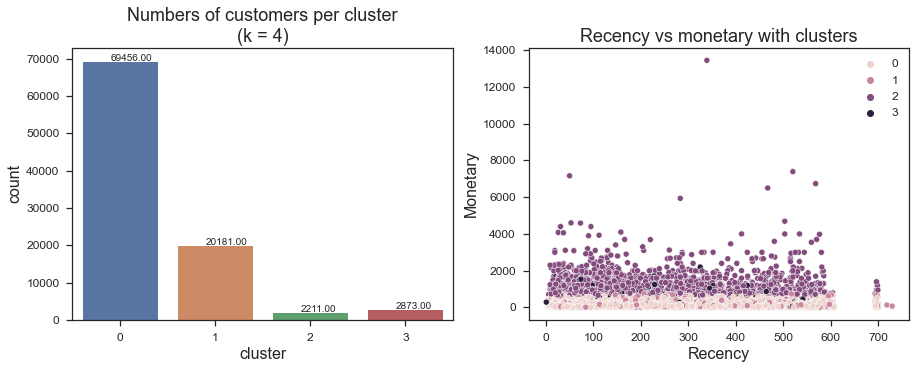

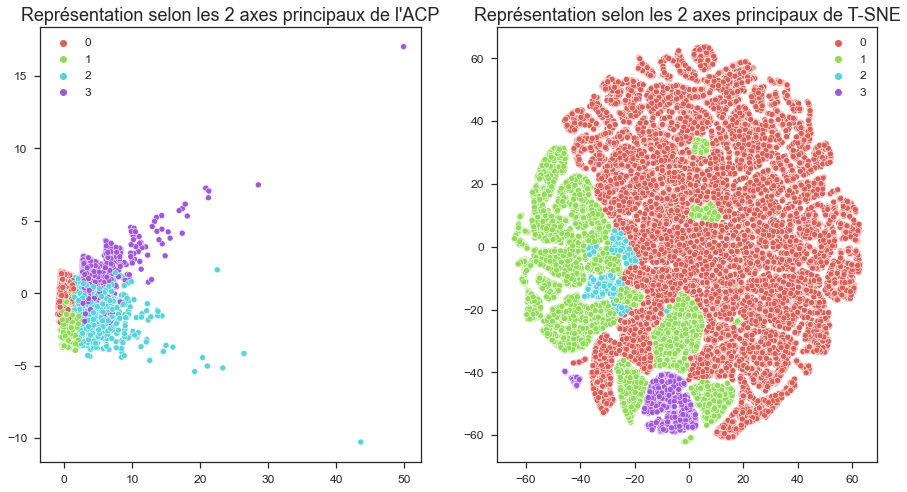

In [32]:
data_graph = data_kmeans2.copy()
k = 4

model2.fit(data_kmeans2_norm)
kmeans_cat = model2.predict(data_kmeans2_norm)
data_graph["cluster"] = kmeans_cat

# Représentation du nombre de clients par cluster
fig = plt.figure(figsize=(15, 5))
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.countplot(data=data_graph, x='cluster')
for p in ax1.patches:
    ax1.annotate("{:.2f}".format(p.get_height()),
                 (p.get_x() + 0.3,
                 p.get_height() + 1))
ax1.set_title("Numbers of customers per cluster""\n"
              "(k = {k})".format(k=k))

# Représentation de recency et monetary par cluster
ax2 = plt.subplot(1, 2, 2)
ax2 = sns.scatterplot(data=data_kmeans2,
                      x="recency",
                      y="monetary",
                      hue=kmeans_cat)
ax2.set_title("Recency vs monetary with clusters")
ax2.set_xlabel("Recency")
ax2.set_ylabel("Monetary")
plt.show()

# Représentation selon ACP
figb = plt.figure(figsize=(15, 8))
ax1b = plt.subplot(1, 2, 1)
ax1b = sns.scatterplot(x=X_trans[:, 0],
                       y=X_trans[:, 1],
                       hue=kmeans_cat,
                       legend='full',
                       palette=sns.color_palette("hls", k))
ax1b.set_title("Représentation selon les 2 axes principaux de l'ACP")

# Représentation selon T-SNE
ax2b = plt.subplot(1, 2, 2)
ax2b = sns.scatterplot(x=T[:, 0],
                       y=T[:, 1],
                       hue=kmeans_cat,
                       legend='full',
                       palette=sns.color_palette("hls", k))
ax2b.set_title("Représentation selon les 2 axes principaux de T-SNE")
plt.show()

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

## <div class="alert alert-block alert-info"><a name="C34">3.4. Avec les variables de la RFM et autres variables</a></div>

### <div class="alert alert-block alert-info"><a name="C341">3.4.1. Préparation du jeu de données</a></div>

In [33]:
data_kmeans4 = data[["number_of_order",
                     "number_of_days_since_last_order",
                     "price",
                     "mean_review_score",
                     "number_of_items",
                     "mean_delivery_delay",
                     "freight_value",
                     "number_of_payment_type",
                     "number_of_category",
                     "number_of_review",
                     "mean_payment_value",
                     "mean_freight_ratio",
                     "number_of_payment_sequantial",
                     "mean_payment_installments"]]


# Suppression des valeurs manquantes
data_kmeans4 = data_kmeans4.dropna()
data_kmeans4.shape

(94720, 14)

In [34]:
col_norm = list(data_kmeans4.dtypes[data_kmeans4.dtypes != object].index)
preprocessor = ColumnTransformer([("scaler", StandardScaler(), col_norm)])

data_kmeans4_norm = preprocessor.fit_transform(data_kmeans4)

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


### <div class="alert alert-block alert-info"><a name="C342">3.4.2. Détermination de la valeur de k optimale</a></div>

In [35]:
# Liste des hyperparamètres à tester
initialisation = ["k-means++", "random"]
nb_init = [1, 10, 20]
random_state = [0, 42]

Avec init = k-means++ , n_init = 1 and random_state = 0


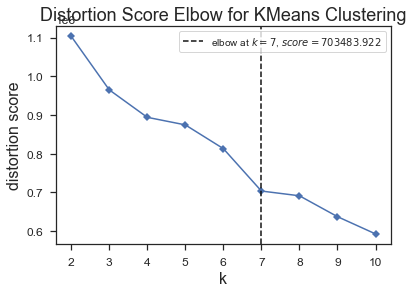

Avec init = k-means++ , n_init = 10 and random_state = 0


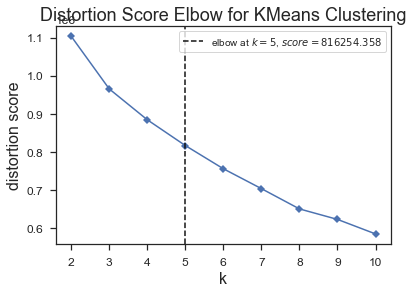

Avec init = k-means++ , n_init = 20 and random_state = 0


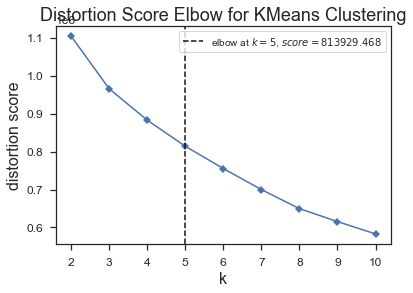

Avec init = k-means++ , n_init = 1 and random_state = 42


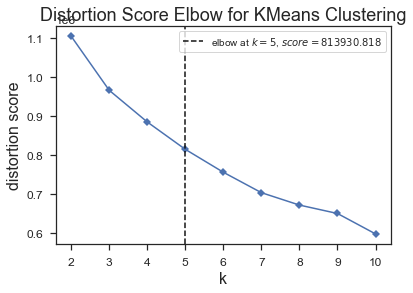

Avec init = k-means++ , n_init = 10 and random_state = 42


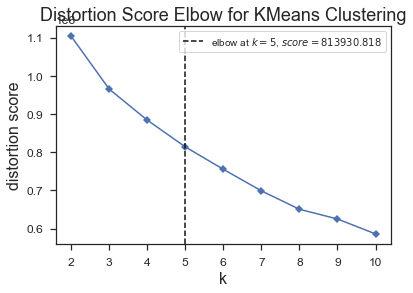

Avec init = k-means++ , n_init = 20 and random_state = 42


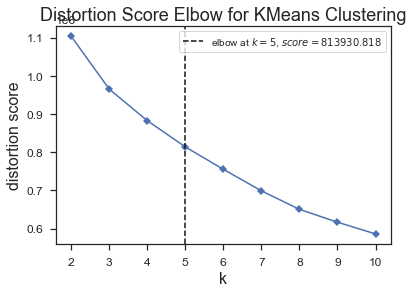

Avec init = random , n_init = 1 and random_state = 0


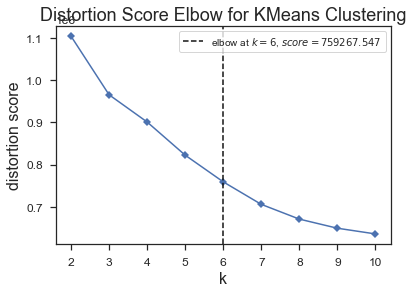

Avec init = random , n_init = 10 and random_state = 0


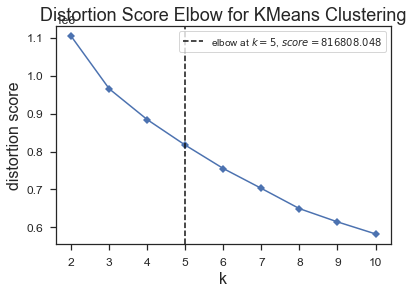

Avec init = random , n_init = 20 and random_state = 0


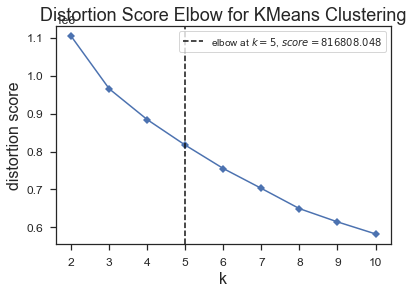

Avec init = random , n_init = 1 and random_state = 42


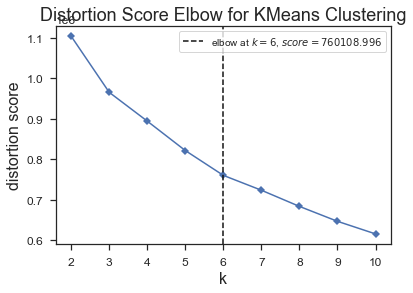

Avec init = random , n_init = 10 and random_state = 42


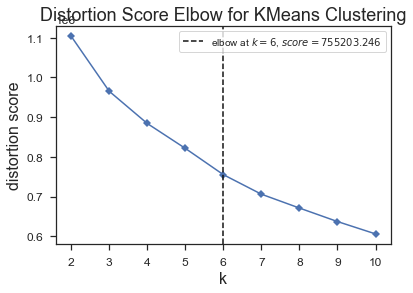

Avec init = random , n_init = 20 and random_state = 42


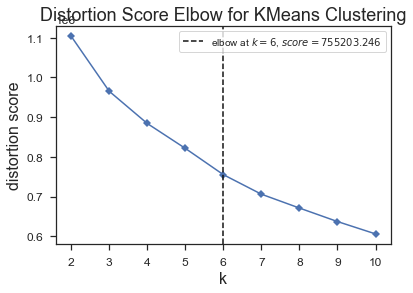

In [36]:
K_list4 = []

# Calcul du K-means
for i in initialisation:
    for r in random_state:
        for n in nb_init:
            # Définition de l'algorithme utilisé
            model = KMeans(init=i, n_init=n, random_state=r)
            print("Avec init =", i,
                  ", n_init =", n,
                  "and random_state =", r)
            
            KMeans_visualizer = KElbowVisualizer(model,
                                                 K=(2, 15),
                                                 metric="distortion",
                                                 timings=False)
            KMeans_visualizer.fit(data_kmeans4_norm)
            KMeans_visualizer.show()
            K = KMeans_visualizer.elbow_value_
            K_list4.append(K)

In [37]:
# Pour avoir une liste de valeur k contenant que des valeurs uniques
K_list4 = np.unique(K_list4)
print("Nombre de cluster optimal trouvé:", K_list4)

Nombre de cluster optimal trouvé: [5 6 7]


<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

### <div class="alert alert-block alert-info"><a name="C343">3.4.3. Détermination de certains paramètres de scoring avec le module 'metrics' de scikit-learn</a></div>

In [38]:
# Jeu de données pour rassembler les résultats des modèles
results4 = pd.DataFrame(columns=["Init",
                                 "n_init",
                                 "Random_state",
                                 "Number of cluster",
                                 "Inertie",
                                 "Silhouette score",
                                 "Davies Bouldin score",
                                 "Cluster max sizes",
                                 "Cluster min sizes"])

In [39]:
for i in initialisation:
    for r in random_state:
        for n in nb_init:
            for k in K_list4:
                model = KMeans(n_clusters=k, init=i, n_init=n, random_state=r)
                model.fit(data_kmeans4_norm)
                clusters = model.labels_
                labels, counts = np.unique(clusters, return_counts=True)
                inertia = model.inertia_

                silh = silhouette_score(data_kmeans4_norm, model.labels_)
                DB = davies_bouldin_score(data_kmeans4_norm, model.labels_)

                result_model = pd.DataFrame({"Init": [i],
                                             "n_init": [n],
                                             "Random_state": [r],
                                             "Number of cluster": [k],
                                             "Inertie": [inertia],
                                             "Silhouette score": [silh],
                                             "Davies Bouldin score": [DB],
                                             "Cluster max sizes": [counts.max()],
                                             "Cluster min sizes": [counts.min()]})
                results4 = pd.concat([results4, result_model])

In [40]:
results4.reset_index(drop=True, inplace=True)

# Filtre pour garder que les clustering 
# avec des clusters comprenant plus de 500 clients
mask = results4["Cluster min sizes"] > 500
df_mask = results4[mask]

# Quel est le score de silhouette le plus proche de 1?
df_mask.loc[df_mask["Silhouette score"] == df_mask["Silhouette score"].max()]

Init n_init Random_state Number of cluster        Inertie  \
6  k-means++     20            0                 5  813929.485547   

   Silhouette score  Davies Bouldin score Cluster max sizes Cluster min sizes  
6          0.207695              1.464522             64615              1664

Le score de silhouette le plus élevé a été obtenue pour un nombre de cluster est de 5. Pour la suite de l'exploration de ce clustering, je vais utiliser:
- init = k-means++
- n_init = 20
- random_state = 0
- number of cluster = 5

In [41]:
model4 = KMeans(n_clusters=5, init="k-means++", n_init=20, random_state=0)

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


### <div class="alert alert-block alert-info"><a name="C344">3.4.4. Coefficient de silhouette et distances interclusters</a></div>

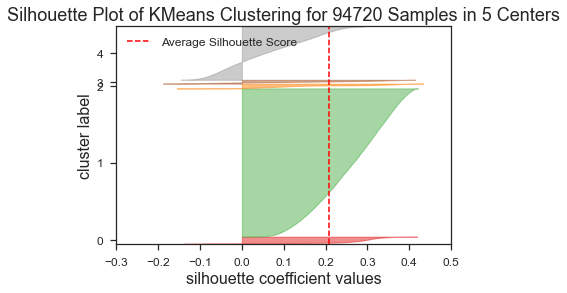

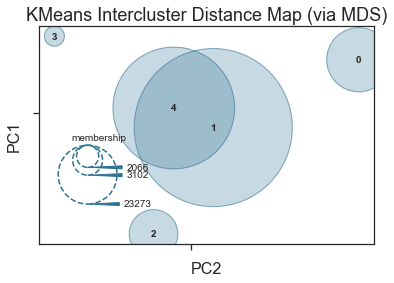

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [42]:
silhouette_visualizer = SilhouetteVisualizer(model4)
silhouette_visualizer.fit(data_kmeans4_norm)
silhouette_visualizer.show()

intercluster_distance_visualizer = InterclusterDistance(model4)
intercluster_distance_visualizer.fit(data_kmeans4_norm)
intercluster_distance_visualizer.show()

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


### <div class="alert alert-block alert-info"><a name="C345">3.4.5. Rerpésentations graphiques des différents clusters</a></div>

In [43]:
# Calcul de l'ACP
pca = PCA(n_components=2)
pca.fit(data_kmeans4_norm)
print(pca.explained_variance_ratio_.cumsum())
X_trans = pca.transform(data_kmeans4_norm)

# Calcul du T-SNE
tsne = TSNE(n_components=2, init="random", learning_rate=200)
T = tsne.fit_transform(data_kmeans4_norm)

[0.24649233 0.43451998]


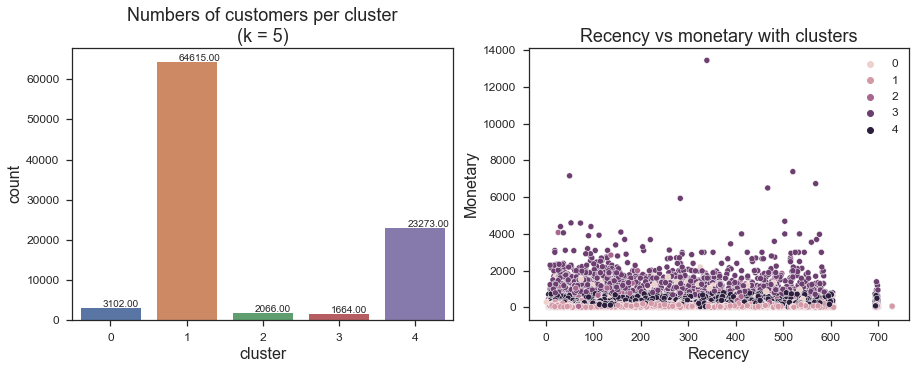

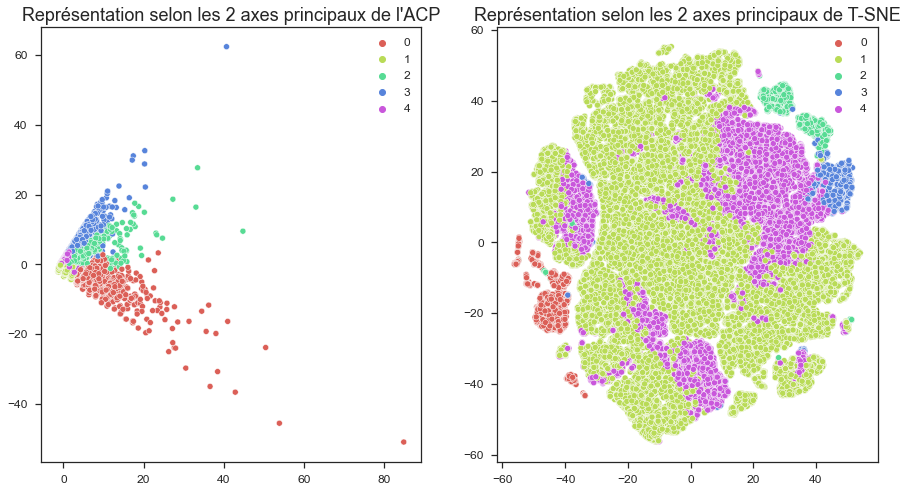

In [44]:
data_graph = data_kmeans4.copy()
k = 5

model4.fit(data_kmeans4_norm)
kmeans_cat = model4.predict(data_kmeans4_norm)
data_graph["cluster"] = kmeans_cat

# Représentation du nombre de clients par cluster
fig = plt.figure(figsize=(15, 5))
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.countplot(data=data_graph, x='cluster')
for p in ax1.patches:
    ax1.annotate("{:.2f}".format(p.get_height()),
                 (p.get_x() + 0.3,
                 p.get_height() + 1))
ax1.set_title("Numbers of customers per cluster""\n"
              "(k = {k})".format(k=k))

# Représentation de recency et monetary par cluster
ax2 = plt.subplot(1, 2, 2)
ax2 = sns.scatterplot(data=data_kmeans4,
                      x="number_of_days_since_last_order",
                      y="price",
                      hue=kmeans_cat)
ax2.set_title("Recency vs monetary with clusters")
ax2.set_xlabel("Recency")
ax2.set_ylabel("Monetary")
plt.show()

# Représentation selon ACP
figb = plt.figure(figsize=(15, 8))
ax1b = plt.subplot(1, 2, 1)
ax1b = sns.scatterplot(x=X_trans[:, 0],
                       y=X_trans[:, 1],
                       hue=kmeans_cat,
                       legend='full',
                       palette=sns.color_palette("hls", k))
ax1b.set_title("Représentation selon les 2 axes principaux de l'ACP")

# Représentation selon T-SNE
ax2b = plt.subplot(1, 2, 2)
ax2b = sns.scatterplot(x=T[:, 0],
                       y=T[:, 1],
                       hue=kmeans_cat,
                       legend='full',
                       palette=sns.color_palette("hls", k))
ax2b.set_title("Représentation selon les 2 axes principaux de T-SNE")
plt.show()

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

## <div class="alert alert-block alert-info"><a name="C35">3.5. Avec les variables de la RFM et autres variables (Valeurs monétaires en échelle logarithmique)</a></div>

### <div class="alert alert-block alert-info"><a name="C351">3.5.1. Préparation du jeu de données</a></div>

In [14]:
data_kmeans4l = data[["number_of_order",
                      "number_of_days_since_last_order",
                      "price_log",
                      "mean_review_score",
                      "number_of_items",
                      "mean_delivery_delay",
                      "freight_value_log",
                      "number_of_payment_type",
                      "number_of_category",
                      "number_of_review",
                      "mean_payment_log",
                      "mean_freight_ratio",
                      "number_of_payment_sequantial",
                      "mean_payment_installments"]]


# Suppression des valeurs manquantes
data_kmeans4l = data_kmeans4l.dropna()
data_kmeans4l.shape

(94720, 14)

In [15]:
col_norm = list(data_kmeans4l.dtypes[data_kmeans4l.dtypes != object].index)
preprocessor = ColumnTransformer([("scaler", StandardScaler(), col_norm)])

data_kmeans4l_norm = preprocessor.fit_transform(data_kmeans4l)

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


### <div class="alert alert-block alert-info"><a name="C352">3.5.2. Détermination de la valeur de k optimale</a></div>

In [16]:
# Liste des hyperparamètres à tester
initialisation = ["k-means++", "random"]
nb_init = [1, 10, 20]
random_state = [0, 42]

Avec init = k-means++ , n_init = 1 and random_state = 0


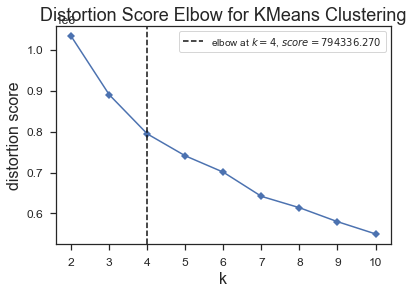

Avec init = k-means++ , n_init = 10 and random_state = 0


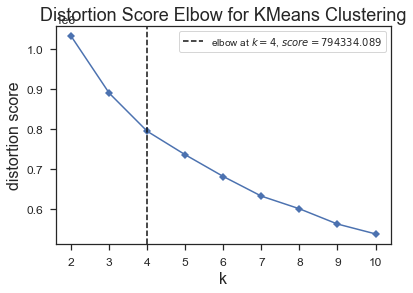

Avec init = k-means++ , n_init = 20 and random_state = 0


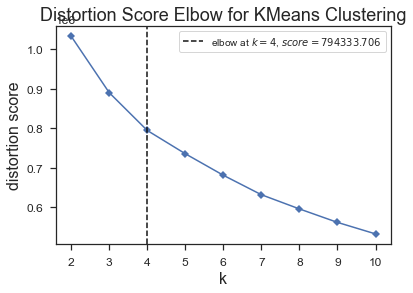

Avec init = k-means++ , n_init = 1 and random_state = 42


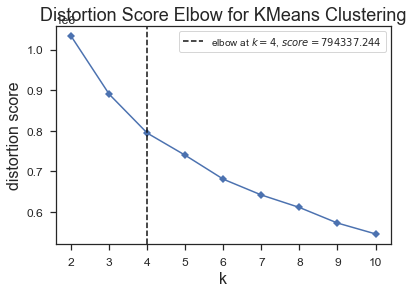

Avec init = k-means++ , n_init = 10 and random_state = 42


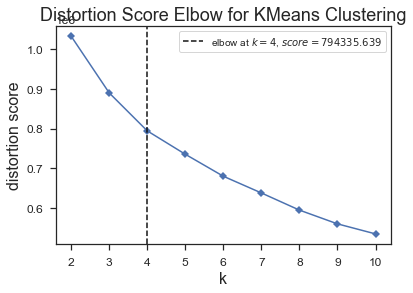

Avec init = k-means++ , n_init = 20 and random_state = 42


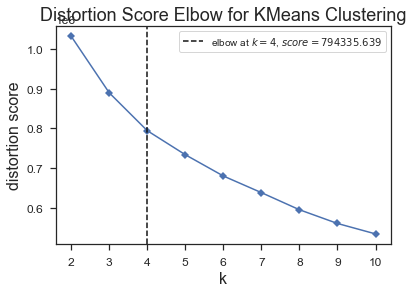

Avec init = random , n_init = 1 and random_state = 0


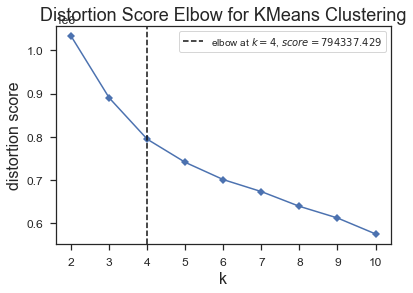

Avec init = random , n_init = 10 and random_state = 0


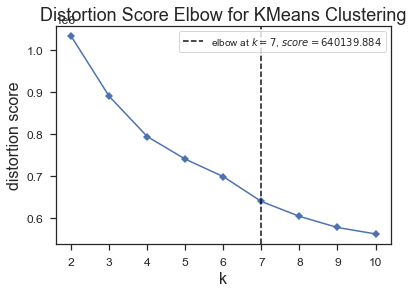

Avec init = random , n_init = 20 and random_state = 0


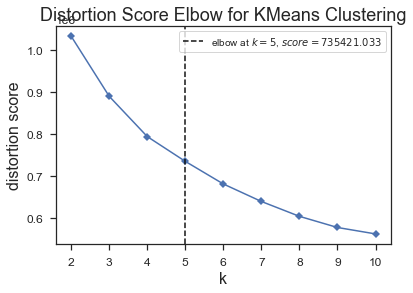

Avec init = random , n_init = 1 and random_state = 42


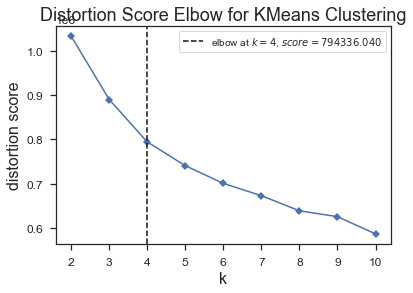

Avec init = random , n_init = 10 and random_state = 42


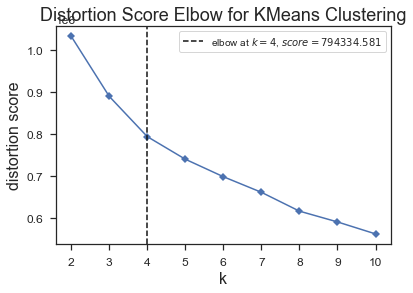

Avec init = random , n_init = 20 and random_state = 42


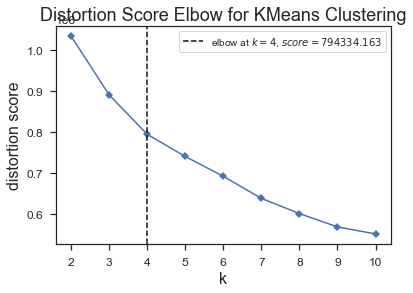

In [17]:
K_list4l = []

# Calcul du K-means
for i in initialisation:
    for r in random_state:
        for n in nb_init:
            # Définition de l'algorithme utilisé
            model = KMeans(init=i, n_init=n, random_state=r)
            print("Avec init =", i,
                  ", n_init =", n,
                  "and random_state =", r)
            
            KMeans_visualizer = KElbowVisualizer(model,
                                                 K=(2, 15),
                                                 metric="distortion",
                                                 timings=False)
            KMeans_visualizer.fit(data_kmeans4l_norm)
            KMeans_visualizer.show()
            K = KMeans_visualizer.elbow_value_
            K_list4l.append(K)

In [18]:
# Pour avoir une liste de valeur k contenant que des valeurs uniques
K_list4l = np.unique(K_list4l)
print("Nombre de cluster optimal trouvé:", K_list4l)

Nombre de cluster optimal trouvé: [4 5 7]


<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

### <div class="alert alert-block alert-info"><a name="C353">3.5.3. Détermination de certains paramètres de scoring avec le module 'metrics' de scikit-learn</a></div>

In [48]:
# Jeu de données pour rassembler les résultats des modèles
results4l = pd.DataFrame(columns=["Init",
                                  "n_init",
                                  "Random_state",
                                  "Number of cluster",
                                  "Inertie",
                                  "Silhouette score",
                                  "Davies Bouldin score",
                                  "Cluster max sizes",
                                  "Cluster min sizes"])
                                  
df_cluster = data_kmeans4l_norm.copy()


In [49]:
for i in initialisation:
    for r in random_state:
        for n in nb_init:
            for k in K_list4l:
                model = KMeans(n_clusters=k, init=i, n_init=n, random_state=r)
                model.fit(data_kmeans4l_norm)
                clusters = model.labels_
                labels, counts = np.unique(clusters, return_counts=True)
                inertia = model.inertia_

                silh = silhouette_score(data_kmeans4l_norm, model.labels_)
                DB = davies_bouldin_score(data_kmeans4l_norm, model.labels_)

                result_model = pd.DataFrame({"Init": [i],
                                             "n_init": [n],
                                             "Random_state": [r],
                                             "Number of cluster": [k],
                                             "Inertie": [inertia],
                                             "Silhouette score": [silh],
                                             "Davies Bouldin score": [DB],
                                             "Cluster max sizes": [counts.max()],
                                             "Cluster min sizes": [counts.min()]})
                results4l = pd.concat([results4l, result_model])

In [54]:
results4l.reset_index(drop=True, inplace=True)

# Filtre pour garder que les clustering 
# avec des clusters comprenant plus de 500 clients
mask = results4l["Cluster min sizes"] > 500
df_mask = results4l[mask]

# Quel est le score de silhouette le plus proche de 1?
df_mask.loc[df_mask["Silhouette score"] == df_mask["Silhouette score"].max()]

L'observation de ces resultats permet de voir que les hyperparamètres les plus otpimums sont:
- number of cluster = 4
- init = k-means++
- n_init = 10
- random_state = 42


In [56]:
model4l = KMeans(n_clusters=4, init="k-means++", n_init=10, random_state=42)

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


### <div class="alert alert-block alert-info"><a name="C354">3.5.4. Coefficient de silhouette et distances interclusters</a></div>

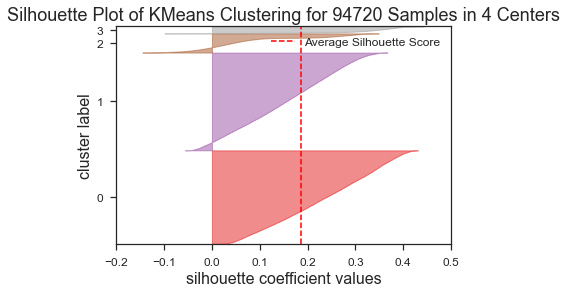

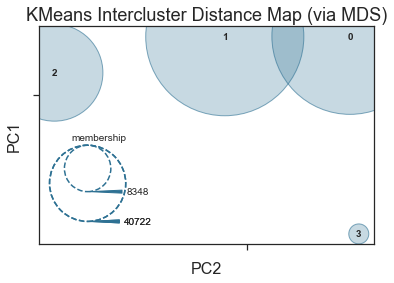

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [57]:
silhouette_visualizer = SilhouetteVisualizer(model4l)
silhouette_visualizer.fit(data_kmeans4l_norm)
silhouette_visualizer.show()

intercluster_distance_visualizer = InterclusterDistance(model4l)
intercluster_distance_visualizer.fit(data_kmeans4l_norm)
intercluster_distance_visualizer.show()

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


### <div class="alert alert-block alert-info"><a name="C355">3.5.5. Rerpésentations graphiques des différents clusters</a></div>

In [58]:
# Calcul de l'ACP
pca = PCA(n_components=2)
pca.fit(data_kmeans4l_norm)
print(pca.explained_variance_ratio_.cumsum())
X_trans = pca.transform(data_kmeans4l_norm)

# Calcul du T-SNE
tsne = TSNE(n_components=2, init="random", learning_rate=200)
T = tsne.fit_transform(data_kmeans4l_norm)

[0.31551071 0.47937525]


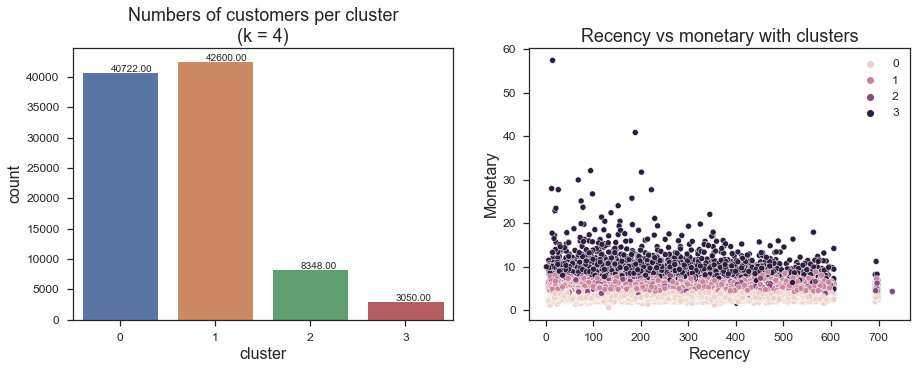

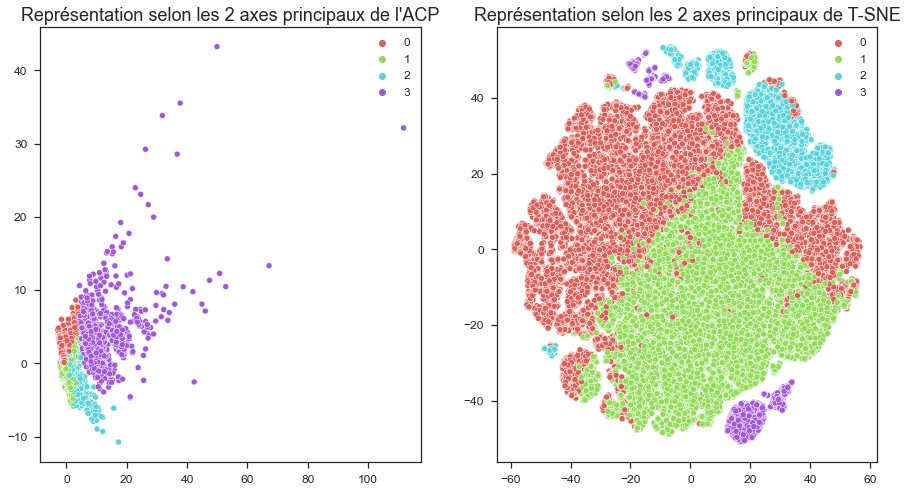

In [59]:
data_graph = data_kmeans4l.copy()
k = 4

model4l.fit(data_kmeans4l_norm)
kmeans_cat = model4l.predict(data_kmeans4l_norm)
data_graph["cluster"] = kmeans_cat

# Représentation du nombre de clients par cluster
fig = plt.figure(figsize=(15, 5))
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.countplot(data=data_graph, x='cluster')
for p in ax1.patches:
    ax1.annotate("{:.2f}".format(p.get_height()),
                 (p.get_x() + 0.3,
                 p.get_height() + 1))
ax1.set_title("Numbers of customers per cluster""\n"
              "(k = {k})".format(k=k))

# Représentation de recency et monetary par cluster
ax2 = plt.subplot(1, 2, 2)
ax2 = sns.scatterplot(data=data_kmeans4l,
                      x="number_of_days_since_last_order",
                      y="price_log",
                      hue=kmeans_cat)
ax2.set_title("Recency vs monetary with clusters")
ax2.set_xlabel("Recency")
ax2.set_ylabel("Monetary")
plt.show()

# Représentation selon ACP
figb = plt.figure(figsize=(15, 8))
ax1b = plt.subplot(1, 2, 1)
ax1b = sns.scatterplot(x=X_trans[:, 0],
                       y=X_trans[:, 1],
                       hue=kmeans_cat,
                       legend='full',
                       palette=sns.color_palette("hls", k))
ax1b.set_title("Représentation selon les 2 axes principaux de l'ACP")

# Représentation selon T-SNE
ax2b = plt.subplot(1, 2, 2)
ax2b = sns.scatterplot(x=T[:, 0],
                       y=T[:, 1],
                       hue=kmeans_cat,
                       legend='full',
                       palette=sns.color_palette("hls", k))
ax2b.set_title("Représentation selon les 2 axes principaux de T-SNE")
plt.show()

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

## <div class="alert alert-block alert-info"><a name="C36">3.6. Avec les variables de la RFM et autres variables après réduction dimensionnelle</a></div>

### <div class="alert alert-block alert-info"><a name="C361">3.6.1. Préparation du jeu de données</a></div>

In [45]:
data_kmeans5 = data[["number_of_order",
                     "number_of_days_since_last_order",
                     "price",
                     "mean_review_score",
                     "number_of_items",
                     "mean_delivery_delay",
                     "freight_value",
                     "number_of_payment_type",
                     "number_of_category",
                     "number_of_review",
                     "mean_payment_value",
                     "mean_freight_ratio",
                     "number_of_payment_sequantial",
                     "mean_payment_installments"]]


# Suppression des valeurs manquantes
data_kmeans5 = data_kmeans5.dropna()
data_kmeans5.shape

(94720, 14)

In [46]:
pca = Pipeline([("preprocessor", StandardScaler()),
                ("PCA", PCA(svd_solver="full"))])
pca.fit(data_kmeans5)
X_projected = pca.transform(data_kmeans5)

Eboulis des valeurs propres

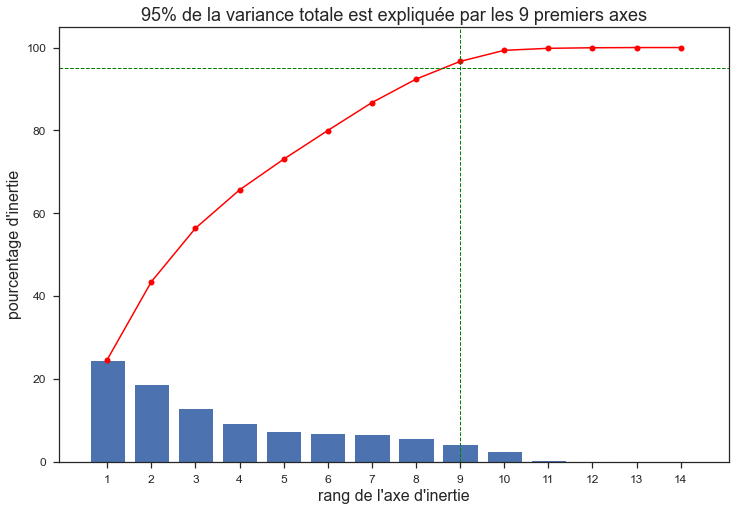

In [47]:
# Explained variance
varexpl = pca.named_steps['PCA'].explained_variance_ratio_*100

# Plot of cumulated variance
plt.figure(figsize=(12, 8))
plt.bar(np.arange(len(varexpl)) + 1, varexpl)

cumSumVar = varexpl.cumsum()
plt.plot(np.arange(len(varexpl)) + 1,
         cumSumVar,
         c="red",
         marker='o')
plt.axhline(y=95,
            linestyle="--",
            color="green",
            linewidth=1)

limit = 95
valid_idx = np.where(cumSumVar >= limit)[0]
min_plans = valid_idx[cumSumVar[valid_idx].argmin()]+1
plt.axvline(x=min_plans,
            linestyle="--",
            color="green",
            linewidth=1)

plt.xlabel("rang de l'axe d'inertie")
plt.xticks(np.arange(len(varexpl))+1)
plt.ylabel("pourcentage d'inertie")
plt.title("{}% de la variance totale est expliquée"
          " par les {} premiers axes".format(limit,
                                             min_plans))
plt.show(block=False)

**Cercle des corrélations**

In [48]:
def cerle_corr(pcs,
               n_comp,
               pca,
               axis_ranks,
               labels=None,
               label_rotation=0):

    fig = plt.figure(figsize=(20, n_comp * 5))
    count = 1
    for d1, d2 in axis_ranks:
        if d2 < n_comp:

            # initialisation de la figure
            ax = plt.subplot(int(n_comp / 2), 2, count)
            ax.set_aspect('equal', adjustable='box')

            # détermination des limites du graphique
            ax.set_xlim(-1, 1)
            ax.set_ylim(-1, 1)

            # affichage des flèches
            ax.quiver(np.zeros(pcs.shape[1]),
                      np.zeros(pcs.shape[1]),
                      pcs[d1, :],
                      pcs[d2, :],
                      angles='xy',
                      scale_units='xy',
                      scale=1,
                      color="grey",
                      alpha=0.5)
            # et noms de variables
            for i, (x, y) in enumerate(pcs[[d1, d2]].T):
                ax.annotate(labels[i],
                            (x, y),
                            ha='center',
                            va='center',
                            fontsize='14',
                            color="#17aafa",
                            alpha=0.8)

            # ajouter les axes
            ax.plot([-1, 1], [0, 0], linewidth=1, color='grey', ls='--')
            ax.plot([0, 0], [-1, 1], linewidth=1, color='grey', ls='--')

            # ajouter un cercle
            cercle = plt.Circle((0, 0), 1, color='#17aafa', fill=False)
            ax.add_artist(cercle)

            # nom des axes, avec le pourcentage d'inertie expliqué
            ax.set_xlabel('F{} ({}%)'.format(d1 + 1,
                                             round(100
                                                   * pca.explained_variance_ratio_[d1], 1)))
            ax.set_ylabel('F{} ({}%)'.format(d2 + 1,
                                             round(100
                                                   * pca.explained_variance_ratio_[d2], 1)))

            ax.set_title("Cercle des corrélations (F{} et F{})".format(d1+1,
                                                                       d2+1))
            count += 1

    plt.suptitle("Cercles des corrélations sur les {} premiers axes"
                 .format(n_comp),
                 y=.9,
                 color="blue",
                 fontsize=18)
    plt.show()

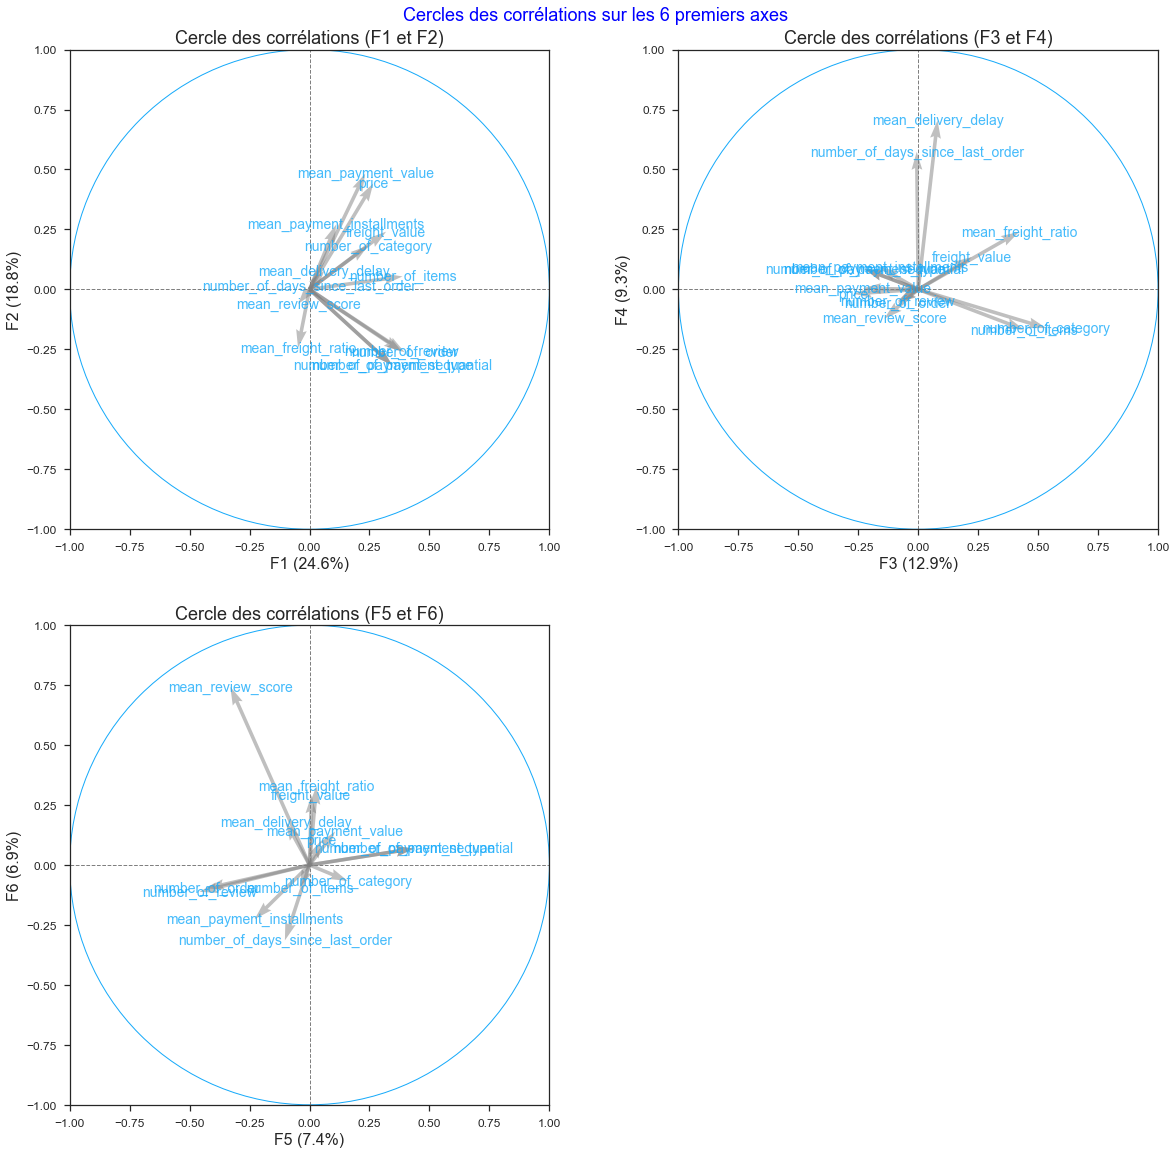

In [145]:
# Principal component space
pcs = pca.named_steps['PCA'].components_

# Plot correlation circle
cerle_corr(pcs,
           6,
           pca.named_steps['PCA'],
           [(0, 1), (2, 3), (4, 5)],
           labels=np.array(data_kmeans5.columns))

In [49]:
# KMeans Pipeline with best K for PCA results
scaler = StandardScaler()
data_projected_norm = scaler.fit_transform(X_projected[:, :8])

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


### <div class="alert alert-block alert-info"><a name="C362">3.6.2. Détermination de la valeur de k optimale</a></div>

In [50]:
# Liste des hyperparamètres à tester
initialisation = ["k-means++", "random"]
nb_init = [1, 10, 20]
random_state = [0, 42]

Avec init = k-means++ , n_init = 1 and random_state = 0


c:\Users\virgi\AppData\Local\Programs\Python\Python310\lib\site-packages\yellowbrick\utils\kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
c:\Users\virgi\AppData\Local\Programs\Python\Python310\lib\site-packages\yellowbrick\cluster\elbow.py:361: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


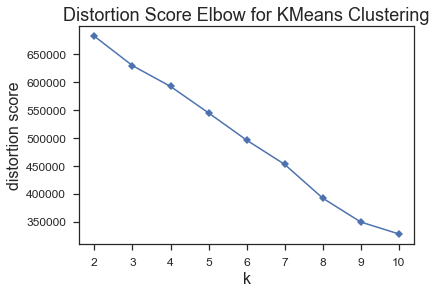

Avec init = k-means++ , n_init = 10 and random_state = 0


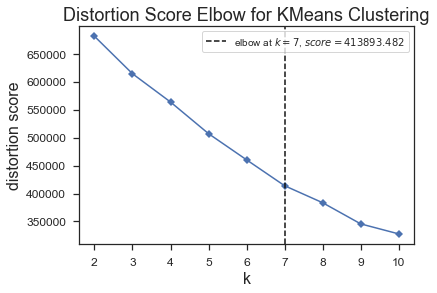

Avec init = k-means++ , n_init = 20 and random_state = 0


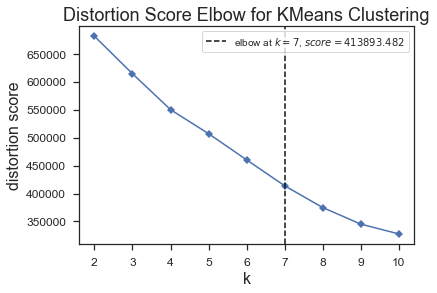

Avec init = k-means++ , n_init = 1 and random_state = 42


c:\Users\virgi\AppData\Local\Programs\Python\Python310\lib\site-packages\yellowbrick\utils\kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
c:\Users\virgi\AppData\Local\Programs\Python\Python310\lib\site-packages\yellowbrick\cluster\elbow.py:361: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


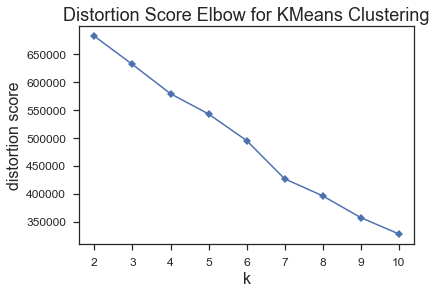

Avec init = k-means++ , n_init = 10 and random_state = 42


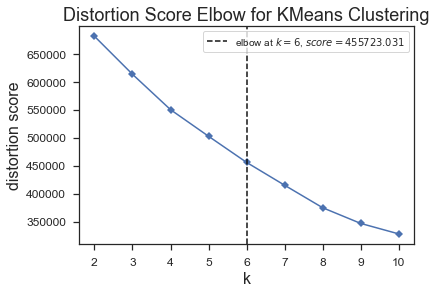

Avec init = k-means++ , n_init = 20 and random_state = 42


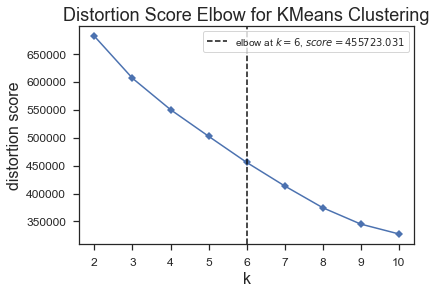

Avec init = random , n_init = 1 and random_state = 0


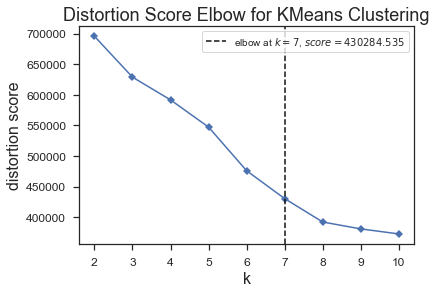

Avec init = random , n_init = 10 and random_state = 0


c:\Users\virgi\AppData\Local\Programs\Python\Python310\lib\site-packages\yellowbrick\utils\kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
c:\Users\virgi\AppData\Local\Programs\Python\Python310\lib\site-packages\yellowbrick\cluster\elbow.py:361: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


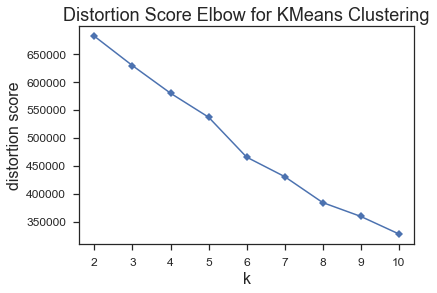

Avec init = random , n_init = 20 and random_state = 0


c:\Users\virgi\AppData\Local\Programs\Python\Python310\lib\site-packages\yellowbrick\utils\kneed.py:155: YellowbrickWarning: No 'knee' or 'elbow point' detected This could be due to bad clustering, no actual clusters being formed etc.
  warnings.warn(warning_message, YellowbrickWarning)
c:\Users\virgi\AppData\Local\Programs\Python\Python310\lib\site-packages\yellowbrick\cluster\elbow.py:361: YellowbrickWarning: No 'knee' or 'elbow' point detected, pass `locate_elbow=False` to remove the warning
  warnings.warn(warning_message, YellowbrickWarning)


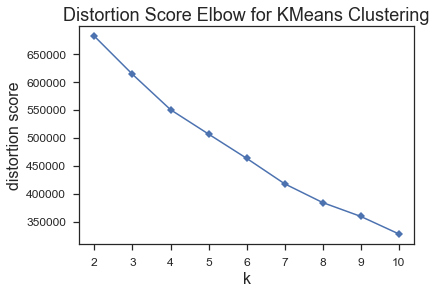

Avec init = random , n_init = 1 and random_state = 42


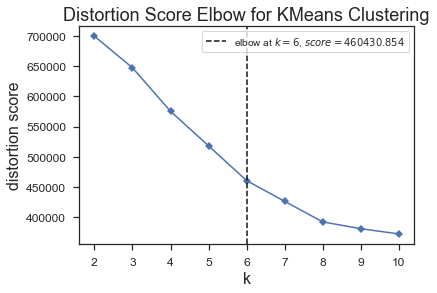

Avec init = random , n_init = 10 and random_state = 42


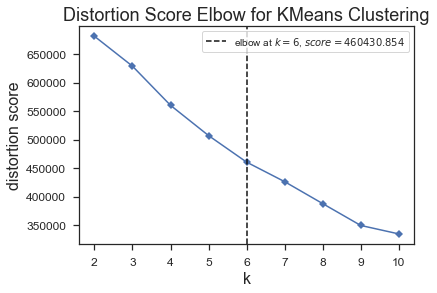

Avec init = random , n_init = 20 and random_state = 42


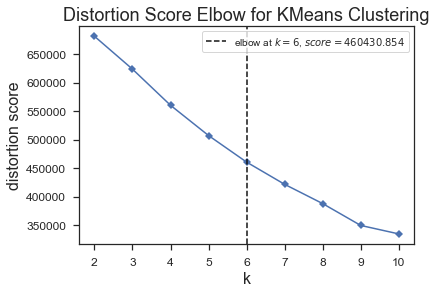

In [51]:
K_list5 = []

# Calcul du K-means
for i in initialisation:
    for r in random_state:
        for n in nb_init:
            # Définition de l'algorithme utilisé
            model = KMeans(init=i, n_init=n, random_state=r)
            print("Avec init =", i,
                  ", n_init =", n,
                  "and random_state =", r)
            
            KMeans_visualizer = KElbowVisualizer(model,
                                                 K=(2, 15),
                                                 metric="distortion",
                                                 timings=False)
            KMeans_visualizer.fit(data_projected_norm)
            KMeans_visualizer.show()
            K = KMeans_visualizer.elbow_value_
            K_list5.append(K)

In [57]:
# Pour avoir une liste de valeur k contenant que des valeurs uniques
K_list5 = [x for x in K_list5 if pd.isnull(x) == False]
K_list5 = np.unique(K_list5)
print("Nombre de cluster optimal trouvé:", K_list5)

Nombre de cluster optimal trouvé: [6 7]


<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

### <div class="alert alert-block alert-info"><a name="C363">3.6.3. Détermination de certains paramètres de scoring avec le module 'metrics' de scikit-learn</a></div>

In [58]:
# Jeu de données pour rassembler les résultats des modèles
results5 = pd.DataFrame(columns=["Init",
                                 "n_init",
                                 "Random_state",
                                 "Number of cluster",
                                 "Inertie",
                                 "Silhouette score",
                                 "Davies Bouldin score",
                                 "Cluster max sizes",
                                 "Cluster min sizes"])

In [59]:
for i in initialisation:
    for r in random_state:
        for n in nb_init:
            for k in K_list5:
                model = KMeans(n_clusters=k, init=i, n_init=n, random_state=r)
                model.fit(data_projected_norm)
                clusters = model.labels_
                labels, counts = np.unique(clusters, return_counts=True)
                inertia = model.inertia_

                silh = silhouette_score(data_projected_norm, model.labels_)
                DB = davies_bouldin_score(data_projected_norm, model.labels_)

                result_model = pd.DataFrame({"Init": [i],
                                             "n_init": [n],
                                             "Random_state": [r],
                                             "Number of cluster": [k],
                                             "Inertie": [inertia],
                                             "Silhouette score": [silh],
                                             "Davies Bouldin score": [DB],
                                             "Cluster max sizes": [counts.max()],
                                             "Cluster min sizes": [counts.min()]})
                results5 = pd.concat([results5, result_model])

In [60]:
results5.reset_index(drop=True, inplace=True)

# Filtre pour garder que les clustering 
# avec des clusters comprenant plus de 500 clients
mask = results5["Cluster min sizes"] > 500
df_mask = results5[mask]

# Quel est le score de silhouette le plus proche de 1?
df_mask.loc[df_mask["Silhouette score"] == df_mask["Silhouette score"].max()]

Init n_init Random_state Number of cluster       Inertie  \
16  random     20            0                 6  463025.15165   

    Silhouette score  Davies Bouldin score Cluster max sizes Cluster min sizes  
16          0.241923              1.323312             52670               536

Le meilleur de score de silhouette est obtenu avec 6 clusters. Pour la suite de l'étude de ce clustering, je vais utiliser:
- n-clusters = 6
- init = "random"
- n_init = 20
- Random_state = 0

In [61]:
model5 = KMeans(n_clusters=6, init="random", n_init=20, random_state=0)
k = 5

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


### <div class="alert alert-block alert-info"><a name="C364">3.6.4. Coefficient de silhouette et distances interclusters</a></div>

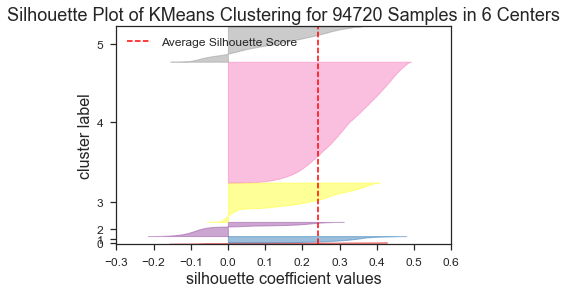

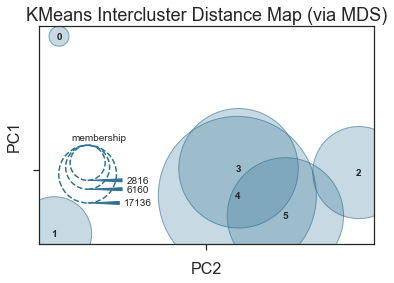

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [62]:
silhouette_visualizer = SilhouetteVisualizer(model5)
silhouette_visualizer.fit(data_projected_norm)
silhouette_visualizer.show()

intercluster_distance_visualizer = InterclusterDistance(model5)
intercluster_distance_visualizer.fit(data_projected_norm)
intercluster_distance_visualizer.show()

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


### <div class="alert alert-block alert-info"><a name="C365">3.6.5. Rerpésentations graphiques des différents clusters</a></div>

In [63]:
# Calcul de l'ACP
pca = PCA(n_components=2)
pca.fit(data_kmeans5)
print(pca.explained_variance_ratio_.cumsum())
X_trans = pca.transform(data_kmeans5)

# Calcul du T-SNE
tsne = TSNE(n_components=2, init="random", learning_rate=200)
T = tsne.fit_transform(data_kmeans5)

[0.79071687 0.98705802]


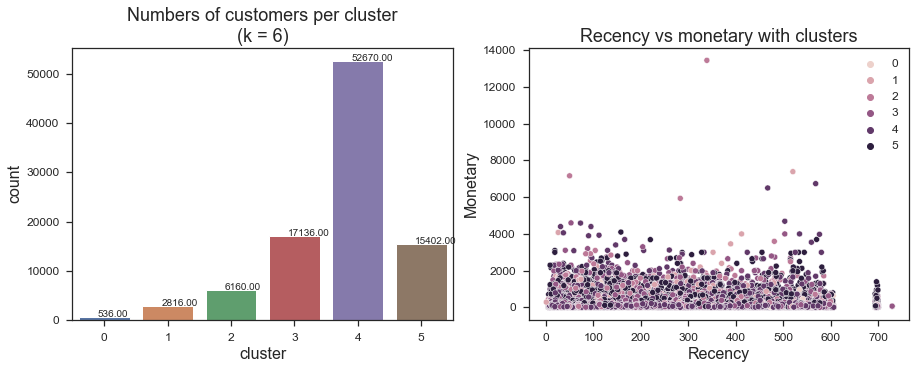

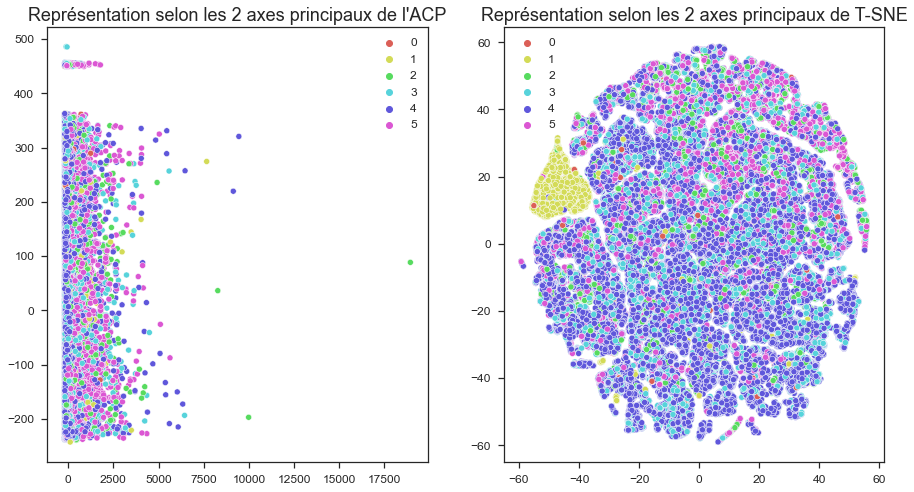

In [65]:
data_graph = data_kmeans5.copy()
k = 6

model5.fit(data_projected_norm)
kmeans_cat = model5.predict(data_projected_norm)
data_graph["cluster"] = kmeans_cat

# Représentation du nombre de clients par cluster
fig = plt.figure(figsize=(15, 5))
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.countplot(data=data_graph, x='cluster')
for p in ax1.patches:
    ax1.annotate("{:.2f}".format(p.get_height()),
                    (p.get_x() + 0.3,
                    p.get_height() + 1))
ax1.set_title("Numbers of customers per cluster""\n"
                "(k = {k})".format(k=k))

# Représentation de recency et monetary par cluster
ax2 = plt.subplot(1, 2, 2)
ax2 = sns.scatterplot(data=data_kmeans5,
                        x="number_of_days_since_last_order",
                        y="price",
                        hue=kmeans_cat)
ax2.set_title("Recency vs monetary with clusters")
ax2.set_xlabel("Recency")
ax2.set_ylabel("Monetary")
plt.show()

# Représentation selon ACP
figb = plt.figure(figsize=(15, 8))
ax1b = plt.subplot(1, 2, 1)
ax1b = sns.scatterplot(x=X_trans[:, 0],
                       y=X_trans[:, 1],
                       hue=kmeans_cat,
                       legend='full',
                       palette=sns.color_palette("hls", k))
ax1b.set_title("Représentation selon les 2 axes principaux de l'ACP")

# Représentation selon T-SNE
ax2b = plt.subplot(1, 2, 2)
ax2b = sns.scatterplot(x=T[:, 0],
                       y=T[:, 1],
                       hue=kmeans_cat,
                       legend='full',
                       palette=sns.color_palette("hls", k))
ax2b.set_title("Représentation selon les 2 axes principaux de T-SNE")
plt.show()

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

## <div class="alert alert-block alert-info"><a name="C37">3.7. Description du meilleur clustering en utilisant l'algorithme K-Means</a></div>

L'observation des différents paramètres des clusterings réalisés nous suggère que le meilleur semble être obtenu en utilisant toutes les variables, avec les valeurs monétaires à l'échelle logarithmique. Quatre clusters peuvent être différenciés.<br>
A quoi ressemble les différentes variables en fonction des clusters? Est-ce que ce clustering est stable au fil des itérations?

### <div class="alert alert-block alert-info"><a name="C371">3.7.1. Préparation du jeu de données</a></div>

**Jeu de données pour faire le clustering**

In [66]:
data_kmeansf = data[["number_of_order",
                     "number_of_days_since_last_order",
                     "price_log",
                     "mean_review_score",
                     "number_of_items",
                     "mean_delivery_delay",
                     "freight_value_log",
                     "number_of_payment_type",
                     "number_of_category",
                     "number_of_review",
                     "mean_payment_log",
                     "mean_freight_ratio",
                     "number_of_payment_sequantial",
                     "mean_payment_installments"]]


# Suppression des valeurs manquantes
data_kmeansf = data_kmeansf.dropna()
data_kmeansf.shape

(94720, 14)

In [67]:
col_norm = list(data_kmeansf.dtypes[data_kmeansf.dtypes != object].index)
preprocessor = ColumnTransformer([("scaler", StandardScaler(), col_norm)])

data_kmeansf_std = preprocessor.fit_transform(data_kmeansf)

**Jeu de données pour faire les graphiques**

In [68]:
data_graphf = data[["number_of_order",
                    "number_of_days_since_last_order",
                    "price_log",
                    "price",
                    "mean_review_score",
                    "number_of_items",
                    "mean_delivery_delay",
                    "freight_value_log",
                    "number_of_payment_type",
                    "number_of_category",
                    "number_of_review",
                    "mean_payment_log",
                    "mean_freight_ratio",
                    "number_of_payment_sequantial",
                    "mean_payment_installments"]]

data_graphf = data_graphf.dropna()
data_graphf.shape

(94720, 15)

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

### <div class="alert alert-block alert-info"><a name="C372">3.7.2. Clustering avec k = 4</a></div>

Text(0, 0.5, 'Monetary')

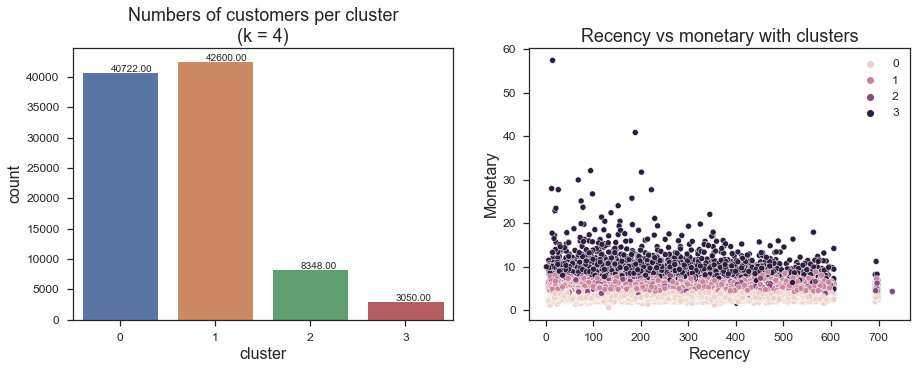

In [69]:
# k means
model = KMeans(n_clusters=4, init="k-means++", n_init=10, random_state=42)
model.fit(data_kmeansf_std)
kmeans_catf = model.predict(data_kmeansf_std)
data_graphf["cluster"] = kmeans_catf
fig = plt.figure(figsize=(15, 5))
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.countplot(data=data_graphf, x='cluster')
for p in ax1.patches:
    ax1.annotate("{:.2f}".format(p.get_height()),
                 (p.get_x() + 0.3,
                  p.get_height() + 1))
ax1.set_title("Numbers of customers per cluster""\n"
              "(k = {k})".format(k=4))

ax2 = plt.subplot(1, 2, 2)
ax2 = sns.scatterplot(data=data_kmeansf,
                      x="number_of_days_since_last_order",
                      y="price_log",
                      hue=kmeans_catf)
ax2.set_title("Recency vs monetary with clusters")
ax2.set_xlabel("Recency")
ax2.set_ylabel("Monetary")

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

### <div class="alert alert-block alert-info"><a name="C373">3.7.3. Représentations graphiques des variables en fonction des clusters</a></div>

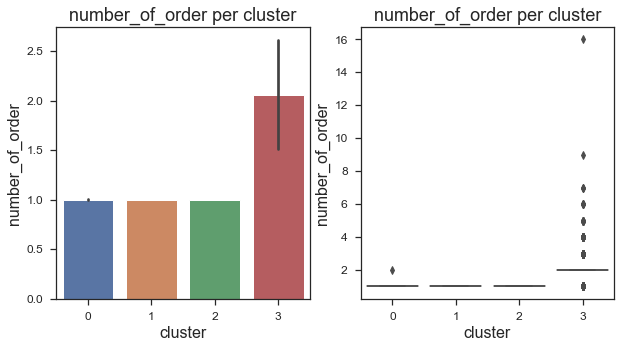

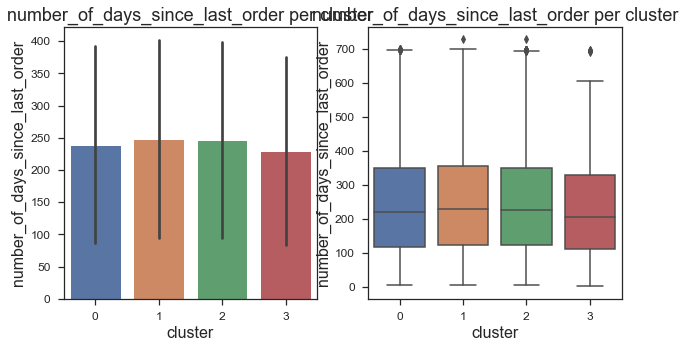

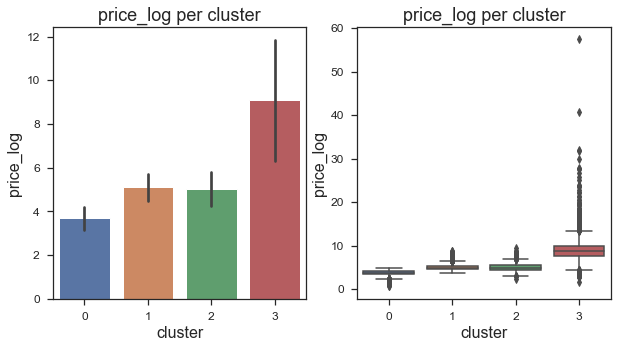

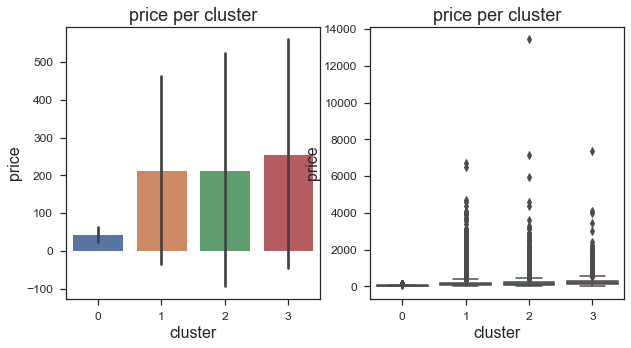

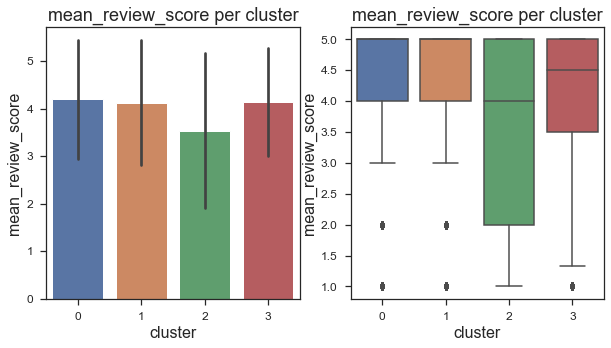

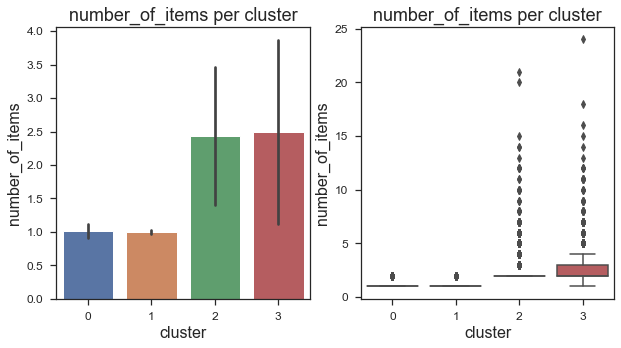

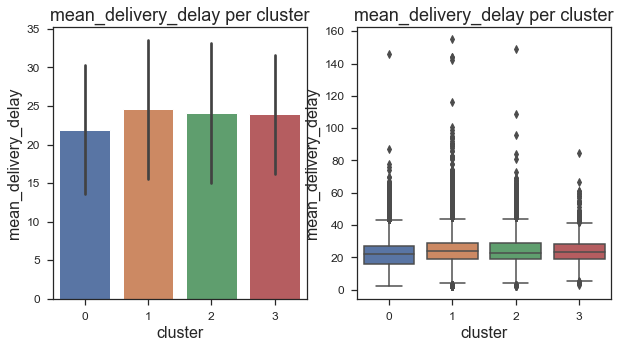

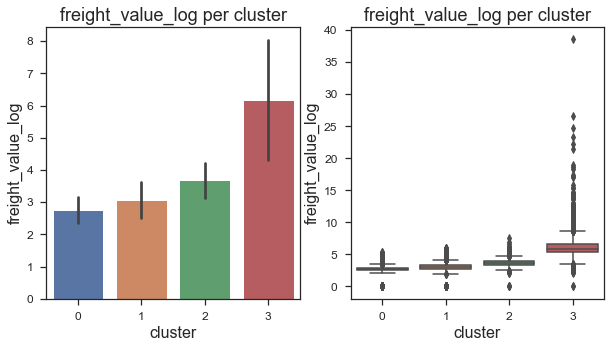

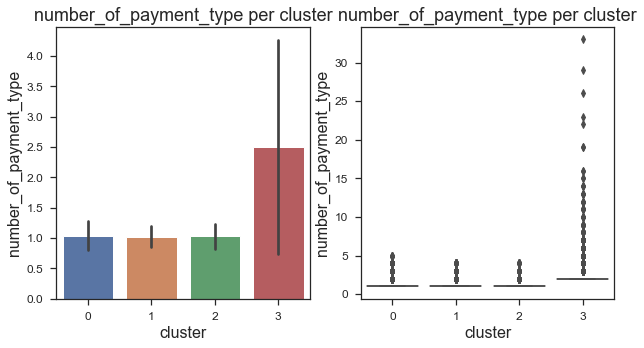

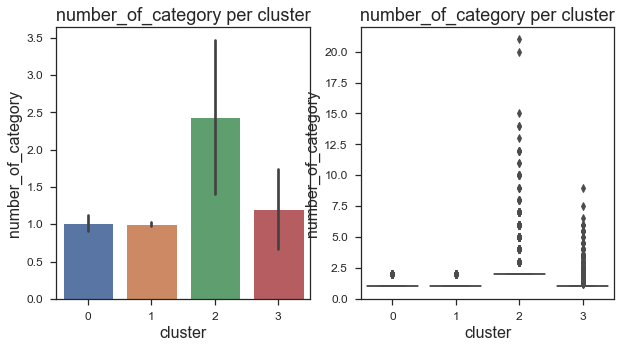

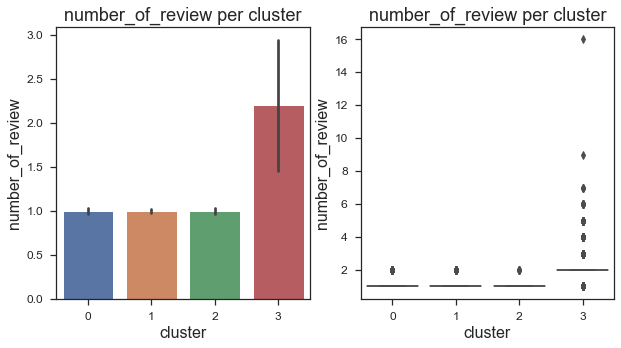

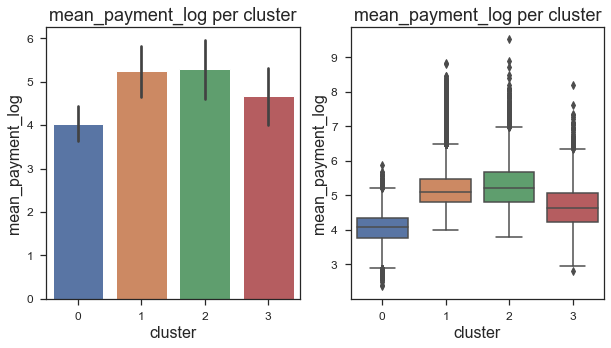

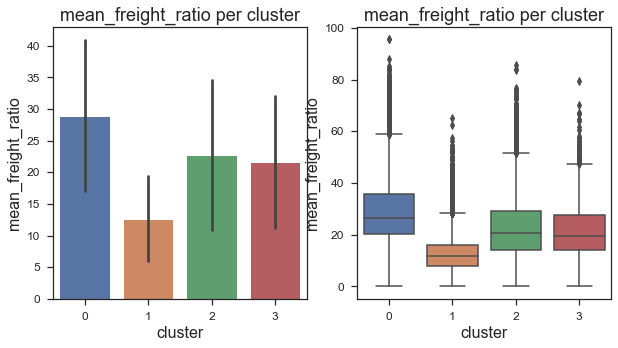

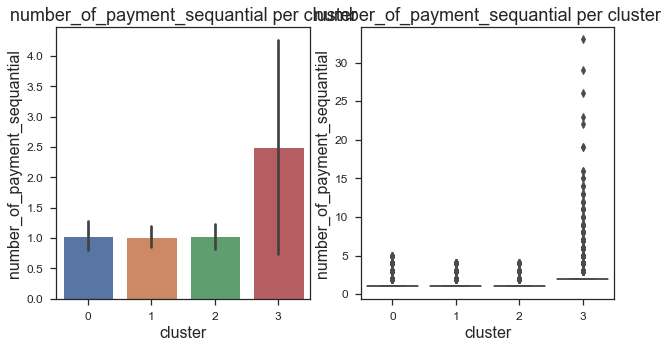

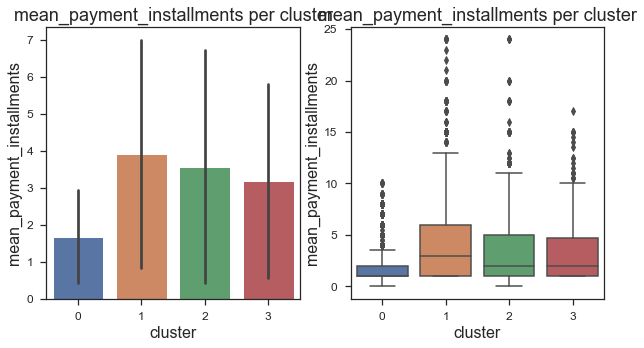

In [70]:
# figure avec groupby cluster
variables = ["number_of_order",
             "number_of_days_since_last_order",
             "price_log",
             "price",
             "mean_review_score",
             "number_of_items",
             "mean_delivery_delay",
             "freight_value_log",
             "number_of_payment_type",
             "number_of_category",
             "number_of_review",
             "mean_payment_log",
             "mean_freight_ratio",
             "number_of_payment_sequantial",
             "mean_payment_installments"]

for v in variables:
    fig = plt.figure(figsize=(10, 5))
    ax1 = plt.subplot(1, 2, 1)
    ax1 = sns.barplot(x="cluster",
                      y=v,
                      data=data_graphf,
                      ci="sd")
    ax1.set_title("{v} per cluster".format(v=v))

    ax2 = plt.subplot(1, 2, 2)
    ax2 = sns.boxplot(x="cluster",
                      y=v,
                      data=data_graphf)
    ax2.set_title("{v} per cluster".format(v=v))

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

### <div class="alert alert-block alert-info"><a name="C374">3.7.4. Stabilité de l'initialisation</a></div>

L'algorithme de Kmeans utilisé jusqu'à présent est initialisé avec la méthode K-means++ ce qui réduit les effets aléatoires de l'initialisation des centroïdes. Je vais tout de même tester la stabilité de l'initialisation en entrainement plusieurs fois le modèles et en utilisant l'indice de rand ajusté pour comparer ces différentes itérations.

In [72]:
labels = kmeans_catf
data = data_kmeansf
K = 4


def bench_k_means(kmeans, name, data, labels):
    t0 = time.time()
    estimator = make_pipeline(StandardScaler(), kmeans).fit(data)
    fit_time = time.time() - t0
    results = [name, fit_time, estimator[-1].inertia_]

    # Définition des mesures
    clustering_metrics = [homogeneity_score,
                          completeness_score,
                          v_measure_score,
                          adjusted_rand_score,
                          adjusted_mutual_info_score]
    results += [m(labels, estimator[-1].labels_)
                for m in clustering_metrics]

    # Pour voir le résulat
    formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}"
                        "\t{:.3f}\t{:.3f}\t{:.3f}"
                        "\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))


# Utilisation de la fonction
print("init"
      "\t\ttime"
      "\tinertia"
      "\thomo"
      "\tcompl"
      "\tv-means"
      "\tARI"
      "\tAMI")
print(53 * "_")

for i in range(10):
    imodel = KMeans(n_clusters=4, init="k-means++", n_init=10, random_state=42)
    bench_k_means(kmeans=imodel,
                  name="Iter " + str(i),
                  data=data,
                  labels=labels)

init		time	inertia	homo	compl	v-means	ARI	AMI
_____________________________________________________
Iter 0   	0.978s	794336	1.000	1.000	1.000	1.000	1.000
Iter 1   	0.974s	794336	1.000	1.000	1.000	1.000	1.000
Iter 2   	0.981s	794336	1.000	1.000	1.000	1.000	1.000
Iter 3   	0.841s	794336	1.000	1.000	1.000	1.000	1.000
Iter 4   	1.004s	794336	1.000	1.000	1.000	1.000	1.000
Iter 5   	1.042s	794336	1.000	1.000	1.000	1.000	1.000
Iter 6   	1.064s	794336	1.000	1.000	1.000	1.000	1.000
Iter 7   	0.968s	794336	1.000	1.000	1.000	1.000	1.000
Iter 8   	1.012s	794336	1.000	1.000	1.000	1.000	1.000
Iter 9   	0.825s	794336	1.000	1.000	1.000	1.000	1.000


Les scores sont proches de 1 ce qui suggère que l'initialisation est stable.

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>

# <div class="alert alert-block alert-info"><a name="C4">4. Segmentation des clients en utilisant le DBSCAN</a></div>

L'algorithme DBSCAN étant très demandeurs en mémoire, je vais le tester sur un échantillon du jeu de données.

## <div class="alert alert-block alert-info"><a name="C41">4.1. Echantillonage du jeu de données</a></div>

In [165]:
data_sample = data.sample(30000, random_state=1).copy()

In [166]:
data_sample.shape

(30000, 14)

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


## <div class="alert alert-block alert-info"><a name="C42">4.2. DBSCAN avec les variables RFM</a></div>

In [167]:
# Préparation du jeu de données
data_dbscan = data_sample[["number_of_order",
                           "number_of_days_since_last_order",
                           "price_log"]]

In [168]:
# Normalisation des données
col_norm = list(data_dbscan.dtypes[data_dbscan.dtypes != object].index)
preprocessor = ColumnTransformer([("scaler", StandardScaler(), col_norm)])

data_dbscan_norm = preprocessor.fit_transform(data_dbscan)

**Calcul de ACP et du TSNE pour les représentations graphiques des clusters**

In [169]:
pca = PCA(n_components=2)
pca.fit(data_dbscan_norm)
print(pca.explained_variance_ratio_.cumsum())
X_trans = pca.transform(data_dbscan_norm)

[0.56458735 0.897567  ]


In [170]:
tsne = TSNE(n_components=2, learning_rate=200, init="random")
T = tsne.fit_transform(data_dbscan_norm)

**Détermination de la valeur epsilon**

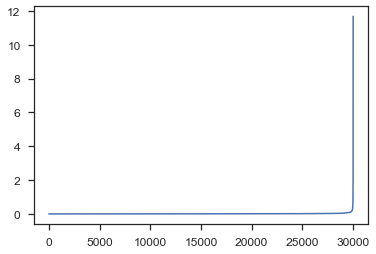

In [171]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data_dbscan_norm)
distances, indices = nbrs.kneighbors(data_dbscan_norm)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)

Pour l'algorithme DBSCAN, je souhaite choisir un epsilon de tel sorte que 90% des observations aient une distance au proche voisin inférieure à epsilon.

**Mise en place du modèle DBSCAN**

In [172]:
data_graph = data_dbscan.copy()

Valeur eps testée = 0.5
Number of cluster  4
Score moyen de Silhouette: 0.46189127475373154


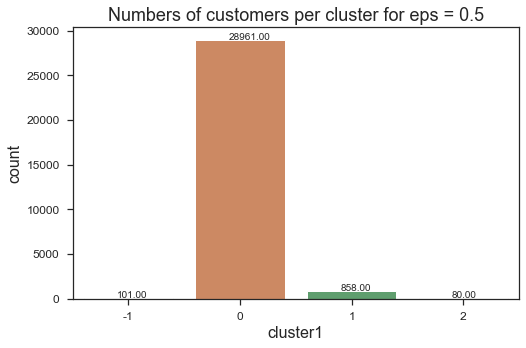

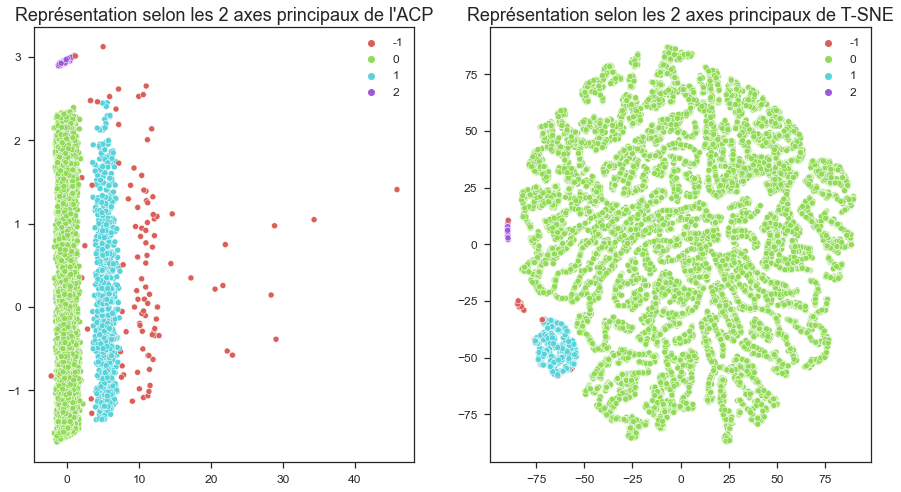

In [173]:
eps = 0.5

print("Valeur eps testée = {eps}".format(eps=eps))
dbscan1 = DBSCAN(eps=eps, min_samples=10, algorithm="ball_tree")
dbscan1.fit(data_dbscan_norm)
labels1 = dbscan1.labels_
print("Number of cluster ", len(np.unique(labels1)))

silhouette_avg1 = silhouette_score(data_dbscan_norm, labels1)
print("Score moyen de Silhouette:",
      silhouette_avg1)

# Représentation graphique du nombre de clients par cluster
data_graph["cluster1"] = labels1
fig = plt.figure(figsize=(8, 5))
plt.title("Numbers of customers per cluster for eps = {eps}".format(eps=eps))
ax = plt.subplot(1, 1, 1)
ax = sns.countplot(data=data_graph, x='cluster1')
for p in ax.patches:
    ax.annotate("{:.2f}".format(p.get_height()),
                (p.get_x() + 0.3,
                p.get_height() + 1))

# Représentation des clusters selon les deux principaux axes
# de l'ACP et du TSNE
fig = plt.figure(figsize=(15, 8))
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.scatterplot(x=X_trans[:, 0],
                      y=X_trans[:, 1],
                      hue=labels1,
                      legend='full',
                      palette=sns.color_palette("hls",
                                                len(np.unique(labels1))))
ax1.set_title("Représentation selon les 2 axes principaux de l'ACP")

ax2 = plt.subplot(1, 2, 2)
ax2 = sns.scatterplot(x=T[:, 0],
                      y=T[:, 1],
                      hue=labels1,
                      legend='full',
                      palette=sns.color_palette("hls",
                                                len(np.unique(labels1))))
ax2.set_title("Représentation selon les 2 axes principaux de T-SNE")

plt.show()

Valeur eps testée = 0.75
Number of cluster  4
Score moyen de Silhouette: 0.7391065854488041


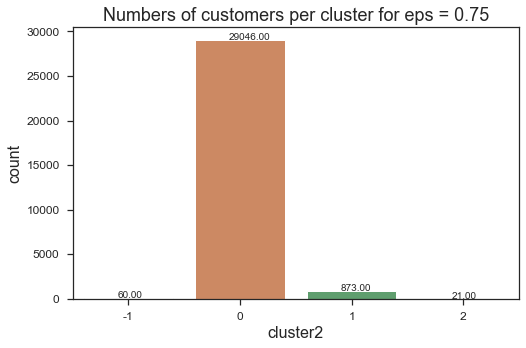

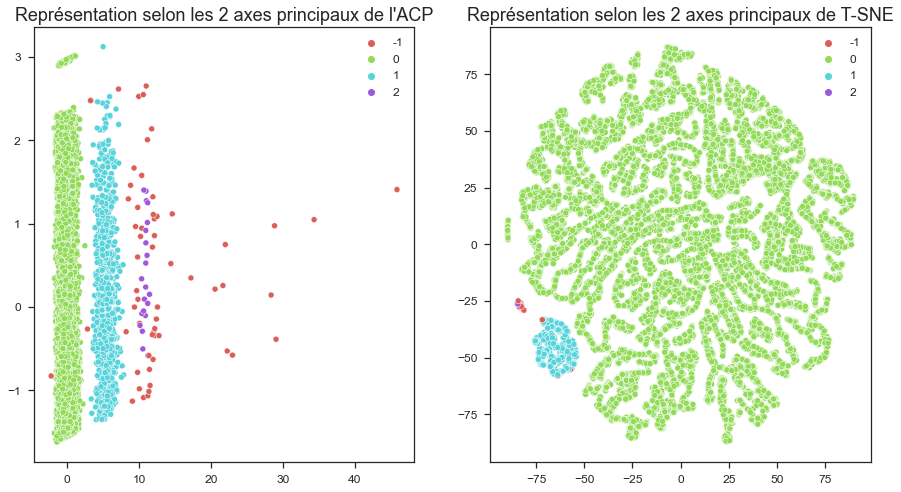

In [174]:
eps = 0.75

print("Valeur eps testée = {eps}".format(eps=eps))
dbscan2 = DBSCAN(eps=eps, min_samples=10, algorithm="ball_tree")
dbscan2.fit(data_dbscan_norm)
labels2 = dbscan2.labels_
print("Number of cluster ", len(np.unique(labels2)))

silhouette_avg2 = silhouette_score(data_dbscan_norm, labels2)
print("Score moyen de Silhouette:",
      silhouette_avg2)

# Représentation graphique du nombre de clients par cluster
data_graph["cluster2"] = labels2
fig = plt.figure(figsize=(8, 5))
plt.title("Numbers of customers per cluster for eps = {eps}".format(eps=eps))
ax = plt.subplot(1, 1, 1)
ax = sns.countplot(data=data_graph, x='cluster2')
for p in ax.patches:
    ax.annotate("{:.2f}".format(p.get_height()),
                (p.get_x() + 0.3,
                p.get_height() + 1))

# Représentation des clusters selon les deux principaux axes
# de l'ACP et du TSNE
fig = plt.figure(figsize=(15, 8))
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.scatterplot(x=X_trans[:, 0],
                      y=X_trans[:, 1],
                      hue=labels2,
                      legend='full',
                      palette=sns.color_palette("hls",
                                                len(np.unique(labels2))))
ax1.set_title("Représentation selon les 2 axes principaux de l'ACP")

ax2 = plt.subplot(1, 2, 2)
ax2 = sns.scatterplot(x=T[:, 0],
                      y=T[:, 1],
                      hue=labels2,
                      legend='full',
                      palette=sns.color_palette("hls",
                                                len(np.unique(labels2))))
ax2.set_title("Représentation selon les 2 axes principaux de T-SNE")

plt.show()

Valeur eps testée = 1
Number of cluster  4
Score moyen de Silhouette: 0.7405200174060002


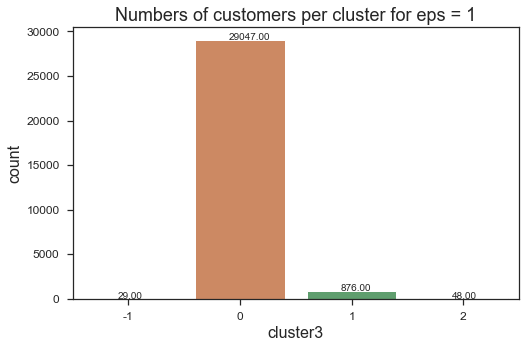

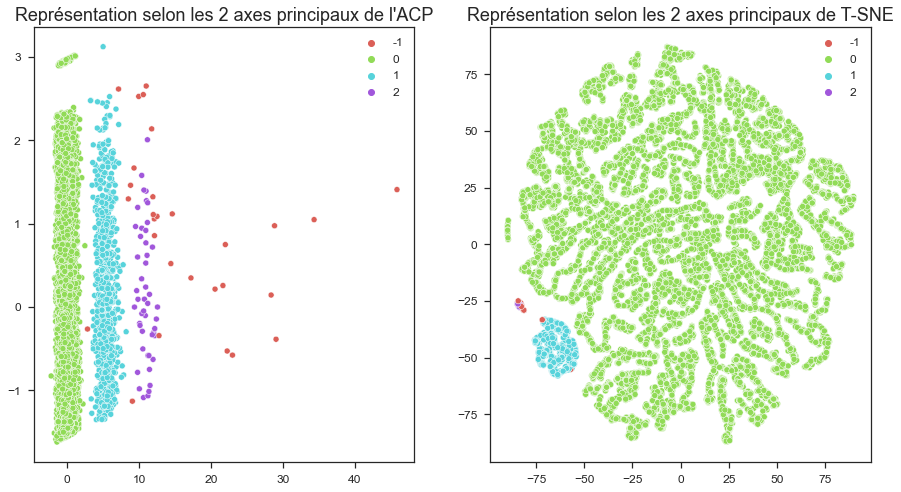

In [175]:
eps = 1

print("Valeur eps testée = {eps}".format(eps=eps))
dbscan3 = DBSCAN(eps=eps, min_samples=10, algorithm="ball_tree")
dbscan3.fit(data_dbscan_norm)
labels3 = dbscan3.labels_
print("Number of cluster ", len(np.unique(labels3)))

silhouette_avg3 = silhouette_score(data_dbscan_norm, labels3)
print("Score moyen de Silhouette:",
      silhouette_avg3)

# Représentation graphique du nombre de clients par cluster
data_graph["cluster3"] = labels3
fig = plt.figure(figsize=(8, 5))
plt.title("Numbers of customers per cluster for eps = {eps}".format(eps=eps))
ax = plt.subplot(1, 1, 1)
ax = sns.countplot(data=data_graph, x='cluster3')
for p in ax.patches:
    ax.annotate("{:.2f}".format(p.get_height()),
                (p.get_x() + 0.3,
                p.get_height() + 1))

# Représentation des clusters selon les deux principaux axes
# de l'ACP et du TSNE
fig = plt.figure(figsize=(15, 8))
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.scatterplot(x=X_trans[:, 0],
                      y=X_trans[:, 1],
                      hue=labels3,
                      legend='full',
                      palette=sns.color_palette("hls",
                                                len(np.unique(labels3))))
ax1.set_title("Représentation selon les 2 axes principaux de l'ACP")

ax2 = plt.subplot(1, 2, 2)
ax2 = sns.scatterplot(x=T[:, 0],
                      y=T[:, 1],
                      hue=labels3,
                      legend='full',
                      palette=sns.color_palette("hls",
                                                len(np.unique(labels3))))
ax2.set_title("Représentation selon les 2 axes principaux de T-SNE")

plt.show()

<code style="background:lightyellow;color:black">retour au <a href="#C0">Sommaire</a></code>


## <div class="alert alert-block alert-info"><a name="C43">4.3. DBSCAN avec toutes les variables</a></div>

In [176]:
data_dbscan2 = data_sample[["number_of_order",
                            "number_of_days_since_last_order",
                            "price_log",
                            "mean_review_score",
                            "number_of_items",
                            "mean_delivery_delay",
                            "freight_value_log",
                            "number_of_payment_type",
                            "number_of_category",
                            "number_of_review",
                            "mean_payment_log",
                            "mean_freight_ratio",
                            "number_of_payment_sequantial",
                            "mean_payment_installments"]]

data_dbscan2 = data_dbscan2.dropna()
data_dbscan2.shape

(30000, 14)

In [177]:
col_norm = list(data_dbscan2.dtypes[data_dbscan2.dtypes != object].index)
preprocessor = ColumnTransformer([("scaler", StandardScaler(), col_norm)])

data_dbscan2_norm = preprocessor.fit_transform(data_dbscan2)

**Calcul de ACP et du TSNE pour les représentations graphiques des clusters**

In [178]:
pca = PCA(n_components=2)
pca.fit(data_dbscan2_norm)
print(pca.explained_variance_ratio_.cumsum())
X_trans = pca.transform(data_dbscan2_norm)

[0.31647994 0.4811046 ]


In [179]:
tsne = TSNE(n_components=2, learning_rate=200, init="random")
T = tsne.fit_transform(data_dbscan2_norm)

**Détermination de la valeur epsilon**

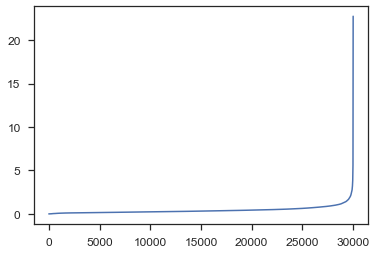

In [180]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(data_dbscan2_norm)
distances, indices = nbrs.kneighbors(data_dbscan2_norm)
distances = np.sort(distances, axis=0)
distances = distances[:, 1]
plt.plot(distances)

Pour l'algorithme DBSCAN, je souhaite choisir un epsilon de tel sorte que 90% des observations aient une distance au proche voisin inférieure à epsilon c'est-à-dire entre 3 et 5.

**Mise en place du modèle DBSCAN**

In [181]:
data_graph2 = data_dbscan2.copy()

Valeur eps testée = 3
Number of cluster  12
Score moyen de Silhouette: 0.2471811440550747


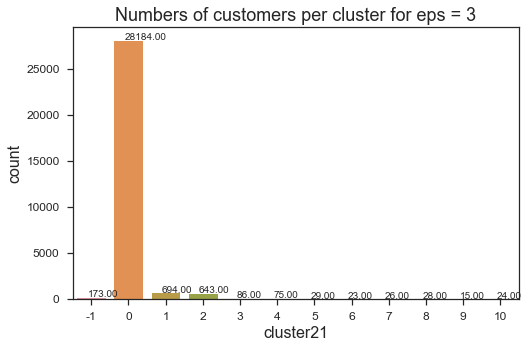

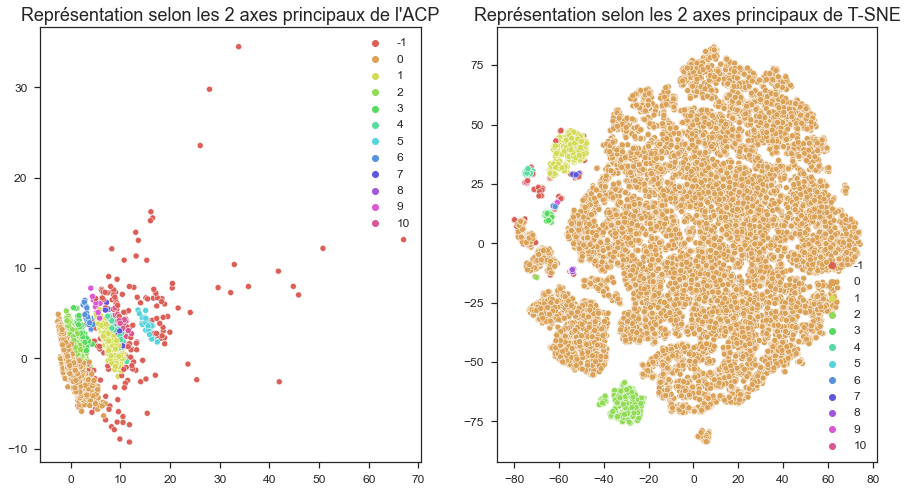

In [182]:
eps = 3

print("Valeur eps testée = {eps}".format(eps=eps))
dbscan21 = DBSCAN(eps=eps, min_samples=10, algorithm="ball_tree")
dbscan21.fit(data_dbscan2_norm)
labels21 = dbscan21.labels_
print("Number of cluster ", len(np.unique(labels21)))

silhouette_avg21 = silhouette_score(data_dbscan2_norm, labels21)
print("Score moyen de Silhouette:",
      silhouette_avg21)

# Représentation graphique du nombre de clients par cluster
data_graph2["cluster21"] = labels21
fig = plt.figure(figsize=(8, 5))
plt.title("Numbers of customers per cluster for eps = {eps}".format(eps=eps))
ax = plt.subplot(1, 1, 1)
ax = sns.countplot(data=data_graph2, x='cluster21')
for p in ax.patches:
    ax.annotate("{:.2f}".format(p.get_height()),
                (p.get_x() + 0.3,
                p.get_height() + 1))

# Représentation des clusters selon les deux principaux axes
# de l'ACP et du TSNE
fig = plt.figure(figsize=(15, 8))
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.scatterplot(x=X_trans[:, 0],
                      y=X_trans[:, 1],
                      hue=labels21,
                      legend='full',
                      palette=sns.color_palette("hls",
                                                len(np.unique(labels21))))
ax1.set_title("Représentation selon les 2 axes principaux de l'ACP")

ax2 = plt.subplot(1, 2, 2)
ax2 = sns.scatterplot(x=T[:, 0],
                      y=T[:, 1],
                      hue=labels21,
                      legend='full',
                      palette=sns.color_palette("hls",
                                                len(np.unique(labels21))))
ax2.set_title("Représentation selon les 2 axes principaux de T-SNE")

plt.show()

Valeur eps testée = 4
Number of cluster  4
Score moyen de Silhouette: 0.6032593189285458


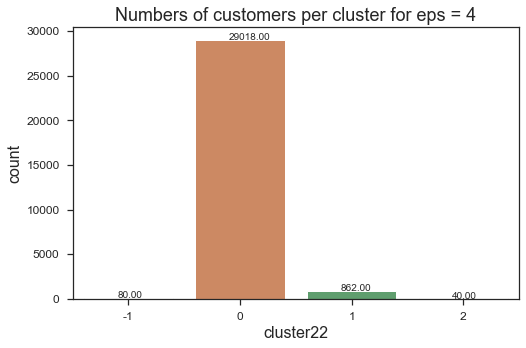

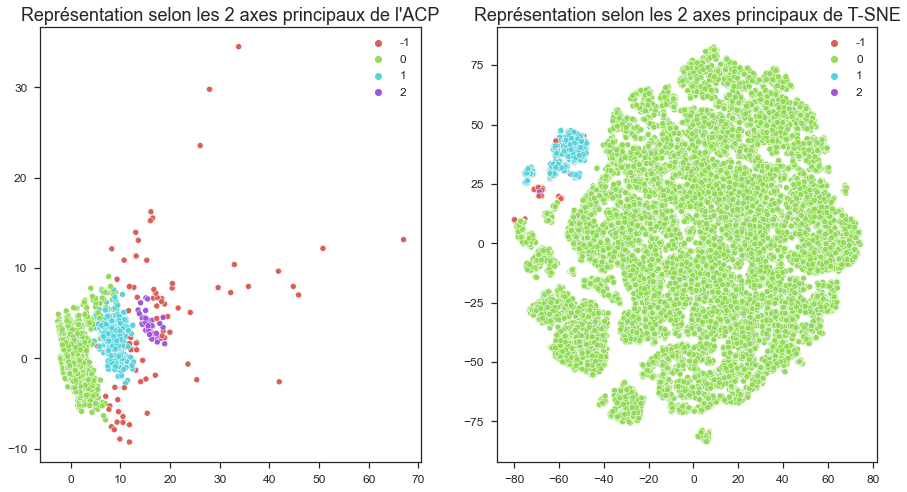

In [183]:
eps = 4

print("Valeur eps testée = {eps}".format(eps=eps))
dbscan22 = DBSCAN(eps=eps, min_samples=10, algorithm="ball_tree")
dbscan22.fit(data_dbscan2_norm)
labels22 = dbscan22.labels_
print("Number of cluster ", len(np.unique(labels22)))

silhouette_avg22 = silhouette_score(data_dbscan2_norm, labels22)
print("Score moyen de Silhouette:",
      silhouette_avg22)

# Représentation graphique du nombre de clients par cluster
data_graph2["cluster22"] = labels22
fig = plt.figure(figsize=(8, 5))
plt.title("Numbers of customers per cluster for eps = {eps}".format(eps=eps))
ax = plt.subplot(1, 1, 1)
ax = sns.countplot(data=data_graph2, x='cluster22')
for p in ax.patches:
    ax.annotate("{:.2f}".format(p.get_height()),
                (p.get_x() + 0.3,
                p.get_height() + 1))

# Représentation des clusters selon les deux principaux axes
# de l'ACP et du TSNE
fig = plt.figure(figsize=(15, 8))
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.scatterplot(x=X_trans[:, 0],
                      y=X_trans[:, 1],
                      hue=labels22,
                      legend='full',
                      palette=sns.color_palette("hls",
                                                len(np.unique(labels22))))
ax1.set_title("Représentation selon les 2 axes principaux de l'ACP")

ax2 = plt.subplot(1, 2, 2)
ax2 = sns.scatterplot(x=T[:, 0],
                      y=T[:, 1],
                      hue=labels22,
                      legend='full',
                      palette=sns.color_palette("hls",
                                                len(np.unique(labels22))))
ax2.set_title("Représentation selon les 2 axes principaux de T-SNE")

plt.show()

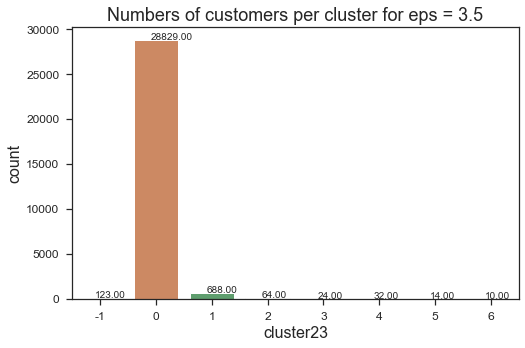

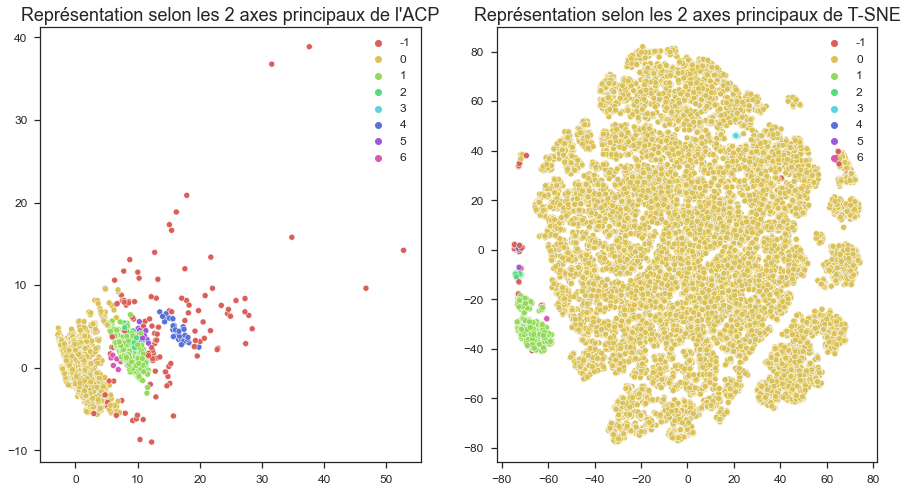

In [95]:
eps = 3.5

print("Valeur eps testée = {eps}".format(eps=eps))
dbscan23 = DBSCAN(eps=eps, min_samples=10, algorithm="ball_tree")
dbscan23.fit(data_dbscan2_norm)
labels23 = dbscan23.labels_
print("Number of cluster ", len(np.unique(labels23)))

silhouette_avg23 = silhouette_score(data_dbscan2_norm, labels23)
print("Score moyen de Silhouette:",
      silhouette_avg23)

# Représentation graphique du nombre de clients par cluster
data_graph2["cluster23"] = labels23
fig = plt.figure(figsize=(8, 5))
plt.title("Numbers of customers per cluster for eps = {eps}".format(eps=eps))
ax = plt.subplot(1, 1, 1)
ax = sns.countplot(data=data_graph2, x='cluster23')
for p in ax.patches:
    ax.annotate("{:.2f}".format(p.get_height()),
                (p.get_x() + 0.3,
                p.get_height() + 1))

# Représentation des clusters selon les deux principaux axes
# de l'ACP et du TSNE
fig = plt.figure(figsize=(15, 8))
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.scatterplot(x=X_trans[:, 0],
                      y=X_trans[:, 1],
                      hue=labels23,
                      legend='full',
                      palette=sns.color_palette("hls",
                                                len(np.unique(labels23))))
ax1.set_title("Représentation selon les 2 axes principaux de l'ACP")

ax2 = plt.subplot(1, 2, 2)
ax2 = sns.scatterplot(x=T[:, 0],
                      y=T[:, 1],
                      hue=labels23,
                      legend='full',
                      palette=sns.color_palette("hls",
                                                len(np.unique(labels23))))
ax2.set_title("Représentation selon les 2 axes principaux de T-SNE")

plt.show()

La majorité des clients se situe dans un seul cluster pour toutes les versions de DBSACN testées. Avec cette algorithme, les clients ne sont pas vraiment ségmentés. Pour la suite du projet, nous utiliserons donc l'algorithme K-Means.